# A1: Three-Layer Neural Network

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-2">Example Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3">Discussion</a></span></li></ul></div>

## Requirements

In this assignment, you will start with code from lecture notes 04 and add code to do the following. You will implement and apply a neural network as in lecture notes 04 but now with an additional hidden layer.  The resulting three-layer network will consist of three weight matrices, `U`, `V` and `W`.

First, implement the forward pass to calculate outputs of each layer:

* Define functions `add_ones` and `rmse` by copying it from the lecture notes.
* Define function `forward_layer1` with two arguments, the input `X` and the first layer's weights `U`. It calculates and returns the output, `Zu`, of the first layer, using the `tanh` activation function.
* Define function `forward_layer2` with two arguments, the input `Zu` and the second layer's weights `V`. It calculates and returns the output, `Zv`, of the second layer, using the `tanh` activation function.
* Define function `forward_layer3` with two arguments, the input `Zv` and the third layer's weights `W`. It calculates and returns the output, `Y`, of the third layer as just the weighted sum of the inputs, without an activation function.
* Define function `forward` with four arguments, the input `X` to the network and the weight matrices, `U`, `V` and `W` of the three layers. It calls the above three functions and returns the outputs of all layers, `Zu`, `Zv`, `Y`.

Now implement the backward pass that calculates `delta` values for each layer:

* Define function `backward_layer3` that accepts as arguments the target values `T` and the predicted values `Y` calculated by function `forward`. It calculates and returns `delta_layer3` for layer 3, which is just `T - Y`.
* Define function `backward_layer2` that accepts as arguments `delta_layer3`, `W` and `Zv` and calculates and returns `delta` for layer 2 by back-propagating `delta_layer3` through `W`.
* Define function `backward_layer1` that accepts as arguments `delta_layer2`, `V` and `ZU` and calculates and returns `delta` for layer 1 by back-propagating `delta_layer2` through `V`.
* Define function `gradients` that accepts as arguments `X`, `T`, `Zu`, `Zv`, `Y`, `U`, `V`, and `W`, and calls the above three functions and uses the results to calculate the gradient of the mean squared error between `T` and `Y` with respect to `U`, `V` and `W` and returns those three gradients.

Now you can use `forward` and `gradients` to define the function `train` to train a three-layer neural network.
          
* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the `X` and `T` standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in each of the two hidden layers, the number of epochs and the learning rate. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -0.1 and 0.1, and updates `U`, `V` and `W` by the learning rate times their gradients for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradients` and `add_ones`.  It must also collect in a list called `rmses` the root-mean-square errors for each epoch between `T` and `Y`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return rmses, U, V, W, X_means, X_stds, T_means, T_stds

Then we need a function `use` that calculates an output `Y` for new samples.  

* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

## Example Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
import time

* Define functions `add_ones` and `rmse` by copying it from the lecture notes.

In [2]:
def add_ones(A):
    return np.insert(A, 0, 1, axis=1)

In [3]:
def rmse(T, Y, Tstds):
    error = (T - Y) * Tstds 
    return np.sqrt(np.mean(error ** 2))

* Define function `forward_layer1` with two arguments, the input `X` and the first layer's weights `U`. It calculates and returns the output, `Zu`, of the first layer, using the `tanh` activation function.

In [4]:
def forward_layer1(Xtrain_st, U):
    Xtrain_st1 = add_ones(Xtrain_st)
    Zu = np.tanh(Xtrain_st1 @ U)
    return Zu

* Define function `forward_layer2` with two arguments, the input `Zu` and the second layer's weights `V`. It calculates and returns the output, `Zv`, of the second layer, using the `tanh` activation function.

In [5]:
def forward_layer2(Xtrain_st, V):
    Xtrain_st1 = add_ones(Xtrain_st)
    Zv = np.tanh(Xtrain_st1 @ V)
    return Zv

* Define function `forward_layer3` with two arguments, the input `Zv` and the third layer's weights `W`. It calculates and returns the output, `Y`, of the third layer as just the weighted sum of the inputs, without an activation function.

In [6]:
def forward_layer3(Xtrain_st, W):
    Xtrain_st1 = add_ones(Xtrain_st)
    Y = Xtrain_st1 @ W
    return Y

* Define function `forward` with four arguments, the input `X` to the network and the weight matrices, `U`, `V` and `W` of the three layers. It calls the above three functions and returns the outputs of all layers, `Zu`, `Zv`, `Y`.

In [7]:
def forward(Xtrain_st, U, V, W):
    Zu = forward_layer1(Xtrain_st, U)
    Zv = forward_layer2(Zu, V)
    Y = forward_layer3(Zv, W)
    return Zu, Zv, Y

* Define function `backward_layer3` that accepts as arguments the target values `T` and the predicted values `Y` calculated by function `forward`. It calculates and returns `delta_layer3` for layer 3, which is just `T - Y`.

In [8]:
def backward_layer3(TtrainS, Y):
    D = TtrainS - Y
    return D

* Define function `backward_layer2` that accepts as arguments `delta_layer3`, `W` and `Zv` and calculates and returns `delta` for layer 2 by back-propagating `delta_layer3` through `W`.

In [9]:
def backward_layer2(D, W, Zv):
    Dw = D @ W[1:, :].T * (1 - Zv**2)
    print(W[1:,:])
    print(W[:,:])
    return Dw

* Define function `backward_layer1` that accepts as arguments `delta_layer2`, `V` and `ZU` and calculates and returns `delta` for layer 1 by back-propagating `delta_layer2` through `V`.

In [10]:
def backward_layer1(Dw, V, Zu):
    Dv = Dw @ V[1:, :].T * (1 - Zu**2)
    return Dv

* Define function `gradients` that accepts as arguments `X`, `T`, `Zu`, `Zv`, `Y`, `U`, `V`, and `W`, and calls the above three functions and uses the results to calculate the gradient of the mean squared error between `T` and `Y` with respect to `U`, `V` and `W` and returns those three gradients.

In [11]:
def gradients(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W):
    D = backward_layer3(Ttrain_st, Y)
    Dw = backward_layer2(D, W, Zv)
    Dv = backward_layer1(Dw, V, Zu)
    grad_U = - add_ones(Xtrain_st).T @ Dv
    grad_V = - add_ones(Zu).T @ Dw
    grad_W = - add_ones(Zv).T @ D
    return grad_U, grad_V, grad_W

* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the `X` and `T` standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in each of the two hidden layers, the number of epochs and the learning rate. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -0.1 and 0.1, and updates `U`, `V` and `W` by the learning rate times their gradients for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradients` and `add_ones`.  It must also collect in a list called `rmses` the root-mean-square errors for each epoch between `T` and `Y`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return rmses, U, V, W, X_means, X_stds, T_means, T_stds

Then we need a function `use` that calculates an output `Y` for new samples. 

In [12]:
def train(X, T, n_units_U, n_units_V, n_epochs, rho):
    
    
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)

    XtrainS = (X - Xmeans) / Xstds
    TtrainS = (T - Tmeans) / Tstds
    
    
    n_samples, n_outputs = T.shape
    rho= rho / (n_samples * n_outputs)

    # Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
  #  U = np.random.uniform(-0.1, 0.1, size=(1 + X.shape[1], n_units_U))# / np.sqrt(X.shape[1] + 1)
  #  V = np.random.uniform(-0.1, 0.1, size=(1 + n_units_U, n_units_V))# / np.sqrt(n_units_U + 1)
  #  W = np.random.uniform(0, 0, size=(1 + n_units_V, n_outputs)) / np.sqrt(n_units_V + 1)
    U = np.array([[-0.31 , -0.106,  0.098], [-0.298, -0.094,  0.11 ]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
    V = np.array([[-0.21      , -0.00714286],[-0.20428571, -0.00142857],[-0.19857143,  0.00428571],[-0.19285714,  0.01]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
    W = np.array([[0], [0], [0]])
    # collect training and testing errors for plotting
    rmses = []
    
    for epoch in range(n_epochs):
        
        Zu, Zv, Y = forward(XtrainS, U, V, W)
        grad_U, grad_V, grad_W = gradients(XtrainS, TtrainS, Zu, Zv, Y, U, V, W)
        
        # Take step down the gradient
        U = U - rho * grad_U
        W = W - rho * grad_W
        V = V - rho * grad_V
        rmses.append([rmse(TtrainS, Y, Tstds)])
      #  rmses.append([rmse(TtrainS, Y, Tstds)])
        
        
    return rmses, U, V, W, Xmeans, Xstds, Tmeans, Tstds
        


* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

In [13]:
def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
    Xst = (X - X_means)/X_stds
    Zu, Zv, Yst = forward(Xst, U, V, W)
    Y = Yst * T_stds + T_means
    return Y

In [14]:
# insert your NeuralNetwork class definition here.
class NeuralNetwork:
    
    def __init__(self, n_inputs, n_hiddens_each_layer, n_outputs):
        
        self.n_inputs = n_inputs
        self.n_hiddens_each_layer = n_hiddens_each_layer
        self.n_outputs = n_outputs
        
        self.X_means = None
        self.X_stds = None
        self.T_means = None
        self.T_stds = None
        
        self.Ys = []
        self.Grads = []
        self.n_epochs = None
        self.rmse = None
        self.rmse_trace = []
        self.Ws = []
        self.Zs = []    

        shapes=[[0] * 2 for i in range(len(n_hiddens_each_layer) + 1)]
        shapes[0][0] = n_inputs + 1
        i = n_inputs
        
        for j, i in enumerate(n_hiddens_each_layer):
            shapes[j][1] = i
            if j + 1 < len(n_hiddens_each_layer):
                shapes[j + 1][0] = i + 1
        if len(n_hiddens_each_layer) > 0:
            shapes[j + 1][0] = i + 1
            shapes[j + 1][1] = n_outputs
        else:
            shapes[0][1] = n_outputs

        self.all_weights, self.Ws = self.make_weights_and_views(shapes)
        self.Ws[-1][:,:]=0
        self.all_gradients, self.Grads = self.make_weights_and_views(shapes)

    def make_weights_and_views(self, shapes):
        shape = np.array(shapes)
        shape_sum = np.sum(shape[:, 0] * shape[:, 1])
        weights = np.random.uniform(-0.1, 0.1, shape_sum) 
        Ws = []
        temp = 0
        for i in shape:
            init = temp + i[0] * i[1]
            Ws.append(weights[temp:init].reshape(i[0], i[1]))
            temp = init
        return weights, Ws
       # self.Grads = []
       # self.all_gradients = []
       # self.all_gradients = all_weight

    def __repr__(self):
        return 'NeuralNetwork({}, {}, {})'.format(self.n_inputs, self.n_hiddens_each_layer, self.n_outputs)
    
    def __str__(self):
        return self.__repr__() + ', trained for {} epochs with a final RMSE of {}'.format(self.n_epochs, self.rmse)
    
    def train(self, X, T, n_epochs,learning_rate):
        
        self.X_means = X.mean(axis=0)
        self.X_stds = X.std(axis=0)
        self.T_means = T.mean(axis=0)
        self.T_stds = T.std(axis=0)
        
        Xtrain = (X - self.X_means) / self.X_stds
        Ttrain = (T - self.T_means) / self.T_stds
        self.n_epochs = n_epochs
        
        n_samples, n_outputs = T.shape
        rho= learning_rate / (n_samples * n_outputs)
        
        for epoch in range(n_epochs):
        
           # Take step down the gradient
            print("number of epoch: ", epoch)
            
            Y_data = self._forward(Xtrain)
            all_grads = self._gradients(Xtrain,Ttrain)
            for index in range(len(self.n_hiddens_each_layer)+1):
                self.Ws[index] = self.Ws[index] - learning_rate * self.Grads[index]
                print(index)
                print(self.Ws[index])
          #  print(all_grads)
            self.rmse_trace.append([self.calc_rmse(Xtrain,Ttrain)])

        return self
    
    def _forward(self,X):
        Z = X
        self.Zs = [X]
        for n,i in enumerate(self.Ws):
            if n!=len(self.Ws)-1:     
                Z = np.tanh(self._add_ones(Z)@i[:,:])
            else:
                Z = self._add_ones(Z)@i[:,:]
        
            self.Zs.append(Z)
        return self.Zs
    
    def _add_ones(self, A):
        return np.insert(A, 0, 1, axis=1)
    
    def _gradients(self, X, T):
        n_samples = X.shape[0]
        n_outputs = T.shape[1]
        n_layers = len(self.n_hiddens_each_layer) + 1
        D = (T - self.Zs[-1])
        for layeri in range(n_layers - 1, -1, -1):
            self.Grads[layeri][1:, :] = -(self.Zs[layeri].T) @ D
            self.Grads[layeri][0:1, :] = np.sum(D, axis=0)
            if layeri > 0:
                #D = D @ self.Ws[layeri][1:,:].T * (1 - self.Zs[layeri] ** 2)
                D = D @ self.Ws[layeri][1:, :].T * (1 - self.Zs[layeri]**2)

        return self.Grads
    
    def calc_rmse(self, X, T):
        Z = self._forward(X)
        Final_Output = Z[-1]
        result = np.sqrt(np.mean((Final_Output - T) ** 2))
        return result
    
    def rmse(T, Y):
        error = (T - Y)
        return np.sqrt(np.mean(error ** 2))
    
    def use(self, X):
        X = (X - self.X_means) / self.X_stds
        Z = self._forward(X)
        Y = Z[-1] * self.T_stds + self.T_means
        return Y


In [15]:
nnet = NeuralNetwork(1,[3,2],1)

In [16]:
def set_weights_for_testing(self):
    for W in self.Ws[:-1]:   # leave output layer weights at zero
        n_weights = W.shape[0] * W.shape[1]
        W[:] = np.linspace(-0.01, 0.01, n_weights).reshape(W.shape)
        for u in range(W.shape[1]):
            W[:, u] += (u - W.shape[1]/2) * 0.2
    print('Weights set for testing by calling set_weights_for_testing()')

setattr(NeuralNetwork, 'set_weights_for_testing', set_weights_for_testing)

In [17]:
nnet.Ws

[array([[-0.01647734, -0.05377719, -0.04182054],
        [ 0.07005309,  0.0976843 , -0.09281924]]),
 array([[-0.08789541,  0.02655543],
        [-0.02884222, -0.07540051],
        [-0.06706602, -0.03903423],
        [-0.05037937, -0.02928996]]),
 array([[0.],
        [0.],
        [0.]])]

In [18]:
nnet.set_weights_for_testing()

Weights set for testing by calling set_weights_for_testing()


In [19]:
nnet.Grads

[array([[ 0.00179852,  0.05802684,  0.0537664 ],
        [ 0.05616308,  0.08145017, -0.06932754]]),
 array([[-0.03414512, -0.06804093],
        [ 0.03656855, -0.02446338],
        [ 0.09632932,  0.05304069],
        [ 0.05074677, -0.06902313]]),
 array([[-0.01145723],
        [ 0.00069223],
        [ 0.08948776]])]

In [20]:
nnet.Ws

[array([[-0.31 , -0.106,  0.098],
        [-0.298, -0.094,  0.11 ]]),
 array([[-0.21      , -0.00714286],
        [-0.20428571, -0.00142857],
        [-0.19857143,  0.00428571],
        [-0.19285714,  0.01      ]]),
 array([[0.],
        [0.],
        [0.]])]

In [21]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((4, 1), (4, 1), (4, 1), (4, 1))

In [22]:
Xtrain = np.arange(0, 10).reshape(-1, 1)
Ttrain = np.sin(Xtrain) + 0.01 * (Xtrain ** 2)
Xtrain.shape, Ttrain.shape

((10, 1), (10, 1))

In [23]:
U = np.array([[-0.31 , -0.106,  0.098], [-0.298, -0.094,  0.11 ]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-0.21      , -0.00714286],[-0.20428571, -0.00142857],[-0.19857143,  0.00428571],[-0.19285714,  0.01]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[0], [0], [0]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 output unit
U.shape, V.shape, W.shape

((2, 3), (4, 2), (3, 1))

In [24]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds
Xtrain_st

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [25]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
Ttrain_st

array([[-0.63647772],
       [ 0.49134473],
       [ 0.62092149],
       [-0.33034593],
       [-1.42697706],
       [-1.57548882],
       [-0.5297389 ],
       [ 0.88277221],
       [ 1.52170128],
       [ 0.98228872]])

In [26]:
Zu = forward_layer1(Xtrain_st, U)
Zu

array([[ 0.1556019 ,  0.04124628, -0.07420025],
       [ 0.05307607,  0.00854289, -0.0360242 ],
       [-0.05058109, -0.02417879,  0.00225729],
       [-0.15315983, -0.05684874,  0.04053216],
       [-0.25254081, -0.0893974 ,  0.07868844],
       [-0.34686464, -0.12175623,  0.11661556],
       [-0.43465797, -0.15385829,  0.15420558],
       [-0.51490065, -0.18563881,  0.19135444],
       [-0.58703239, -0.21703564,  0.22796304],
       [-0.65091011, -0.24798976,  0.26393827]])

In [27]:
Zv = forward_layer2(Zu, V)
Zv

array([[-0.2313994 , -0.00793021],
       [-0.21231228, -0.00754217],
       [-0.19285534, -0.00715153],
       [-0.17346796, -0.00676227],
       [-0.15458409, -0.00637825],
       [-0.13659418, -0.00600292],
       [-0.11981504, -0.0056392 ],
       [-0.10447207, -0.00528929],
       [-0.09069499, -0.00495472],
       [-0.07852507, -0.00463639]])

In [28]:
Y = forward_layer3(Zv, W)
Y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [29]:
Zu, Zv, Y = forward(Xtrain_st, U, V, W)
print(f'{Zu=}')
print(f'{Zv=}')
print(f'{Y=}')

Zu=array([[ 0.1556019 ,  0.04124628, -0.07420025],
       [ 0.05307607,  0.00854289, -0.0360242 ],
       [-0.05058109, -0.02417879,  0.00225729],
       [-0.15315983, -0.05684874,  0.04053216],
       [-0.25254081, -0.0893974 ,  0.07868844],
       [-0.34686464, -0.12175623,  0.11661556],
       [-0.43465797, -0.15385829,  0.15420558],
       [-0.51490065, -0.18563881,  0.19135444],
       [-0.58703239, -0.21703564,  0.22796304],
       [-0.65091011, -0.24798976,  0.26393827]])
Zv=array([[-0.2313994 , -0.00793021],
       [-0.21231228, -0.00754217],
       [-0.19285534, -0.00715153],
       [-0.17346796, -0.00676227],
       [-0.15458409, -0.00637825],
       [-0.13659418, -0.00600292],
       [-0.11981504, -0.0056392 ],
       [-0.10447207, -0.00528929],
       [-0.09069499, -0.00495472],
       [-0.07852507, -0.00463639]])
Y=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])


In [30]:
nnet._forward(Xtrain_st)
nnet.Zs

[array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[ 0.1556019 ,  0.04124628, -0.07420025],
        [ 0.05307607,  0.00854289, -0.0360242 ],
        [-0.05058109, -0.02417879,  0.00225729],
        [-0.15315983, -0.05684874,  0.04053216],
        [-0.25254081, -0.0893974 ,  0.07868844],
        [-0.34686464, -0.12175623,  0.11661556],
        [-0.43465797, -0.15385829,  0.15420558],
        [-0.51490065, -0.18563881,  0.19135444],
        [-0.58703239, -0.21703564,  0.22796304],
        [-0.65091011, -0.24798976,  0.26393827]]),
 array([[-0.2313994 , -0.00793021],
        [-0.21231228, -0.00754217],
        [-0.19285534, -0.00715153],
        [-0.17346796, -0.00676227],
        [-0.15458409, -0.00637825],
        [-0.13659418, -0.00600292],
        [-0.11981504, -0.00563919],
        [-0.10447207, -0

In [31]:
delta_layer3 = backward_layer3(Ttrain_st, Y)
delta_layer3

array([[-0.63647772],
       [ 0.49134473],
       [ 0.62092149],
       [-0.33034593],
       [-1.42697706],
       [-1.57548882],
       [-0.5297389 ],
       [ 0.88277221],
       [ 1.52170128],
       [ 0.98228872]])

In [32]:
delta_layer2 = backward_layer2(delta_layer3, W, Zv)
delta_layer2

[[0]
 [0]]
[[0]
 [0]
 [0]]


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
delta_layer1 = backward_layer1(delta_layer2, V, Zu)
delta_layer1

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
grad_U, grad_V, grad_W = gradients(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
print(f'{grad_U=}')
print(f'{grad_V=}')
print(f'{grad_W=}')

[[0]
 [0]]
[[0]
 [0]
 [0]]
grad_U=array([[0., 0., 0.],
       [0., 0., 0.]])
grad_V=array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])
grad_W=array([[ 6.66133815e-16],
       [-1.72409700e-01],
       [-3.91828966e-03]])


In [35]:
nnet._gradients(Xtrain_st,Ttrain_st)

[array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[-6.66133815e-16],
        [-1.72409702e-01],
        [-3.91828943e-03]])]

In [36]:
nnet.Ws

[array([[-0.31 , -0.106,  0.098],
        [-0.298, -0.094,  0.11 ]]),
 array([[-0.21      , -0.00714286],
        [-0.20428571, -0.00142857],
        [-0.19857143,  0.00428571],
        [-0.19285714,  0.01      ]]),
 array([[0.],
        [0.],
        [0.]])]

In [37]:
nnet.Grads

[array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[-6.66133815e-16],
        [-1.72409702e-01],
        [-3.91828943e-03]])]

In [38]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095],
       [0.48052095]])

In [39]:
rmses, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 2, 3, 1, 0.1)
U,V,W

[[0]
 [0]]
[[0]
 [0]
 [0]]


(array([[-0.31 , -0.106,  0.098],
        [-0.298, -0.094,  0.11 ]]),
 array([[-0.21      , -0.00714286],
        [-0.20428571, -0.00142857],
        [-0.19857143,  0.00428571],
        [-0.19285714,  0.01      ]]),
 array([[-6.66133815e-18],
        [ 1.72409700e-03],
        [ 3.91828966e-05]]))

In [40]:
rmses

[[0.7549690018121533]]

In [41]:
nnet.train(Xtrain, Ttrain, n_epochs=1, learning_rate=0.1)

number of epoch:  0
0
[[-0.31  -0.106  0.098]
 [-0.298 -0.094  0.11 ]]
1
[[-0.21       -0.00714286]
 [-0.20428571 -0.00142857]
 [-0.19857143  0.00428571]
 [-0.19285714  0.01      ]]
2
[[6.66133815e-17]
 [1.72409702e-02]
 [3.91828943e-04]]


NeuralNetwork(1, [3, 2], 1)

In [42]:
nnet.Ws

[array([[-0.31 , -0.106,  0.098],
        [-0.298, -0.094,  0.11 ]]),
 array([[-0.21      , -0.00714286],
        [-0.20428571, -0.00142857],
        [-0.19857143,  0.00428571],
        [-0.19285714,  0.01      ]]),
 array([[6.66133815e-17],
        [1.72409702e-02],
        [3.91828943e-04]])]

In [43]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
np.hstack((Ttrain, Y))

array([[ 0.        ,  0.48021951],
       [ 0.85147098,  0.48024437],
       [ 0.94929743,  0.48026971],
       [ 0.23112001,  0.48029496],
       [-0.5968025 ,  0.48031955],
       [-0.70892427,  0.48034297],
       [ 0.0805845 ,  0.48036483],
       [ 1.1469866 ,  0.48038481],
       [ 1.62935825,  0.48040275],
       [ 1.22211849,  0.4804186 ]])

In [90]:
def plot_data_and_model(X, X_means, X_stds, T_means, T_stds, U, V, W):
    plt.clf()        
    plt.subplot(2, 1, 1)
    plt.plot(rmses)
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')

    plt.subplot(2, 1, 2)
    Y = use(X, X_means, X_stds, T_means, T_stds, U, V, W)

    plt.plot(X, Y, 'o-', label='Y')
    plt.plot(X, T, 'o', label='T', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('T or Y')
    plt.legend();

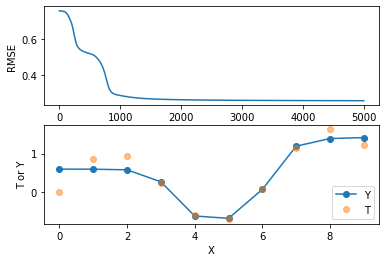

In [91]:
X = np.arange(0, 10).reshape(-1, 1)
# X = np.arange(0, 0.5, 0.05).reshape(-1, 1)
T = np.sin(X) + 0.01 * (X ** 2)

n_inputs = X.shape[1]
n_outputs = T.shape[1]

nnet = NeuralNetwork(n_inputs, [10, 5], n_outputs)
nnet.set_weights_for_testing()

n_epochs = 5000
n_epochs_per_plot = 500

rmses, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 10, 5, 5000, 0.1)
fig = plt.figure()
for reps in range(n_epochs // n_epochs_per_plot):
    plt.clf()
   # nnet.train(X, T, n_epochs=n_epochs_per_plot, learning_rate=0.1)
    plot_data_and_model(X, X_means, X_stds, T_means, T_stds, U, V, W)
    ipd.clear_output(wait=True)
    ipd.display(fig)
    time.sleep(0.2)  # 0.2 seconds
ipd.clear_output(wait=True)

In [92]:
X = np.arange(-2, 2, 0.05).reshape(-1, 1)
T = np.sin(X) * np.sin(X * 10)

n_inputs = X.shape[1]
n_outputs = T.shape[1]

nnet = NeuralNetwork(n_inputs, [50, 10, 5], n_outputs)
nnet.set_weights_for_testing()

n_epochs = 50000
n_epochs_per_plot = 500

fig = plt.figure()
for reps in range(n_epochs // n_epochs_per_plot):
    plt.clf()
    #nnet.train(X, T, n_epochs=n_epochs_per_plot, learning_rate=0.1)
    plot_data_and_model(X, X_means, X_stds, T_means, T_stds, U, V, W)
    plot_data_and_model(X, X_means, X_stds, T_means, T_stds, U, V, W)
    ipd.clear_output(wait=True)
    ipd.display(fig)
    # time.sleep(0.01)  # 0.01 seconds
ipd.clear_output(wait=True)

Weights set for testing by calling set_weights_for_testing()
number of epoch:  0
0
[[-5.01000000e+00 -4.80979798e+00 -4.60959596e+00 -4.40939394e+00
  -4.20919192e+00 -4.00898990e+00 -3.80878788e+00 -3.60858586e+00
  -3.40838384e+00 -3.20818182e+00 -3.00797980e+00 -2.80777778e+00
  -2.60757576e+00 -2.40737374e+00 -2.20717172e+00 -2.00696970e+00
  -1.80676768e+00 -1.60656566e+00 -1.40636364e+00 -1.20616162e+00
  -1.00595960e+00 -8.05757576e-01 -6.05555556e-01 -4.05353535e-01
  -2.05151515e-01 -4.94949495e-03  1.95252525e-01  3.95454545e-01
   5.95656566e-01  7.95858586e-01  9.96060606e-01  1.19626263e+00
   1.39646465e+00  1.59666667e+00  1.79686869e+00  1.99707071e+00
   2.19727273e+00  2.39747475e+00  2.59767677e+00  2.79787879e+00
   2.99808081e+00  3.19828283e+00  3.39848485e+00  3.59868687e+00
   3.79888889e+00  3.99909091e+00  4.19929293e+00  4.39949495e+00
   4.59969697e+00  4.79989899e+00]
 [-4.99989899e+00 -4.79969697e+00 -4.59949495e+00 -4.39929293e+00
  -4.19909091e+00 -3.998

   4.23605029e+00 -3.18253825e+13]]
2
[[-2.07680888e+01 -2.59360984e+03  5.81099477e+03 -6.01404355e+16
   9.86028740e+01]
 [-1.07097236e+02 -2.59397824e+03  5.80991835e+03 -6.01404349e+16
   9.89370544e+01]
 [-1.10071620e+02 -2.59393057e+03  5.81001256e+03 -6.01402980e+16
   9.88951417e+01]
 [-1.41111814e+02 -2.59386230e+03 -5.79729049e+03  6.01404355e+16
   9.88342029e+01]
 [-1.50243251e+02 -2.59374637e+03 -1.58480181e+03  1.64927009e+16
   9.87295766e+01]
 [-3.55758691e+02 -2.59360599e+03 -5.79645465e+03  6.01404355e+16
   9.86499793e+01]
 [-5.72968381e+02 -4.06433567e+02 -5.79595245e+03  6.01404355e+16
   8.65546938e+01]
 [-4.36240615e+02 -2.40594058e+03 -5.79445834e+03  6.01404355e+16
  -9.28165047e+01]
 [-2.43763466e+02 -2.40254222e+03  5.81291878e+03 -6.01404221e+16
  -9.81069681e+01]
 [-2.00489693e+02 -2.40253260e+03  5.81269385e+03 -6.01404355e+16
  -9.81643225e+01]
 [-1.76764995e+02 -2.40254381e+03 -5.79314205e+03  6.01219284e+16
  -9.81517508e+01]]
3
[[ 3.70483743e+24]
 [ 5.

number of epoch:  30
0
[[-3.67598000e+17 -3.70072805e+17 -3.71667143e+17 -3.72310638e+17
  -3.71928914e+17 -3.70441697e+17 -3.67760601e+17 -3.63786753e+17
  -3.58408524e+17 -3.51499761e+17 -3.42919123e+17 -3.32511295e+17
  -3.20111035e+17 -3.05550972e+17 -2.88673741e+17 -2.69348129e+17
  -2.47487213e+17 -2.23064206e+17 -1.96119916e+17 -1.66757593e+17
  -1.35135816e+17 -1.01526182e+17 -6.66814331e+16 -3.30855204e+16
  -6.36618779e+15  1.00918332e+16  6.57704518e+06  4.42174401e+16
   7.38134330e+16  1.08508560e+17  1.42288598e+17  1.70706836e+17
   1.91935966e+17  2.06346608e+17  2.15518502e+17  2.21293635e+17
   2.25208143e+17  2.28310887e+17  2.31208516e+17  2.34186842e+17
   2.37328109e+17  2.40598095e+17  2.43902889e+17  2.47123107e+17
   2.50133444e+17  2.52813461e+17  2.55053432e+17  2.56757539e+17
   2.57845670e+17  2.58254491e+17]
 [-3.74089544e+17 -3.76608053e+17 -3.78230546e+17 -3.78885404e+17
  -3.78496939e+17 -3.76983459e+17 -3.74255016e+17 -3.70210993e+17
  -3.64737788e+17 

  -9.81517508e+01]]
3
[[-8.00624765e+62]
 [-1.11917503e+63]
 [-8.00624765e+62]
 [-1.11917503e+63]
 [ 1.11917503e+63]
 [ 8.00624765e+62]]
number of epoch:  47
0
[[-3.67598000e+17 -3.70072805e+17 -3.71667143e+17 -3.72310638e+17
  -3.71928914e+17 -3.70441697e+17 -3.67760601e+17 -3.63786753e+17
  -3.58408524e+17 -3.51499761e+17 -3.42919123e+17 -3.32511295e+17
  -3.20111035e+17 -3.05550972e+17 -2.88673741e+17 -2.69348129e+17
  -2.47487213e+17 -2.23064206e+17 -1.96119916e+17 -1.66757593e+17
  -1.35135816e+17 -1.01526182e+17 -6.66814331e+16 -3.30855204e+16
  -6.36618779e+15  1.00918332e+16  6.57704518e+06  4.42174401e+16
   7.38134330e+16  1.08508560e+17  1.42288598e+17  1.70706836e+17
   1.91935966e+17  2.06346608e+17  2.15518502e+17  2.21293635e+17
   2.25208143e+17  2.28310887e+17  2.31208516e+17  2.34186842e+17
   2.37328109e+17  2.40598095e+17  2.43902889e+17  2.47123107e+17
   2.50133444e+17  2.52813461e+17  2.55053432e+17  2.56757539e+17
   2.57845670e+17  2.58254491e+17]
 [-3.74089544

   2.62399059e+17  2.62815099e+17]]
1
[[ 7.51389014e+09  1.75331268e+12 -6.02438620e+00  2.22943768e+17
  -6.40787450e+01  2.05101850e+05 -6.74056261e+00  2.78301340e+11
   6.33017536e+00  2.66693270e+14]
 [ 2.39802119e+09  5.59561146e+11 -3.29954514e+00  7.11514105e+16
  -4.58776300e+00 -2.05159686e+05 -4.41887318e-01  8.88185081e+10
  -4.11036686e+00  8.51138494e+13]
 [ 2.19215455e+09  5.11523632e+11 -3.19893495e+00  6.50431650e+16
  -3.85701927e+00 -2.05159497e+05 -3.84658644e-01  8.11935679e+10
  -4.02657708e+00  7.78069488e+13]
 [ 1.98071478e+09  4.62185671e+11 -3.09369097e+00  5.87695602e+16
  -3.08063387e+00 -2.05159259e+05 -3.22179922e-01  7.33622092e+10
  -3.94510258e+00  7.03022394e+13]
 [ 1.76339285e+09  4.11475148e+11 -2.98328858e+00  5.23214261e+16
  -2.25210389e+00 -2.05158965e+05 -2.53779357e-01  6.53129851e+10
  -3.86672615e+00  6.25887520e+13]
 [ 1.53974702e+09  3.59288989e+11 -2.86712127e+00  4.56856566e+16
  -1.36392184e+00 -2.05158607e+05 -1.78683482e-01  5.70295351

3
[[-4.54874008e+102]
 [-6.35857965e+102]
 [-4.54874008e+102]
 [-6.35857965e+102]
 [ 6.35857965e+102]
 [ 4.54874008e+102]]
number of epoch:  75
0
[[-3.67598000e+17 -3.70072805e+17 -3.71667143e+17 -3.72310638e+17
  -3.71928914e+17 -3.70441697e+17 -3.67760601e+17 -3.63786753e+17
  -3.58408524e+17 -3.51499761e+17 -3.42919123e+17 -3.32511295e+17
  -3.20111035e+17 -3.05550972e+17 -2.88673741e+17 -2.69348129e+17
  -2.47487213e+17 -2.23064206e+17 -1.96119916e+17 -1.66757593e+17
  -1.35135816e+17 -1.01526182e+17 -6.66814331e+16 -3.30855204e+16
  -6.36618779e+15  1.00918332e+16  6.57704518e+06  4.42174401e+16
   7.38134330e+16  1.08508560e+17  1.42288598e+17  1.70706836e+17
   1.91935966e+17  2.06346608e+17  2.15518502e+17  2.21293635e+17
   2.25208143e+17  2.28310887e+17  2.31208516e+17  2.34186842e+17
   2.37328109e+17  2.40598095e+17  2.43902889e+17  2.47123107e+17
   2.50133444e+17  2.52813461e+17  2.55053432e+17  2.56757539e+17
   2.57845670e+17  2.58254491e+17]
 [-3.74089544e+17 -3.766080

   4.23605029e+00 -3.18253825e+13]]
2
[[-2.07680888e+01 -2.59360984e+03  5.81099477e+03 -6.01404355e+16
   9.86028740e+01]
 [-1.07097236e+02 -2.59397824e+03  5.80991835e+03 -6.01404349e+16
   9.89370544e+01]
 [-1.10071620e+02 -2.59393057e+03  5.81001256e+03 -6.01402980e+16
   9.88951417e+01]
 [-1.41111814e+02 -2.59386230e+03 -5.79729049e+03  6.01404355e+16
   9.88342029e+01]
 [-1.50243251e+02 -2.59374637e+03 -1.58480181e+03  1.64927009e+16
   9.87295766e+01]
 [-3.55758691e+02 -2.59360599e+03 -5.79645465e+03  6.01404355e+16
   9.86499793e+01]
 [-5.72968381e+02 -4.06433567e+02 -5.79595245e+03  6.01404355e+16
   8.65546938e+01]
 [-4.36240615e+02 -2.40594058e+03 -5.79445834e+03  6.01404355e+16
  -9.28165047e+01]
 [-2.43763466e+02 -2.40254222e+03  5.81291878e+03 -6.01404221e+16
  -9.81069681e+01]
 [-2.00489693e+02 -2.40253260e+03  5.81269385e+03 -6.01404355e+16
  -9.81643225e+01]
 [-1.76764995e+02 -2.40254381e+03 -5.79314205e+03  6.01219284e+16
  -9.81517508e+01]]
3
[[ 9.01414190e+123]
 [ 1

/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/ipykernel_35593/1439358227.py:124: RuntimeWarning: overflow encountered in square
  result = np.sqrt(np.mean((Final_Output - T) ** 2))
/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/ipykernel_35593/1439358227.py:117: RuntimeWarning: overflow encountered in matmul
  D = D @ self.Ws[layeri][1:, :].T * (1 - self.Zs[layeri]**2)
/var/folders/cy/xqvbtsps4c554p7w04g2ywb00000gn/T/ipykernel_35593/1439358227.py:117: RuntimeWarning: invalid value encountered in multiply
  D = D @ self.Ws[layeri][1:, :].T * (1 - self.Zs[layeri]**2)



3
[[ 1.55086211e+155]
 [ 2.16791464e+155]
 [ 1.55086211e+155]
 [ 2.16791464e+155]
 [-2.16791464e+155]
 [-1.55086211e+155]]
number of epoch:  112
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan n

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  148
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan n

0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan 

2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  183
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]


3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  186
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan n

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan n

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  228
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  247
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan n

number of epoch:  279
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]


2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  290
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]


  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan n

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  316
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  319
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan n

  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan n

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  365
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  383
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  401
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  407
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  418
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  429
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  445
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan 

 [nan nan nan nan nan nan nan nan nan nan]]
2
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  477
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]

 [nan nan nan nan nan]]
3
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
number of epoch:  495
0
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]
1
[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan

TypeError: plot_data_and_model() missing 5 required positional arguments: 'T_means', 'T_stds', 'U', 'V', and 'W'

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'RMSE')

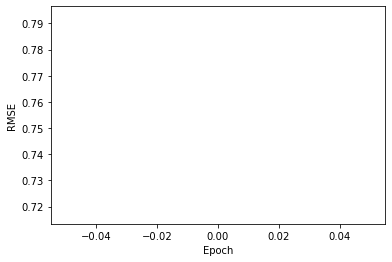

In [101]:
plt.plot(rmses)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

Here is another example with a little more interesting data.

In [102]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))
Xtrain.shape,Ttrain.shape

((30, 1), (30, 1))

In [103]:
rmses, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)

[[0]
 [0]]
[[0]
 [0]
 [0]]
[[2.17656825e-04]
 [4.79650138e-06]]
[[-5.77315973e-18]
 [ 2.17656825e-04]
 [ 4.79650138e-06]]
[[4.35259604e-04]
 [9.59086007e-06]]
[[3.25626122e-07]
 [4.35259604e-04]
 [9.59086007e-06]]
[[6.52809634e-04]
 [1.43830942e-05]]
[[9.73540796e-07]
 [6.52809634e-04]
 [1.43830942e-05]]
[[8.70308205e-04]
 [1.91732218e-05]]
[[1.94044118e-06]
 [8.70308205e-04]
 [1.91732218e-05]]
[[1.08775660e-03]
 [2.39612604e-05]]
[[3.22305878e-06]
 [1.08775660e-03]
 [2.39612604e-05]]
[[1.30515611e-03]
 [2.87472277e-05]]
[[4.81815915e-06]
 [1.30515611e-03]
 [2.87472277e-05]]
[[1.52250799e-03]
 [3.35311409e-05]]
[[6.72254149e-06]
 [1.52250799e-03]
 [3.35311409e-05]]
[[1.73981353e-03]
 [3.83130172e-05]]
[[8.93303831e-06]
 [1.73981353e-03]
 [3.83130172e-05]]
[[1.95707398e-03]
 [4.30928734e-05]]
[[1.14465151e-05]
 [1.95707398e-03]
 [4.30928734e-05]]
[[2.17429061e-03]
 [4.78707262e-05]]
[[1.42598700e-05]
 [2.17429061e-03]
 [4.78707262e-05]]
[[2.39146467e-03]
 [5.26465922e-05]]
[[1.73700335e

[[0.06029778]
 [0.00124632]]
[[0.00573723]
 [0.06029778]
 [0.00124632]]
[[0.06053849]
 [0.00125079]]
[[0.00576792]
 [0.06053849]
 [0.00125079]]
[[0.0607794 ]
 [0.00125526]]
[[0.00579863]
 [0.0607794 ]
 [0.00125526]]
[[0.06102053]
 [0.00125973]]
[[0.00582938]
 [0.06102053]
 [0.00125973]]
[[0.06126187]
 [0.0012642 ]]
[[0.00586015]
 [0.06126187]
 [0.0012642 ]]
[[0.06150343]
 [0.00126867]]
[[0.00589094]
 [0.06150343]
 [0.00126867]]
[[0.0617452 ]
 [0.00127314]]
[[0.00592177]
 [0.0617452 ]
 [0.00127314]]
[[0.06198718]
 [0.00127761]]
[[0.00595262]
 [0.06198718]
 [0.00127761]]
[[0.06222938]
 [0.00128207]]
[[0.0059835 ]
 [0.06222938]
 [0.00128207]]
[[0.0624718 ]
 [0.00128654]]
[[0.00601441]
 [0.0624718 ]
 [0.00128654]]
[[0.06271444]
 [0.001291  ]]
[[0.00604534]
 [0.06271444]
 [0.001291  ]]
[[0.06295729]
 [0.00129546]]
[[0.0060763 ]
 [0.06295729]
 [0.00129546]]
[[0.06320037]
 [0.00129993]]
[[0.00610729]
 [0.06320037]
 [0.00129993]]
[[0.06344366]
 [0.00130439]]
[[0.0061383 ]
 [0.06344366]
 [0.001

[[0.10822121]
 [0.00203563]]
[[0.01163858]
 [0.10822121]
 [0.00203563]]
[[0.1085158 ]
 [0.00203986]]
[[0.01167272]
 [0.1085158 ]
 [0.00203986]]
[[0.10881078]
 [0.00204409]]
[[0.01170687]
 [0.10881078]
 [0.00204409]]
[[0.10910616]
 [0.00204831]]
[[0.01174104]
 [0.10910616]
 [0.00204831]]
[[0.10940193]
 [0.00205254]]
[[0.01177522]
 [0.10940193]
 [0.00205254]]
[[0.1096981 ]
 [0.00205676]]
[[0.01180941]
 [0.1096981 ]
 [0.00205676]]
[[0.10999466]
 [0.00206098]]
[[0.01184362]
 [0.10999466]
 [0.00206098]]
[[0.11029162]
 [0.0020652 ]]
[[0.01187784]
 [0.11029162]
 [0.0020652 ]]
[[0.11058898]
 [0.00206942]]
[[0.01191207]
 [0.11058898]
 [0.00206942]]
[[0.11088674]
 [0.00207364]]
[[0.01194632]
 [0.11088674]
 [0.00207364]]
[[0.1111849 ]
 [0.00207785]]
[[0.01198058]
 [0.1111849 ]
 [0.00207785]]
[[0.11148347]
 [0.00208206]]
[[0.01201486]
 [0.11148347]
 [0.00208206]]
[[0.11178244]
 [0.00208627]]
[[0.01204914]
 [0.11178244]
 [0.00208627]]
[[0.11208181]
 [0.00209048]]
[[0.01208344]
 [0.11208181]
 [0.002

 [0.00291644]]
[[0.01934744]
 [0.18422917]
 [0.00291644]]
[[0.18463997]
 [0.00292023]]
[[0.01938311]
 [0.18463997]
 [0.00292023]]
[[0.18505145]
 [0.00292401]]
[[0.01941877]
 [0.18505145]
 [0.00292401]]
[[0.18546362]
 [0.0029278 ]]
[[0.01945443]
 [0.18546362]
 [0.0029278 ]]
[[0.18587648]
 [0.00293158]]
[[0.01949009]
 [0.18587648]
 [0.00293158]]
[[0.18629003]
 [0.00293536]]
[[0.01952574]
 [0.18629003]
 [0.00293536]]
[[0.18670428]
 [0.00293913]]
[[0.01956139]
 [0.18670428]
 [0.00293913]]
[[0.18711922]
 [0.00294291]]
[[0.01959704]
 [0.18711922]
 [0.00294291]]
[[0.18753485]
 [0.00294668]]
[[0.01963268]
 [0.18753485]
 [0.00294668]]
[[0.18795118]
 [0.00295045]]
[[0.01966832]
 [0.18795118]
 [0.00295045]]
[[0.18836821]
 [0.00295422]]
[[0.01970395]
 [0.18836821]
 [0.00295422]]
[[0.18878594]
 [0.00295799]]
[[0.01973958]
 [0.18878594]
 [0.00295799]]
[[0.18920437]
 [0.00296175]]
[[0.01977521]
 [0.18920437]
 [0.00296175]]
[[0.18962351]
 [0.00296551]]
[[0.01981083]
 [0.18962351]
 [0.00296551]]
[[0.19

[[0.27187503]
 [0.00356787]]
[[0.02563131]
 [0.27187503]
 [0.00356787]]
[[0.27243694]
 [0.00357124]]
[[0.02566373]
 [0.27243694]
 [0.00357124]]
[[0.27299982]
 [0.00357461]]
[[0.02569611]
 [0.27299982]
 [0.00357461]]
[[0.27356367]
 [0.00357798]]
[[0.02572846]
 [0.27356367]
 [0.00357798]]
[[0.27412849]
 [0.00358135]]
[[0.02576078]
 [0.27412849]
 [0.00358135]]
[[0.27469428]
 [0.00358471]]
[[0.02579306]
 [0.27469428]
 [0.00358471]]
[[0.27526105]
 [0.00358807]]
[[0.02582531]
 [0.27526105]
 [0.00358807]]
[[0.2758288 ]
 [0.00359143]]
[[0.02585752]
 [0.2758288 ]
 [0.00359143]]
[[0.27639752]
 [0.00359479]]
[[0.0258897 ]
 [0.27639752]
 [0.00359479]]
[[0.27696722]
 [0.00359814]]
[[0.02592184]
 [0.27696722]
 [0.00359814]]
[[0.27753791]
 [0.0036015 ]]
[[0.02595395]
 [0.27753791]
 [0.0036015 ]]
[[0.27810957]
 [0.00360485]]
[[0.02598602]
 [0.27810957]
 [0.00360485]]
[[0.27868221]
 [0.0036082 ]]
[[0.02601806]
 [0.27868221]
 [0.0036082 ]]
[[0.27925584]
 [0.00361154]]
[[0.02605006]
 [0.27925584]
 [0.003

 [0.00408604]]
[[0.37615876]
 [0.00408912]]
[[0.03038098]
 [0.37615876]
 [0.00408912]]
[[0.37688646]
 [0.0040922 ]]
[[0.03040728]
 [0.37688646]
 [0.0040922 ]]
[[0.37761516]
 [0.00409528]]
[[0.03043355]
 [0.37761516]
 [0.00409528]]
[[0.37834485]
 [0.00409835]]
[[0.0304598 ]
 [0.37834485]
 [0.00409835]]
[[0.37907554]
 [0.00410142]]
[[0.03048602]
 [0.37907554]
 [0.00410142]]
[[0.37980723]
 [0.0041045 ]]
[[0.03051222]
 [0.37980723]
 [0.0041045 ]]
[[0.38053991]
 [0.00410757]]
[[0.03053839]
 [0.38053991]
 [0.00410757]]
[[0.38127357]
 [0.00411064]]
[[0.03056454]
 [0.38127357]
 [0.00411064]]
[[0.38200823]
 [0.00411371]]
[[0.03059066]
 [0.38200823]
 [0.00411371]]
[[0.38274387]
 [0.00411677]]
[[0.03061676]
 [0.38274387]
 [0.00411677]]
[[0.3834805 ]
 [0.00411984]]
[[0.03064284]
 [0.3834805 ]
 [0.00411984]]
[[0.38421811]
 [0.0041229 ]]
[[0.0306689 ]
 [0.38421811]
 [0.0041229 ]]
[[0.38495671]
 [0.00412596]]
[[0.03069493]
 [0.38495671]
 [0.00412596]]
[[0.38569628]
 [0.00412902]]
[[0.03072094]
 [0.38

 [0.00456385]]
[[0.03478159]
 [0.50409308]
 [0.00456385]]
[[0.50493551]
 [0.00456663]]
[[0.03481474]
 [0.50493551]
 [0.00456663]]
[[0.5057782 ]
 [0.00456942]]
[[0.03484804]
 [0.5057782 ]
 [0.00456942]]
[[0.50662114]
 [0.0045722 ]]
[[0.0348815 ]
 [0.50662114]
 [0.0045722 ]]
[[0.50746432]
 [0.00457498]]
[[0.0349151 ]
 [0.50746432]
 [0.00457498]]
[[0.50830774]
 [0.00457776]]
[[0.03494887]
 [0.50830774]
 [0.00457776]]
[[0.50915138]
 [0.00458053]]
[[0.03498279]
 [0.50915138]
 [0.00458053]]
[[0.50999524]
 [0.00458331]]
[[0.03501687]
 [0.50999524]
 [0.00458331]]
[[0.51083932]
 [0.00458607]]
[[0.03505112]
 [0.51083932]
 [0.00458607]]
[[0.51168359]
 [0.00458884]]
[[0.03508553]
 [0.51168359]
 [0.00458884]]
[[0.51252807]
 [0.0045916 ]]
[[0.0351201 ]
 [0.51252807]
 [0.0045916 ]]
[[0.51337273]
 [0.00459436]]
[[0.03515484]
 [0.51337273]
 [0.00459436]]
[[0.51421758]
 [0.00459712]]
[[0.03518976]
 [0.51421758]
 [0.00459712]]
[[0.51506259]
 [0.00459988]]
[[0.03522484]
 [0.51506259]
 [0.00459988]]
[[0.51

 [0.00513945]]
[[0.05494427]
 [0.71341664]
 [0.00513945]]
[[0.71406124]
 [0.00514069]]
[[0.05508171]
 [0.71406124]
 [0.00514069]]
[[0.7147044 ]
 [0.00514193]]
[[0.05521972]
 [0.7147044 ]
 [0.00514193]]
[[0.71534613]
 [0.00514315]]
[[0.05535827]
 [0.71534613]
 [0.00514315]]
[[0.71598642]
 [0.00514437]]
[[0.05549738]
 [0.71598642]
 [0.00514437]]
[[0.71662527]
 [0.00514558]]
[[0.05563705]
 [0.71662527]
 [0.00514558]]
[[0.71726268]
 [0.00514678]]
[[0.05577727]
 [0.71726268]
 [0.00514678]]
[[0.71789865]
 [0.00514798]]
[[0.05591804]
 [0.71789865]
 [0.00514798]]
[[0.71853318]
 [0.00514916]]
[[0.05605937]
 [0.71853318]
 [0.00514916]]
[[0.71916626]
 [0.00515034]]
[[0.05620126]
 [0.71916626]
 [0.00515034]]
[[0.7197979]
 [0.0051515]]
[[0.0563437]
 [0.7197979]
 [0.0051515]]
[[0.72042809]
 [0.00515266]]
[[0.05648669]
 [0.72042809]
 [0.00515266]]
[[0.72105684]
 [0.00515381]]
[[0.05663024]
 [0.72105684]
 [0.00515381]]
[[0.72168414]
 [0.00515496]]
[[0.05677435]
 [0.72168414]
 [0.00515496]]
[[0.7223099

 [0.00522289]]
[[0.09600213]
 [0.81878269]
 [0.00522289]]
[[0.81914503]
 [0.00522251]]
[[0.09624715]
 [0.81914503]
 [0.00522251]]
[[0.81950629]
 [0.00522213]]
[[0.09649259]
 [0.81950629]
 [0.00522213]]
[[0.8198665 ]
 [0.00522173]]
[[0.09673844]
 [0.8198665 ]
 [0.00522173]]
[[0.82022565]
 [0.00522133]]
[[0.09698469]
 [0.82022565]
 [0.00522133]]
[[0.82058374]
 [0.00522093]]
[[0.09723135]
 [0.82058374]
 [0.00522093]]
[[0.82094077]
 [0.00522052]]
[[0.09747842]
 [0.82094077]
 [0.00522052]]
[[0.82129676]
 [0.0052201 ]]
[[0.09772589]
 [0.82129676]
 [0.0052201 ]]
[[0.82165171]
 [0.00521968]]
[[0.09797376]
 [0.82165171]
 [0.00521968]]
[[0.82200561]
 [0.00521925]]
[[0.09822203]
 [0.82200561]
 [0.00521925]]
[[0.82235847]
 [0.00521882]]
[[0.0984707 ]
 [0.82235847]
 [0.00521882]]
[[0.82271029]
 [0.00521838]]
[[0.09871977]
 [0.82271029]
 [0.00521838]]
[[0.82306108]
 [0.00521793]]
[[0.09896924]
 [0.82306108]
 [0.00521793]]
[[0.82341084]
 [0.00521748]]
[[0.09921911]
 [0.82341084]
 [0.00521748]]
[[0.82

 [0.00508355]]
[[0.14315976]
 [0.86804117]
 [0.00508355]]
[[0.86826526]
 [0.00508239]]
[[0.14345748]
 [0.86826526]
 [0.00508239]]
[[0.86848878]
 [0.00508123]]
[[0.14375541]
 [0.86848878]
 [0.00508123]]
[[0.86871174]
 [0.00508007]]
[[0.14405354]
 [0.86871174]
 [0.00508007]]
[[0.86893414]
 [0.00507891]]
[[0.14435187]
 [0.86893414]
 [0.00507891]]
[[0.86915597]
 [0.00507774]]
[[0.14465041]
 [0.86915597]
 [0.00507774]]
[[0.86937726]
 [0.00507658]]
[[0.14494915]
 [0.86937726]
 [0.00507658]]
[[0.86959798]
 [0.0050754 ]]
[[0.14524808]
 [0.86959798]
 [0.0050754 ]]
[[0.86981816]
 [0.00507423]]
[[0.14554722]
 [0.86981816]
 [0.00507423]]
[[0.87003779]
 [0.00507305]]
[[0.14584655]
 [0.87003779]
 [0.00507305]]
[[0.87025687]
 [0.00507187]]
[[0.14614608]
 [0.87025687]
 [0.00507187]]
[[0.8704754 ]
 [0.00507069]]
[[0.14644581]
 [0.8704754 ]
 [0.00507069]]
[[0.87069339]
 [0.0050695 ]]
[[0.14674573]
 [0.87069339]
 [0.0050695 ]]
[[0.87091084]
 [0.00506831]]
[[0.14704584]
 [0.87091084]
 [0.00506831]]
[[0.87

 [0.00479098]]
[[0.20966311]
 [0.90613543]
 [0.00479098]]
[[0.90628095]
 [0.00478947]]
[[0.20998337]
 [0.90628095]
 [0.00478947]]
[[0.90642624]
 [0.00478796]]
[[0.21030365]
 [0.90642624]
 [0.00478796]]
[[0.90657132]
 [0.00478644]]
[[0.21062395]
 [0.90657132]
 [0.00478644]]
[[0.90671618]
 [0.00478493]]
[[0.21094427]
 [0.90671618]
 [0.00478493]]
[[0.90686082]
 [0.00478342]]
[[0.2112646 ]
 [0.90686082]
 [0.00478342]]
[[0.90700526]
 [0.0047819 ]]
[[0.21158496]
 [0.90700526]
 [0.0047819 ]]
[[0.90714947]
 [0.00478039]]
[[0.21190533]
 [0.90714947]
 [0.00478039]]
[[0.90729348]
 [0.00477887]]
[[0.21222572]
 [0.90729348]
 [0.00477887]]
[[0.90743728]
 [0.00477735]]
[[0.21254612]
 [0.90743728]
 [0.00477735]]
[[0.90758086]
 [0.00477584]]
[[0.21286654]
 [0.90758086]
 [0.00477584]]
[[0.90772424]
 [0.00477432]]
[[0.21318698]
 [0.90772424]
 [0.00477432]]
[[0.90786741]
 [0.0047728 ]]
[[0.21350743]
 [0.90786741]
 [0.0047728 ]]
[[0.90801037]
 [0.00477128]]
[[0.21382789]
 [0.90801037]
 [0.00477128]]
[[0.90

[[0.92564057]
 [0.00456513]]
[[0.25664828]
 [0.92564057]
 [0.00456513]]
[[0.92576296]
 [0.00456359]]
[[0.25696529]
 [0.92576296]
 [0.00456359]]
[[0.92588524]
 [0.00456205]]
[[0.25728224]
 [0.92588524]
 [0.00456205]]
[[0.92600742]
 [0.00456051]]
[[0.25759913]
 [0.92600742]
 [0.00456051]]
[[0.92612949]
 [0.00455897]]
[[0.25791596]
 [0.92612949]
 [0.00455897]]
[[0.92625145]
 [0.00455743]]
[[0.25823273]
 [0.92625145]
 [0.00455743]]
[[0.9263733 ]
 [0.00455589]]
[[0.25854944]
 [0.9263733 ]
 [0.00455589]]
[[0.92649505]
 [0.00455434]]
[[0.25886609]
 [0.92649505]
 [0.00455434]]
[[0.9266167]
 [0.0045528]]
[[0.25918267]
 [0.9266167 ]
 [0.0045528 ]]
[[0.92673824]
 [0.00455126]]
[[0.25949919]
 [0.92673824]
 [0.00455126]]
[[0.92685968]
 [0.00454972]]
[[0.25981565]
 [0.92685968]
 [0.00454972]]
[[0.92698101]
 [0.00454818]]
[[0.26013204]
 [0.92698101]
 [0.00454818]]
[[0.92710224]
 [0.00454664]]
[[0.26044837]
 [0.92710224]
 [0.00454664]]
[[0.92722337]
 [0.0045451 ]]
[[0.26076464]
 [0.92722337]
 [0.00454

 [0.00416985]]
[[0.33774884]
 [0.95558649]
 [0.00416985]]
[[0.95569246]
 [0.00416844]]
[[0.33803809]
 [0.95569246]
 [0.00416844]]
[[0.95579839]
 [0.00416704]]
[[0.3383272 ]
 [0.95579839]
 [0.00416704]]
[[0.95590429]
 [0.00416564]]
[[0.33861617]
 [0.95590429]
 [0.00416564]]
[[0.95601016]
 [0.00416424]]
[[0.338905  ]
 [0.95601016]
 [0.00416424]]
[[0.95611599]
 [0.00416284]]
[[0.33919369]
 [0.95611599]
 [0.00416284]]
[[0.95622179]
 [0.00416144]]
[[0.33948225]
 [0.95622179]
 [0.00416144]]
[[0.95632756]
 [0.00416005]]
[[0.33977067]
 [0.95632756]
 [0.00416005]]
[[0.9564333 ]
 [0.00415865]]
[[0.34005895]
 [0.9564333 ]
 [0.00415865]]
[[0.95653901]
 [0.00415725]]
[[0.34034709]
 [0.95653901]
 [0.00415725]]
[[0.95664468]
 [0.00415586]]
[[0.3406351 ]
 [0.95664468]
 [0.00415586]]
[[0.95675033]
 [0.00415446]]
[[0.34092296]
 [0.95675033]
 [0.00415446]]
[[0.95685594]
 [0.00415307]]
[[0.34121069]
 [0.95685594]
 [0.00415307]]
[[0.95696152]
 [0.00415167]]
[[0.34149827]
 [0.95696152]
 [0.00415167]]
[[0.95

 [0.00391458]]
[[0.39088139]
 [0.97553132]
 [0.00391458]]
[[0.97563236]
 [0.00391334]]
[[0.39114203]
 [0.97563236]
 [0.00391334]]
[[0.97573339]
 [0.0039121 ]]
[[0.39140251]
 [0.97573339]
 [0.0039121 ]]
[[0.9758344 ]
 [0.00391087]]
[[0.39166284]
 [0.9758344 ]
 [0.00391087]]
[[0.97593538]
 [0.00390963]]
[[0.39192301]
 [0.97593538]
 [0.00390963]]
[[0.97603634]
 [0.0039084 ]]
[[0.39218303]
 [0.97603634]
 [0.0039084 ]]
[[0.97613728]
 [0.00390717]]
[[0.39244289]
 [0.97613728]
 [0.00390717]]
[[0.9762382 ]
 [0.00390593]]
[[0.3927026 ]
 [0.9762382 ]
 [0.00390593]]
[[0.9763391]
 [0.0039047]]
[[0.39296215]
 [0.9763391 ]
 [0.0039047 ]]
[[0.97643998]
 [0.00390347]]
[[0.39322155]
 [0.97643998]
 [0.00390347]]
[[0.97654083]
 [0.00390224]]
[[0.39348079]
 [0.97654083]
 [0.00390224]]
[[0.97664167]
 [0.00390101]]
[[0.39373987]
 [0.97664167]
 [0.00390101]]
[[0.97674248]
 [0.00389979]]
[[0.39399881]
 [0.97674248]
 [0.00389979]]
[[0.97684327]
 [0.00389856]]
[[0.39425758]
 [0.97684327]
 [0.00389856]]
[[0.9769

 [0.00364375]]
[[0.44900101]
 [0.9991784 ]
 [0.00364375]]
[[0.99927436]
 [0.00364273]]
[[0.44922485]
 [0.99927436]
 [0.00364273]]
[[0.99937029]
 [0.00364171]]
[[0.44944855]
 [0.99937029]
 [0.00364171]]
[[0.99946619]
 [0.00364069]]
[[0.4496721 ]
 [0.99946619]
 [0.00364069]]
[[0.99956208]
 [0.00363968]]
[[0.4498955 ]
 [0.99956208]
 [0.00363968]]
[[0.99965794]
 [0.00363866]]
[[0.45011876]
 [0.99965794]
 [0.00363866]]
[[0.99975378]
 [0.00363765]]
[[0.45034186]
 [0.99975378]
 [0.00363765]]
[[0.9998496 ]
 [0.00363663]]
[[0.45056482]
 [0.9998496 ]
 [0.00363663]]
[[0.9999454 ]
 [0.00363562]]
[[0.45078764]
 [0.9999454 ]
 [0.00363562]]
[[1.00004118]
 [0.00363461]]
[[0.4510103 ]
 [1.00004118]
 [0.00363461]]
[[1.00013693]
 [0.0036336 ]]
[[0.45123282]
 [1.00013693]
 [0.0036336 ]]
[[1.00023266]
 [0.00363259]]
[[0.4514552 ]
 [1.00023266]
 [0.00363259]]
[[1.00032837]
 [0.00363158]]
[[0.45167742]
 [1.00032837]
 [0.00363158]]
[[1.00042405]
 [0.00363057]]
[[0.4518995 ]
 [1.00042405]
 [0.00363057]]
[[1.00

[[1.01452115]
 [0.00348922]]
[[0.48360052]
 [1.01452115]
 [0.00348922]]
[[1.0146134 ]
 [0.00348834]]
[[0.48380148]
 [1.0146134 ]
 [0.00348834]]
[[1.01470563]
 [0.00348746]]
[[0.48400232]
 [1.01470563]
 [0.00348746]]
[[1.01479784]
 [0.00348659]]
[[0.48420302]
 [1.01479784]
 [0.00348659]]
[[1.01489002]
 [0.00348571]]
[[0.48440359]
 [1.01489002]
 [0.00348571]]
[[1.01498218]
 [0.00348484]]
[[0.48460403]
 [1.01498218]
 [0.00348484]]
[[1.01507431]
 [0.00348396]]
[[0.48480433]
 [1.01507431]
 [0.00348396]]
[[1.01516643]
 [0.00348309]]
[[0.48500451]
 [1.01516643]
 [0.00348309]]
[[1.01525852]
 [0.00348222]]
[[0.48520455]
 [1.01525852]
 [0.00348222]]
[[1.01535058]
 [0.00348134]]
[[0.48540446]
 [1.01535058]
 [0.00348134]]
[[1.01544263]
 [0.00348047]]
[[0.48560424]
 [1.01544263]
 [0.00348047]]
[[1.01553465]
 [0.0034796 ]]
[[0.48580389]
 [1.01553465]
 [0.0034796 ]]
[[1.01562665]
 [0.00347874]]
[[0.48600341]
 [1.01562665]
 [0.00347874]]
[[1.01571862]
 [0.00347787]]
[[0.48620279]
 [1.01571862]
 [0.003

 [0.00327915]]
[[0.53375839]
 [1.03877569]
 [0.00327915]]
[[1.03886187]
 [0.00327848]]
[[0.53392752]
 [1.03886187]
 [0.00327848]]
[[1.03894802]
 [0.0032778 ]]
[[0.53409654]
 [1.03894802]
 [0.0032778 ]]
[[1.03903415]
 [0.00327713]]
[[0.53426545]
 [1.03903415]
 [0.00327713]]
[[1.03912027]
 [0.00327646]]
[[0.53443427]
 [1.03912027]
 [0.00327646]]
[[1.03920636]
 [0.00327579]]
[[0.53460299]
 [1.03920636]
 [0.00327579]]
[[1.03929243]
 [0.00327512]]
[[0.5347716 ]
 [1.03929243]
 [0.00327512]]
[[1.03937848]
 [0.00327446]]
[[0.53494011]
 [1.03937848]
 [0.00327446]]
[[1.03946451]
 [0.00327379]]
[[0.53510852]
 [1.03946451]
 [0.00327379]]
[[1.03955052]
 [0.00327312]]
[[0.53527684]
 [1.03955052]
 [0.00327312]]
[[1.03963651]
 [0.00327245]]
[[0.53544505]
 [1.03963651]
 [0.00327245]]
[[1.03972248]
 [0.00327179]]
[[0.53561316]
 [1.03972248]
 [0.00327179]]
[[1.03980843]
 [0.00327112]]
[[0.53578116]
 [1.03980843]
 [0.00327112]]
[[1.03989435]
 [0.00327046]]
[[0.53594907]
 [1.03989435]
 [0.00327046]]
[[1.03

 [0.00314917]]
[[0.56795668]
 [1.05685554]
 [0.00314917]]
[[1.05693768]
 [0.00314863]]
[[0.56810639]
 [1.05693768]
 [0.00314863]]
[[1.0570198 ]
 [0.00314809]]
[[0.56825602]
 [1.0570198 ]
 [0.00314809]]
[[1.05710191]
 [0.00314756]]
[[0.56840557]
 [1.05710191]
 [0.00314756]]
[[1.057184  ]
 [0.00314702]]
[[0.56855504]
 [1.057184  ]
 [0.00314702]]
[[1.05726608]
 [0.00314648]]
[[0.56870443]
 [1.05726608]
 [0.00314648]]
[[1.05734814]
 [0.00314594]]
[[0.56885374]
 [1.05734814]
 [0.00314594]]
[[1.05743018]
 [0.0031454 ]]
[[0.56900298]
 [1.05743018]
 [0.0031454 ]]
[[1.05751221]
 [0.00314487]]
[[0.56915213]
 [1.05751221]
 [0.00314487]]
[[1.05759422]
 [0.00314433]]
[[0.56930121]
 [1.05759422]
 [0.00314433]]
[[1.05767621]
 [0.0031438 ]]
[[0.5694502 ]
 [1.05767621]
 [0.0031438 ]]
[[1.05775819]
 [0.00314326]]
[[0.56959912]
 [1.05775819]
 [0.00314326]]
[[1.05784015]
 [0.00314273]]
[[0.56974796]
 [1.05784015]
 [0.00314273]]
[[1.05792209]
 [0.00314219]]
[[0.56989673]
 [1.05792209]
 [0.00314219]]
[[1.05

[[1.07377286]
 [0.00304706]]
[[0.59778773]
 [1.07377286]
 [0.00304706]]
[[1.07385197]
 [0.00304663]]
[[0.59792267]
 [1.07385197]
 [0.00304663]]
[[1.07393106]
 [0.00304619]]
[[0.59805756]
 [1.07393106]
 [0.00304619]]
[[1.07401015]
 [0.00304576]]
[[0.59819238]
 [1.07401015]
 [0.00304576]]
[[1.07408922]
 [0.00304532]]
[[0.59832714]
 [1.07408922]
 [0.00304532]]
[[1.07416828]
 [0.00304489]]
[[0.59846183]
 [1.07416828]
 [0.00304489]]
[[1.07424733]
 [0.00304446]]
[[0.59859647]
 [1.07424733]
 [0.00304446]]
[[1.07432636]
 [0.00304402]]
[[0.59873104]
 [1.07432636]
 [0.00304402]]
[[1.07440538]
 [0.00304359]]
[[0.59886556]
 [1.07440538]
 [0.00304359]]
[[1.0744844 ]
 [0.00304316]]
[[0.59900001]
 [1.0744844 ]
 [0.00304316]]
[[1.07456339]
 [0.00304273]]
[[0.5991344 ]
 [1.07456339]
 [0.00304273]]
[[1.07464238]
 [0.0030423 ]]
[[0.59926873]
 [1.07464238]
 [0.0030423 ]]
[[1.07472135]
 [0.00304187]]
[[0.599403  ]
 [1.07472135]
 [0.00304187]]
[[1.07480032]
 [0.00304144]]
[[0.59953721]
 [1.07480032]
 [0.003

[[1.08535588]
 [0.00298719]]
[[0.6171247 ]
 [1.08535588]
 [0.00298719]]
[[1.08543335]
 [0.00298681]]
[[0.61725125]
 [1.08543335]
 [0.00298681]]
[[1.08551081]
 [0.00298644]]
[[0.61737776]
 [1.08551081]
 [0.00298644]]
[[1.08558826]
 [0.00298606]]
[[0.61750421]
 [1.08558826]
 [0.00298606]]
[[1.0856657 ]
 [0.00298569]]
[[0.61763061]
 [1.0856657 ]
 [0.00298569]]
[[1.08574313]
 [0.00298532]]
[[0.61775696]
 [1.08574313]
 [0.00298532]]
[[1.08582055]
 [0.00298494]]
[[0.61788325]
 [1.08582055]
 [0.00298494]]
[[1.08589796]
 [0.00298457]]
[[0.6180095 ]
 [1.08589796]
 [0.00298457]]
[[1.08597535]
 [0.0029842 ]]
[[0.61813569]
 [1.08597535]
 [0.0029842 ]]
[[1.08605275]
 [0.00298383]]
[[0.61826183]
 [1.08605275]
 [0.00298383]]
[[1.08613013]
 [0.00298346]]
[[0.61838792]
 [1.08613013]
 [0.00298346]]
[[1.0862075 ]
 [0.00298309]]
[[0.61851396]
 [1.0862075 ]
 [0.00298309]]
[[1.08628486]
 [0.00298271]]
[[0.61863995]
 [1.08628486]
 [0.00298271]]
[[1.08636221]
 [0.00298234]]
[[0.61876589]
 [1.08636221]
 [0.002

 [0.00293755]]
[[0.63460365]
 [1.09626428]
 [0.00293755]]
[[1.09634049]
 [0.00293722]]
[[0.63472341]
 [1.09634049]
 [0.00293722]]
[[1.09641669]
 [0.00293689]]
[[0.63484313]
 [1.09641669]
 [0.00293689]]
[[1.09649288]
 [0.00293657]]
[[0.63496281]
 [1.09649288]
 [0.00293657]]
[[1.09656906]
 [0.00293625]]
[[0.63508244]
 [1.09656906]
 [0.00293625]]
[[1.09664524]
 [0.00293592]]
[[0.63520203]
 [1.09664524]
 [0.00293592]]
[[1.0967214]
 [0.0029356]]
[[0.63532158]
 [1.0967214 ]
 [0.0029356 ]]
[[1.09679756]
 [0.00293527]]
[[0.63544108]
 [1.09679756]
 [0.00293527]]
[[1.09687372]
 [0.00293495]]
[[0.63556054]
 [1.09687372]
 [0.00293495]]
[[1.09694986]
 [0.00293463]]
[[0.63567995]
 [1.09694986]
 [0.00293463]]
[[1.09702599]
 [0.00293431]]
[[0.63579932]
 [1.09702599]
 [0.00293431]]
[[1.09710212]
 [0.00293398]]
[[0.63591865]
 [1.09710212]
 [0.00293398]]
[[1.09717824]
 [0.00293366]]
[[0.63603793]
 [1.09717824]
 [0.00293366]]
[[1.09725435]
 [0.00293334]]
[[0.63615717]
 [1.09725435]
 [0.00293334]]
[[1.0973

 [0.00287732]]
[[0.6581888 ]
 [1.11165998]
 [0.00287732]]
[[1.11173477]
 [0.00287705]]
[[0.65830052]
 [1.11173477]
 [0.00287705]]
[[1.11180956]
 [0.00287678]]
[[0.65841221]
 [1.11180956]
 [0.00287678]]
[[1.11188433]
 [0.00287652]]
[[0.65852386]
 [1.11188433]
 [0.00287652]]
[[1.11195911]
 [0.00287625]]
[[0.65863548]
 [1.11195911]
 [0.00287625]]
[[1.11203387]
 [0.00287598]]
[[0.65874706]
 [1.11203387]
 [0.00287598]]
[[1.11210863]
 [0.00287572]]
[[0.6588586 ]
 [1.11210863]
 [0.00287572]]
[[1.11218338]
 [0.00287545]]
[[0.65897011]
 [1.11218338]
 [0.00287545]]
[[1.11225813]
 [0.00287519]]
[[0.65908158]
 [1.11225813]
 [0.00287519]]
[[1.11233287]
 [0.00287492]]
[[0.65919302]
 [1.11233287]
 [0.00287492]]
[[1.1124076 ]
 [0.00287466]]
[[0.65930443]
 [1.1124076 ]
 [0.00287466]]
[[1.11248233]
 [0.00287439]]
[[0.6594158 ]
 [1.11248233]
 [0.00287439]]
[[1.11255706]
 [0.00287413]]
[[0.65952713]
 [1.11255706]
 [0.00287413]]
[[1.11263177]
 [0.00287386]]
[[0.65963843]
 [1.11263177]
 [0.00287386]]
[[1.11

[[1.12259227]
 [0.0028406 ]]
[[0.67425157]
 [1.12259227]
 [0.0028406 ]]
[[1.12266624]
 [0.00284037]]
[[0.67435847]
 [1.12266624]
 [0.00284037]]
[[1.1227402 ]
 [0.00284014]]
[[0.67446535]
 [1.1227402 ]
 [0.00284014]]
[[1.12281415]
 [0.0028399 ]]
[[0.6745722 ]
 [1.12281415]
 [0.0028399 ]]
[[1.1228881 ]
 [0.00283967]]
[[0.67467901]
 [1.1228881 ]
 [0.00283967]]
[[1.12296204]
 [0.00283944]]
[[0.6747858 ]
 [1.12296204]
 [0.00283944]]
[[1.12303598]
 [0.00283921]]
[[0.67489255]
 [1.12303598]
 [0.00283921]]
[[1.12310992]
 [0.00283897]]
[[0.67499928]
 [1.12310992]
 [0.00283897]]
[[1.12318385]
 [0.00283874]]
[[0.67510597]
 [1.12318385]
 [0.00283874]]
[[1.12325777]
 [0.00283851]]
[[0.67521263]
 [1.12325777]
 [0.00283851]]
[[1.12333169]
 [0.00283828]]
[[0.67531927]
 [1.12333169]
 [0.00283828]]
[[1.1234056 ]
 [0.00283805]]
[[0.67542587]
 [1.1234056 ]
 [0.00283805]]
[[1.12347951]
 [0.00283782]]
[[0.67553245]
 [1.12347951]
 [0.00283782]]
[[1.12355341]
 [0.00283759]]
[[0.67563899]
 [1.12355341]
 [0.002

 [0.00278813]]
[[0.70020179]
 [1.14100437]
 [0.00278813]]
[[1.14107715]
 [0.00278794]]
[[0.70030189]
 [1.14107715]
 [0.00278794]]
[[1.14114991]
 [0.00278775]]
[[0.70040197]
 [1.14114991]
 [0.00278775]]
[[1.14122268]
 [0.00278757]]
[[0.70050202]
 [1.14122268]
 [0.00278757]]
[[1.14129544]
 [0.00278738]]
[[0.70060205]
 [1.14129544]
 [0.00278738]]
[[1.14136819]
 [0.00278719]]
[[0.70070205]
 [1.14136819]
 [0.00278719]]
[[1.14144094]
 [0.00278701]]
[[0.70080203]
 [1.14144094]
 [0.00278701]]
[[1.14151369]
 [0.00278682]]
[[0.70090198]
 [1.14151369]
 [0.00278682]]
[[1.14158643]
 [0.00278663]]
[[0.70100191]
 [1.14158643]
 [0.00278663]]
[[1.14165917]
 [0.00278645]]
[[0.70110182]
 [1.14165917]
 [0.00278645]]
[[1.1417319 ]
 [0.00278626]]
[[0.7012017 ]
 [1.1417319 ]
 [0.00278626]]
[[1.14180463]
 [0.00278608]]
[[0.70130156]
 [1.14180463]
 [0.00278608]]
[[1.14187735]
 [0.00278589]]
[[0.7014014 ]
 [1.14187735]
 [0.00278589]]
[[1.14195007]
 [0.00278571]]
[[0.70150121]
 [1.14195007]
 [0.00278571]]
[[1.14

 [0.00276321]]
[[0.71408579]
 [1.15122235]
 [0.00276321]]
[[1.15129452]
 [0.00276304]]
[[0.71418266]
 [1.15129452]
 [0.00276304]]
[[1.15136668]
 [0.00276288]]
[[0.71427951]
 [1.15136668]
 [0.00276288]]
[[1.15143883]
 [0.00276271]]
[[0.71437635]
 [1.15143883]
 [0.00276271]]
[[1.15151098]
 [0.00276255]]
[[0.71447316]
 [1.15151098]
 [0.00276255]]
[[1.15158313]
 [0.00276238]]
[[0.71456994]
 [1.15158313]
 [0.00276238]]
[[1.15165527]
 [0.00276221]]
[[0.71466671]
 [1.15165527]
 [0.00276221]]
[[1.15172741]
 [0.00276205]]
[[0.71476346]
 [1.15172741]
 [0.00276205]]
[[1.15179954]
 [0.00276188]]
[[0.71486018]
 [1.15179954]
 [0.00276188]]
[[1.15187167]
 [0.00276172]]
[[0.71495688]
 [1.15187167]
 [0.00276172]]
[[1.15194379]
 [0.00276155]]
[[0.71505356]
 [1.15194379]
 [0.00276155]]
[[1.15201591]
 [0.00276138]]
[[0.71515022]
 [1.15201591]
 [0.00276138]]
[[1.15208803]
 [0.00276122]]
[[0.71524686]
 [1.15208803]
 [0.00276122]]
[[1.15216014]
 [0.00276105]]
[[0.71534348]
 [1.15216014]
 [0.00276105]]
[[1.15

[[0.72584411]
 [1.16006669]
 [0.00274365]]
[[1.16013834]
 [0.0027435 ]]
[[0.72593844]
 [1.16013834]
 [0.0027435 ]]
[[1.16020998]
 [0.00274335]]
[[0.72603276]
 [1.16020998]
 [0.00274335]]
[[1.16028161]
 [0.0027432 ]]
[[0.72612706]
 [1.16028161]
 [0.0027432 ]]
[[1.16035325]
 [0.00274305]]
[[0.72622133]
 [1.16035325]
 [0.00274305]]
[[1.16042487]
 [0.0027429 ]]
[[0.72631559]
 [1.16042487]
 [0.0027429 ]]
[[1.1604965 ]
 [0.00274275]]
[[0.72640983]
 [1.1604965 ]
 [0.00274275]]
[[1.16056812]
 [0.0027426 ]]
[[0.72650404]
 [1.16056812]
 [0.0027426 ]]
[[1.16063973]
 [0.00274244]]
[[0.72659824]
 [1.16063973]
 [0.00274244]]
[[1.16071134]
 [0.00274229]]
[[0.72669242]
 [1.16071134]
 [0.00274229]]
[[1.16078295]
 [0.00274214]]
[[0.72678658]
 [1.16078295]
 [0.00274214]]
[[1.16085455]
 [0.00274199]]
[[0.72688072]
 [1.16085455]
 [0.00274199]]
[[1.16092615]
 [0.00274184]]
[[0.72697483]
 [1.16092615]
 [0.00274184]]
[[1.16099774]
 [0.00274169]]
[[0.72706893]
 [1.16099774]
 [0.00274169]]
[[1.16106933]
 [0.002

 [0.00272268]]
[[1.17055329]
 [0.00272254]]
[[0.73950665]
 [1.17055329]
 [0.00272254]]
[[1.17062432]
 [0.00272241]]
[[0.73959822]
 [1.17062432]
 [0.00272241]]
[[1.17069534]
 [0.00272227]]
[[0.73968978]
 [1.17069534]
 [0.00272227]]
[[1.17076636]
 [0.00272214]]
[[0.73978132]
 [1.17076636]
 [0.00272214]]
[[1.17083737]
 [0.002722  ]]
[[0.73987285]
 [1.17083737]
 [0.002722  ]]
[[1.17090838]
 [0.00272186]]
[[0.73996435]
 [1.17090838]
 [0.00272186]]
[[1.17097939]
 [0.00272173]]
[[0.74005584]
 [1.17097939]
 [0.00272173]]
[[1.17105039]
 [0.00272159]]
[[0.74014731]
 [1.17105039]
 [0.00272159]]
[[1.17112138]
 [0.00272146]]
[[0.74023876]
 [1.17112138]
 [0.00272146]]
[[1.17119238]
 [0.00272132]]
[[0.74033019]
 [1.17119238]
 [0.00272132]]
[[1.17126336]
 [0.00272119]]
[[0.74042161]
 [1.17126336]
 [0.00272119]]
[[1.17133435]
 [0.00272105]]
[[0.74051301]
 [1.17133435]
 [0.00272105]]
[[1.17140533]
 [0.00272092]]
[[0.74060439]
 [1.17140533]
 [0.00272092]]
[[1.1714763 ]
 [0.00272078]]
[[0.74069575]
 [1.17

 [0.00270625]]
[[0.75081881]
 [1.17939863]
 [0.00270625]]
[[1.17946912]
 [0.00270613]]
[[0.75090824]
 [1.17946912]
 [0.00270613]]
[[1.17953961]
 [0.002706  ]]
[[0.75099765]
 [1.17953961]
 [0.002706  ]]
[[1.1796101 ]
 [0.00270588]]
[[0.75108705]
 [1.1796101 ]
 [0.00270588]]
[[1.17968058]
 [0.00270575]]
[[0.75117643]
 [1.17968058]
 [0.00270575]]
[[1.17975106]
 [0.00270563]]
[[0.75126579]
 [1.17975106]
 [0.00270563]]
[[1.17982153]
 [0.0027055 ]]
[[0.75135513]
 [1.17982153]
 [0.0027055 ]]
[[1.179892  ]
 [0.00270538]]
[[0.75144446]
 [1.179892  ]
 [0.00270538]]
[[1.17996246]
 [0.00270525]]
[[0.75153378]
 [1.17996246]
 [0.00270525]]
[[1.18003292]
 [0.00270513]]
[[0.75162307]
 [1.18003292]
 [0.00270513]]
[[1.18010338]
 [0.00270501]]
[[0.75171235]
 [1.18010338]
 [0.00270501]]
[[1.18017383]
 [0.00270488]]
[[0.75180162]
 [1.18017383]
 [0.00270488]]
[[1.18024427]
 [0.00270476]]
[[0.75189086]
 [1.18024427]
 [0.00270476]]
[[1.18031472]
 [0.00270463]]
[[0.75198009]
 [1.18031472]
 [0.00270463]]
[[1.18

[[1.19180855]
 [0.00268537]]
[[0.76639856]
 [1.19180855]
 [0.00268537]]
[[1.19187827]
 [0.00268526]]
[[0.7664852 ]
 [1.19187827]
 [0.00268526]]
[[1.19194799]
 [0.00268514]]
[[0.76657183]
 [1.19194799]
 [0.00268514]]
[[1.1920177 ]
 [0.00268503]]
[[0.76665844]
 [1.1920177 ]
 [0.00268503]]
[[1.19208741]
 [0.00268492]]
[[0.76674504]
 [1.19208741]
 [0.00268492]]
[[1.19215712]
 [0.00268481]]
[[0.76683163]
 [1.19215712]
 [0.00268481]]
[[1.19222682]
 [0.0026847 ]]
[[0.7669182 ]
 [1.19222682]
 [0.0026847 ]]
[[1.19229651]
 [0.00268459]]
[[0.76700475]
 [1.19229651]
 [0.00268459]]
[[1.1923662 ]
 [0.00268448]]
[[0.76709129]
 [1.1923662 ]
 [0.00268448]]
[[1.19243589]
 [0.00268437]]
[[0.76717781]
 [1.19243589]
 [0.00268437]]
[[1.19250557]
 [0.00268425]]
[[0.76726432]
 [1.19250557]
 [0.00268425]]
[[1.19257525]
 [0.00268414]]
[[0.76735082]
 [1.19257525]
 [0.00268414]]
[[1.19264493]
 [0.00268403]]
[[0.7674373 ]
 [1.19264493]
 [0.00268403]]
[[1.1927146 ]
 [0.00268392]]
[[0.76752376]
 [1.1927146 ]
 [0.002

[[1.20469995]
 [0.0026657 ]]
[[0.78226448]
 [1.20469995]
 [0.0026657 ]]
[[1.20476883]
 [0.0026656 ]]
[[0.78234846]
 [1.20476883]
 [0.0026656 ]]
[[1.20483771]
 [0.0026655 ]]
[[0.78243244]
 [1.20483771]
 [0.0026655 ]]
[[1.20490659]
 [0.0026654 ]]
[[0.78251639]
 [1.20490659]
 [0.0026654 ]]
[[1.20497546]
 [0.0026653 ]]
[[0.78260033]
 [1.20497546]
 [0.0026653 ]]
[[1.20504432]
 [0.0026652 ]]
[[0.78268426]
 [1.20504432]
 [0.0026652 ]]
[[1.20511319]
 [0.0026651 ]]
[[0.78276818]
 [1.20511319]
 [0.0026651 ]]
[[1.20518204]
 [0.002665  ]]
[[0.78285208]
 [1.20518204]
 [0.002665  ]]
[[1.2052509]
 [0.0026649]]
[[0.78293597]
 [1.2052509 ]
 [0.0026649 ]]
[[1.20531974]
 [0.0026648 ]]
[[0.78301985]
 [1.20531974]
 [0.0026648 ]]
[[1.20538859]
 [0.0026647 ]]
[[0.78310371]
 [1.20538859]
 [0.0026647 ]]
[[1.20545743]
 [0.0026646 ]]
[[0.78318755]
 [1.20545743]
 [0.0026646 ]]
[[1.20552626]
 [0.0026645 ]]
[[0.78327139]
 [1.20552626]
 [0.0026645 ]]
[[1.20559509]
 [0.0026644 ]]
[[0.78335521]
 [1.20559509]
 [0.00266

 [0.00264847]]
[[1.2170926 ]
 [0.00264838]]
[[0.79724897]
 [1.2170926 ]
 [0.00264838]]
[[1.21716064]
 [0.00264829]]
[[0.79733058]
 [1.21716064]
 [0.00264829]]
[[1.21722868]
 [0.0026482 ]]
[[0.79741217]
 [1.21722868]
 [0.0026482 ]]
[[1.21729671]
 [0.00264811]]
[[0.79749376]
 [1.21729671]
 [0.00264811]]
[[1.21736474]
 [0.00264802]]
[[0.79757533]
 [1.21736474]
 [0.00264802]]
[[1.21743276]
 [0.00264793]]
[[0.79765688]
 [1.21743276]
 [0.00264793]]
[[1.21750078]
 [0.00264784]]
[[0.79773843]
 [1.21750078]
 [0.00264784]]
[[1.21756879]
 [0.00264774]]
[[0.79781996]
 [1.21756879]
 [0.00264774]]
[[1.2176368 ]
 [0.00264765]]
[[0.79790149]
 [1.2176368 ]
 [0.00264765]]
[[1.2177048 ]
 [0.00264756]]
[[0.79798299]
 [1.2177048 ]
 [0.00264756]]
[[1.2177728 ]
 [0.00264747]]
[[0.79806449]
 [1.2177728 ]
 [0.00264747]]
[[1.21784079]
 [0.00264738]]
[[0.79814597]
 [1.21784079]
 [0.00264738]]
[[1.21790878]
 [0.00264729]]
[[0.79822744]
 [1.21790878]
 [0.00264729]]
[[1.21797677]
 [0.0026472 ]]
[[0.7983089 ]
 [1.21

[[1.23060561]
 [0.00263091]]
[[0.81332644]
 [1.23060561]
 [0.00263091]]
[[1.23067269]
 [0.00263083]]
[[0.81340562]
 [1.23067269]
 [0.00263083]]
[[1.23073976]
 [0.00263075]]
[[0.8134848 ]
 [1.23073976]
 [0.00263075]]
[[1.23080683]
 [0.00263066]]
[[0.81356396]
 [1.23080683]
 [0.00263066]]
[[1.2308739 ]
 [0.00263058]]
[[0.81364311]
 [1.2308739 ]
 [0.00263058]]
[[1.23094096]
 [0.00263049]]
[[0.81372225]
 [1.23094096]
 [0.00263049]]
[[1.23100801]
 [0.00263041]]
[[0.81380138]
 [1.23100801]
 [0.00263041]]
[[1.23107506]
 [0.00263033]]
[[0.81388049]
 [1.23107506]
 [0.00263033]]
[[1.2311421 ]
 [0.00263024]]
[[0.8139596 ]
 [1.2311421 ]
 [0.00263024]]
[[1.23120914]
 [0.00263016]]
[[0.81403869]
 [1.23120914]
 [0.00263016]]
[[1.23127618]
 [0.00263008]]
[[0.81411777]
 [1.23127618]
 [0.00263008]]
[[1.23134321]
 [0.00262999]]
[[0.81419684]
 [1.23134321]
 [0.00262999]]
[[1.23141024]
 [0.00262991]]
[[0.8142759 ]
 [1.23141024]
 [0.00262991]]
[[1.23147726]
 [0.00262983]]
[[0.81435494]
 [1.23147726]
 [0.002

 [0.00261866]]
[[0.82515393]
 [1.24067891]
 [0.00261866]]
[[1.24074524]
 [0.00261858]]
[[0.82523141]
 [1.24074524]
 [0.00261858]]
[[1.24081157]
 [0.0026185 ]]
[[0.82530887]
 [1.24081157]
 [0.0026185 ]]
[[1.2408779 ]
 [0.00261843]]
[[0.82538632]
 [1.2408779 ]
 [0.00261843]]
[[1.24094421]
 [0.00261835]]
[[0.82546376]
 [1.24094421]
 [0.00261835]]
[[1.24101053]
 [0.00261827]]
[[0.82554119]
 [1.24101053]
 [0.00261827]]
[[1.24107684]
 [0.00261819]]
[[0.82561861]
 [1.24107684]
 [0.00261819]]
[[1.24114314]
 [0.00261811]]
[[0.82569602]
 [1.24114314]
 [0.00261811]]
[[1.24120944]
 [0.00261803]]
[[0.82577342]
 [1.24120944]
 [0.00261803]]
[[1.24127574]
 [0.00261795]]
[[0.8258508 ]
 [1.24127574]
 [0.00261795]]
[[1.24134203]
 [0.00261787]]
[[0.82592818]
 [1.24134203]
 [0.00261787]]
[[1.24140831]
 [0.0026178 ]]
[[0.82600554]
 [1.24140831]
 [0.0026178 ]]
[[1.24147459]
 [0.00261772]]
[[0.82608289]
 [1.24147459]
 [0.00261772]]
[[1.24154087]
 [0.00261764]]
[[0.82616024]
 [1.24154087]
 [0.00261764]]
[[1.24

 [0.00260022]]
[[0.84373942]
 [1.25671595]
 [0.00260022]]
[[1.25678105]
 [0.00260014]]
[[0.84381431]
 [1.25678105]
 [0.00260014]]
[[1.25684616]
 [0.00260007]]
[[0.84388919]
 [1.25684616]
 [0.00260007]]
[[1.25691125]
 [0.0026    ]]
[[0.84396406]
 [1.25691125]
 [0.0026    ]]
[[1.25697634]
 [0.00259992]]
[[0.84403892]
 [1.25697634]
 [0.00259992]]
[[1.25704143]
 [0.00259985]]
[[0.84411377]
 [1.25704143]
 [0.00259985]]
[[1.25710651]
 [0.00259978]]
[[0.8441886 ]
 [1.25710651]
 [0.00259978]]
[[1.25717159]
 [0.00259971]]
[[0.84426343]
 [1.25717159]
 [0.00259971]]
[[1.25723666]
 [0.00259963]]
[[0.84433825]
 [1.25723666]
 [0.00259963]]
[[1.25730173]
 [0.00259956]]
[[0.84441306]
 [1.25730173]
 [0.00259956]]
[[1.25736679]
 [0.00259949]]
[[0.84448786]
 [1.25736679]
 [0.00259949]]
[[1.25743184]
 [0.00259942]]
[[0.84456265]
 [1.25743184]
 [0.00259942]]
[[1.25749689]
 [0.00259934]]
[[0.84463743]
 [1.25749689]
 [0.00259934]]
[[1.25756194]
 [0.00259927]]
[[0.84471219]
 [1.25756194]
 [0.00259927]]
[[1.25

 [0.00258484]]
[[1.27085246]
 [0.00258477]]
[[0.85990275]
 [1.27085246]
 [0.00258477]]
[[1.27091644]
 [0.0025847 ]]
[[0.85997548]
 [1.27091644]
 [0.0025847 ]]
[[1.27098043]
 [0.00258463]]
[[0.8600482 ]
 [1.27098043]
 [0.00258463]]
[[1.2710444 ]
 [0.00258456]]
[[0.86012092]
 [1.2710444 ]
 [0.00258456]]
[[1.27110837]
 [0.00258449]]
[[0.86019362]
 [1.27110837]
 [0.00258449]]
[[1.27117234]
 [0.00258443]]
[[0.86026632]
 [1.27117234]
 [0.00258443]]
[[1.2712363 ]
 [0.00258436]]
[[0.86033901]
 [1.2712363 ]
 [0.00258436]]
[[1.27130026]
 [0.00258429]]
[[0.86041168]
 [1.27130026]
 [0.00258429]]
[[1.27136421]
 [0.00258422]]
[[0.86048435]
 [1.27136421]
 [0.00258422]]
[[1.27142815]
 [0.00258415]]
[[0.86055701]
 [1.27142815]
 [0.00258415]]
[[1.27149209]
 [0.00258408]]
[[0.86062966]
 [1.27149209]
 [0.00258408]]
[[1.27155603]
 [0.00258401]]
[[0.8607023 ]
 [1.27155603]
 [0.00258401]]
[[1.27161996]
 [0.00258395]]
[[0.86077493]
 [1.27161996]
 [0.00258395]]
[[1.27168388]
 [0.00258388]]
[[0.86084755]
 [1.27

[[1.28455388]
 [0.00257031]]
[[0.87539655]
 [1.28455388]
 [0.00257031]]
[[1.28461675]
 [0.00257024]]
[[0.87546729]
 [1.28461675]
 [0.00257024]]
[[1.28467962]
 [0.00257018]]
[[0.87553802]
 [1.28467962]
 [0.00257018]]
[[1.28474248]
 [0.00257011]]
[[0.87560874]
 [1.28474248]
 [0.00257011]]
[[1.28480534]
 [0.00257005]]
[[0.87567945]
 [1.28480534]
 [0.00257005]]
[[1.28486819]
 [0.00256998]]
[[0.87575015]
 [1.28486819]
 [0.00256998]]
[[1.28493104]
 [0.00256991]]
[[0.87582084]
 [1.28493104]
 [0.00256991]]
[[1.28499388]
 [0.00256985]]
[[0.87589153]
 [1.28499388]
 [0.00256985]]
[[1.28505672]
 [0.00256978]]
[[0.8759622 ]
 [1.28505672]
 [0.00256978]]
[[1.28511955]
 [0.00256972]]
[[0.87603287]
 [1.28511955]
 [0.00256972]]
[[1.28518237]
 [0.00256965]]
[[0.87610352]
 [1.28518237]
 [0.00256965]]
[[1.28524519]
 [0.00256959]]
[[0.87617417]
 [1.28524519]
 [0.00256959]]
[[1.28530801]
 [0.00256952]]
[[0.87624481]
 [1.28530801]
 [0.00256952]]
[[1.28537082]
 [0.00256946]]
[[0.87631544]
 [1.28537082]
 [0.002

[[1.29268399]
 [0.00256189]]
[[0.88451813]
 [1.29268399]
 [0.00256189]]
[[1.29274619]
 [0.00256183]]
[[0.88458773]
 [1.29274619]
 [0.00256183]]
[[1.29280839]
 [0.00256177]]
[[0.88465731]
 [1.29280839]
 [0.00256177]]
[[1.29287058]
 [0.0025617 ]]
[[0.88472688]
 [1.29287058]
 [0.0025617 ]]
[[1.29293276]
 [0.00256164]]
[[0.88479645]
 [1.29293276]
 [0.00256164]]
[[1.29299494]
 [0.00256157]]
[[0.88486601]
 [1.29299494]
 [0.00256157]]
[[1.29305712]
 [0.00256151]]
[[0.88493556]
 [1.29305712]
 [0.00256151]]
[[1.29311929]
 [0.00256145]]
[[0.8850051 ]
 [1.29311929]
 [0.00256145]]
[[1.29318145]
 [0.00256138]]
[[0.88507463]
 [1.29318145]
 [0.00256138]]
[[1.29324361]
 [0.00256132]]
[[0.88514415]
 [1.29324361]
 [0.00256132]]
[[1.29330577]
 [0.00256125]]
[[0.88521366]
 [1.29330577]
 [0.00256125]]
[[1.29336792]
 [0.00256119]]
[[0.88528317]
 [1.29336792]
 [0.00256119]]
[[1.29343006]
 [0.00256113]]
[[0.88535267]
 [1.29343006]
 [0.00256113]]
[[1.2934922 ]
 [0.00256106]]
[[0.88542216]
 [1.2934922 ]
 [0.002

 [0.00254885]]
[[1.30551068]
 [0.00254879]]
[[0.89881005]
 [1.30551068]
 [0.00254879]]
[[1.30557181]
 [0.00254872]]
[[0.89887788]
 [1.30557181]
 [0.00254872]]
[[1.30563293]
 [0.00254866]]
[[0.89894571]
 [1.30563293]
 [0.00254866]]
[[1.30569405]
 [0.0025486 ]]
[[0.89901353]
 [1.30569405]
 [0.0025486 ]]
[[1.30575516]
 [0.00254854]]
[[0.89908135]
 [1.30575516]
 [0.00254854]]
[[1.30581627]
 [0.00254848]]
[[0.89914915]
 [1.30581627]
 [0.00254848]]
[[1.30587737]
 [0.00254841]]
[[0.89921695]
 [1.30587737]
 [0.00254841]]
[[1.30593847]
 [0.00254835]]
[[0.89928473]
 [1.30593847]
 [0.00254835]]
[[1.30599956]
 [0.00254829]]
[[0.89935251]
 [1.30599956]
 [0.00254829]]
[[1.30606065]
 [0.00254823]]
[[0.89942029]
 [1.30606065]
 [0.00254823]]
[[1.30612173]
 [0.00254817]]
[[0.89948805]
 [1.30612173]
 [0.00254817]]
[[1.3061828]
 [0.0025481]]
[[0.8995558]
 [1.3061828]
 [0.0025481]]
[[1.30624388]
 [0.00254804]]
[[0.89962355]
 [1.30624388]
 [0.00254804]]
[[1.30630494]
 [0.00254798]]
[[0.89969129]
 [1.3063049

[[1.31594922]
 [0.00253821]]
[[0.91035892]
 [1.31594922]
 [0.00253821]]
[[1.31600946]
 [0.00253815]]
[[0.91042538]
 [1.31600946]
 [0.00253815]]
[[1.3160697 ]
 [0.00253809]]
[[0.91049182]
 [1.3160697 ]
 [0.00253809]]
[[1.31612994]
 [0.00253802]]
[[0.91055826]
 [1.31612994]
 [0.00253802]]
[[1.31619017]
 [0.00253796]]
[[0.91062469]
 [1.31619017]
 [0.00253796]]
[[1.3162504]
 [0.0025379]]
[[0.91069111]
 [1.3162504 ]
 [0.0025379 ]]
[[1.31631062]
 [0.00253784]]
[[0.91075753]
 [1.31631062]
 [0.00253784]]
[[1.31637083]
 [0.00253778]]
[[0.91082393]
 [1.31637083]
 [0.00253778]]
[[1.31643104]
 [0.00253772]]
[[0.91089033]
 [1.31643104]
 [0.00253772]]
[[1.31649125]
 [0.00253766]]
[[0.91095672]
 [1.31649125]
 [0.00253766]]
[[1.31655145]
 [0.0025376 ]]
[[0.91102311]
 [1.31655145]
 [0.0025376 ]]
[[1.31661164]
 [0.00253754]]
[[0.91108948]
 [1.31661164]
 [0.00253754]]
[[1.31667183]
 [0.00253748]]
[[0.91115585]
 [1.31667183]
 [0.00253748]]
[[1.31673202]
 [0.00253742]]
[[0.91122221]
 [1.31673202]
 [0.00253

 [0.00252642]]
[[0.92317065]
 [1.32760083]
 [0.00252642]]
[[1.32766008]
 [0.00252636]]
[[0.92323561]
 [1.32766008]
 [0.00252636]]
[[1.32771933]
 [0.0025263 ]]
[[0.92330055]
 [1.32771933]
 [0.0025263 ]]
[[1.32777857]
 [0.00252624]]
[[0.92336549]
 [1.32777857]
 [0.00252624]]
[[1.32783781]
 [0.00252618]]
[[0.92343042]
 [1.32783781]
 [0.00252618]]
[[1.32789705]
 [0.00252612]]
[[0.92349534]
 [1.32789705]
 [0.00252612]]
[[1.32795628]
 [0.00252606]]
[[0.92356026]
 [1.32795628]
 [0.00252606]]
[[1.3280155]
 [0.002526 ]]
[[0.92362516]
 [1.3280155 ]
 [0.002526  ]]
[[1.32807472]
 [0.00252594]]
[[0.92369006]
 [1.32807472]
 [0.00252594]]
[[1.32813393]
 [0.00252588]]
[[0.92375496]
 [1.32813393]
 [0.00252588]]
[[1.32819314]
 [0.00252582]]
[[0.92381984]
 [1.32819314]
 [0.00252582]]
[[1.32825234]
 [0.00252576]]
[[0.92388472]
 [1.32825234]
 [0.00252576]]
[[1.32831154]
 [0.0025257 ]]
[[0.92394959]
 [1.32831154]
 [0.0025257 ]]
[[1.32837074]
 [0.00252564]]
[[0.92401445]
 [1.32837074]
 [0.00252564]]
[[1.3284

[[1.34022469]
 [0.00251362]]
[[0.93696521]
 [1.34022469]
 [0.00251362]]
[[1.34028287]
 [0.00251356]]
[[0.93702858]
 [1.34028287]
 [0.00251356]]
[[1.34034104]
 [0.0025135 ]]
[[0.93709195]
 [1.34034104]
 [0.0025135 ]]
[[1.3403992 ]
 [0.00251344]]
[[0.93715531]
 [1.3403992 ]
 [0.00251344]]
[[1.34045736]
 [0.00251338]]
[[0.93721866]
 [1.34045736]
 [0.00251338]]
[[1.34051552]
 [0.00251332]]
[[0.93728201]
 [1.34051552]
 [0.00251332]]
[[1.34057367]
 [0.00251326]]
[[0.93734535]
 [1.34057367]
 [0.00251326]]
[[1.34063181]
 [0.0025132 ]]
[[0.93740868]
 [1.34063181]
 [0.0025132 ]]
[[1.34068995]
 [0.00251315]]
[[0.937472  ]
 [1.34068995]
 [0.00251315]]
[[1.34074808]
 [0.00251309]]
[[0.93753532]
 [1.34074808]
 [0.00251309]]
[[1.34080621]
 [0.00251303]]
[[0.93759863]
 [1.34080621]
 [0.00251303]]
[[1.34086434]
 [0.00251297]]
[[0.93766193]
 [1.34086434]
 [0.00251297]]
[[1.34092246]
 [0.00251291]]
[[0.93772523]
 [1.34092246]
 [0.00251291]]
[[1.34098057]
 [0.00251285]]
[[0.93778852]
 [1.34098057]
 [0.002

 [0.00250377]]
[[1.34992843]
 [0.00250371]]
[[0.94751289]
 [1.34992843]
 [0.00250371]]
[[1.34998577]
 [0.00250365]]
[[0.94757508]
 [1.34998577]
 [0.00250365]]
[[1.35004311]
 [0.00250359]]
[[0.94763727]
 [1.35004311]
 [0.00250359]]
[[1.35010045]
 [0.00250353]]
[[0.94769945]
 [1.35010045]
 [0.00250353]]
[[1.35015777]
 [0.00250347]]
[[0.94776162]
 [1.35015777]
 [0.00250347]]
[[1.3502151 ]
 [0.00250341]]
[[0.94782379]
 [1.3502151 ]
 [0.00250341]]
[[1.35027242]
 [0.00250336]]
[[0.94788595]
 [1.35027242]
 [0.00250336]]
[[1.35032973]
 [0.0025033 ]]
[[0.9479481 ]
 [1.35032973]
 [0.0025033 ]]
[[1.35038704]
 [0.00250324]]
[[0.94801024]
 [1.35038704]
 [0.00250324]]
[[1.35044434]
 [0.00250318]]
[[0.94807238]
 [1.35044434]
 [0.00250318]]
[[1.35050164]
 [0.00250312]]
[[0.94813451]
 [1.35050164]
 [0.00250312]]
[[1.35055893]
 [0.00250306]]
[[0.94819664]
 [1.35055893]
 [0.00250306]]
[[1.35061622]
 [0.002503  ]]
[[0.94825875]
 [1.35061622]
 [0.002503  ]]
[[1.35067351]
 [0.00250294]]
[[0.94832087]
 [1.35

[[1.35915419]
 [0.0024942 ]]
[[0.9574993 ]
 [1.35915419]
 [0.0024942 ]]
[[1.35921074]
 [0.00249415]]
[[0.9575604 ]
 [1.35921074]
 [0.00249415]]
[[1.35926728]
 [0.00249409]]
[[0.95762149]
 [1.35926728]
 [0.00249409]]
[[1.35932383]
 [0.00249403]]
[[0.95768257]
 [1.35932383]
 [0.00249403]]
[[1.35938037]
 [0.00249397]]
[[0.95774364]
 [1.35938037]
 [0.00249397]]
[[1.3594369 ]
 [0.00249391]]
[[0.95780471]
 [1.3594369 ]
 [0.00249391]]
[[1.35949343]
 [0.00249385]]
[[0.95786577]
 [1.35949343]
 [0.00249385]]
[[1.35954995]
 [0.00249379]]
[[0.95792683]
 [1.35954995]
 [0.00249379]]
[[1.35960647]
 [0.00249374]]
[[0.95798788]
 [1.35960647]
 [0.00249374]]
[[1.35966298]
 [0.00249368]]
[[0.95804892]
 [1.35966298]
 [0.00249368]]
[[1.35971949]
 [0.00249362]]
[[0.95810995]
 [1.35971949]
 [0.00249362]]
[[1.35977599]
 [0.00249356]]
[[0.95817098]
 [1.35977599]
 [0.00249356]]
[[1.35983249]
 [0.0024935 ]]
[[0.95823201]
 [1.35983249]
 [0.0024935 ]]
[[1.35988899]
 [0.00249344]]
[[0.95829302]
 [1.35988899]
 [0.002

 [0.00248204]]
[[0.97006582]
 [1.37081343]
 [0.00248204]]
[[1.37086899]
 [0.00248199]]
[[0.97012556]
 [1.37086899]
 [0.00248199]]
[[1.37092454]
 [0.00248193]]
[[0.9701853 ]
 [1.37092454]
 [0.00248193]]
[[1.37098008]
 [0.00248187]]
[[0.97024502]
 [1.37098008]
 [0.00248187]]
[[1.37103562]
 [0.00248181]]
[[0.97030474]
 [1.37103562]
 [0.00248181]]
[[1.37109116]
 [0.00248175]]
[[0.97036446]
 [1.37109116]
 [0.00248175]]
[[1.37114669]
 [0.00248169]]
[[0.97042417]
 [1.37114669]
 [0.00248169]]
[[1.37120222]
 [0.00248163]]
[[0.97048387]
 [1.37120222]
 [0.00248163]]
[[1.37125774]
 [0.00248158]]
[[0.97054356]
 [1.37125774]
 [0.00248158]]
[[1.37131325]
 [0.00248152]]
[[0.97060325]
 [1.37131325]
 [0.00248152]]
[[1.37136877]
 [0.00248146]]
[[0.97066294]
 [1.37136877]
 [0.00248146]]
[[1.37142427]
 [0.0024814 ]]
[[0.97072261]
 [1.37142427]
 [0.0024814 ]]
[[1.37147978]
 [0.00248134]]
[[0.97078228]
 [1.37147978]
 [0.00248134]]
[[1.37153527]
 [0.00248128]]
[[0.97084195]
 [1.37153527]
 [0.00248128]]
[[1.37

[[0.97983771]
 [1.37991607]
 [0.00247241]]
[[1.37997085]
 [0.00247235]]
[[0.97989642]
 [1.37997085]
 [0.00247235]]
[[1.38002562]
 [0.00247229]]
[[0.97995512]
 [1.38002562]
 [0.00247229]]
[[1.38008039]
 [0.00247224]]
[[0.98001382]
 [1.38008039]
 [0.00247224]]
[[1.38013516]
 [0.00247218]]
[[0.9800725 ]
 [1.38013516]
 [0.00247218]]
[[1.38018991]
 [0.00247212]]
[[0.98013119]
 [1.38018991]
 [0.00247212]]
[[1.38024467]
 [0.00247206]]
[[0.98018986]
 [1.38024467]
 [0.00247206]]
[[1.38029942]
 [0.002472  ]]
[[0.98024853]
 [1.38029942]
 [0.002472  ]]
[[1.38035416]
 [0.00247194]]
[[0.98030719]
 [1.38035416]
 [0.00247194]]
[[1.38040891]
 [0.00247189]]
[[0.98036585]
 [1.38040891]
 [0.00247189]]
[[1.38046364]
 [0.00247183]]
[[0.9804245 ]
 [1.38046364]
 [0.00247183]]
[[1.38051837]
 [0.00247177]]
[[0.98048315]
 [1.38051837]
 [0.00247177]]
[[1.3805731 ]
 [0.00247171]]
[[0.98054179]
 [1.3805731 ]
 [0.00247171]]
[[1.38062782]
 [0.00247165]]
[[0.98060042]
 [1.38062782]
 [0.00247165]]
[[1.38068254]
 [0.002

[[1.3897554 ]
 [0.00246184]]
[[0.99036457]
 [1.3897554 ]
 [0.00246184]]
[[1.38980934]
 [0.00246179]]
[[0.99042218]
 [1.38980934]
 [0.00246179]]
[[1.38986328]
 [0.00246173]]
[[0.99047978]
 [1.38986328]
 [0.00246173]]
[[1.38991721]
 [0.00246167]]
[[0.99053739]
 [1.38991721]
 [0.00246167]]
[[1.38997114]
 [0.00246161]]
[[0.99059498]
 [1.38997114]
 [0.00246161]]
[[1.39002507]
 [0.00246155]]
[[0.99065257]
 [1.39002507]
 [0.00246155]]
[[1.39007899]
 [0.00246149]]
[[0.99071015]
 [1.39007899]
 [0.00246149]]
[[1.3901329 ]
 [0.00246143]]
[[0.99076773]
 [1.3901329 ]
 [0.00246143]]
[[1.39018681]
 [0.00246138]]
[[0.9908253 ]
 [1.39018681]
 [0.00246138]]
[[1.39024072]
 [0.00246132]]
[[0.99088287]
 [1.39024072]
 [0.00246132]]
[[1.39029462]
 [0.00246126]]
[[0.99094043]
 [1.39029462]
 [0.00246126]]
[[1.39034851]
 [0.0024612 ]]
[[0.99099798]
 [1.39034851]
 [0.0024612 ]]
[[1.39040241]
 [0.00246114]]
[[0.99105553]
 [1.39040241]
 [0.00246114]]
[[1.39045629]
 [0.00246108]]
[[0.99111307]
 [1.39045629]
 [0.002

 [0.00245226]]
[[1.39859439]
 [0.0024522 ]]
[[0.99979131]
 [1.39859439]
 [0.0024522 ]]
[[1.39864758]
 [0.00245214]]
[[0.99984796]
 [1.39864758]
 [0.00245214]]
[[1.39870077]
 [0.00245208]]
[[0.9999046 ]
 [1.39870077]
 [0.00245208]]
[[1.39875396]
 [0.00245202]]
[[0.99996124]
 [1.39875396]
 [0.00245202]]
[[1.39880714]
 [0.00245196]]
[[1.00001787]
 [1.39880714]
 [0.00245196]]
[[1.39886032]
 [0.0024519 ]]
[[1.0000745 ]
 [1.39886032]
 [0.0024519 ]]
[[1.39891349]
 [0.00245185]]
[[1.00013112]
 [1.39891349]
 [0.00245185]]
[[1.39896666]
 [0.00245179]]
[[1.00018774]
 [1.39896666]
 [0.00245179]]
[[1.39901982]
 [0.00245173]]
[[1.00024435]
 [1.39901982]
 [0.00245173]]
[[1.39907298]
 [0.00245167]]
[[1.00030095]
 [1.39907298]
 [0.00245167]]
[[1.39912613]
 [0.00245161]]
[[1.00035755]
 [1.39912613]
 [0.00245161]]
[[1.39917928]
 [0.00245155]]
[[1.00041414]
 [1.39917928]
 [0.00245155]]
[[1.39923243]
 [0.00245149]]
[[1.00047073]
 [1.39923243]
 [0.00245149]]
[[1.39928557]
 [0.00245144]]
[[1.00052731]
 [1.39

[[1.41003352]
 [0.00243948]]
[[1.01195184]
 [1.41003352]
 [0.00243948]]
[[1.41008575]
 [0.00243942]]
[[1.01200728]
 [1.41008575]
 [0.00243942]]
[[1.41013798]
 [0.00243936]]
[[1.0120627 ]
 [1.41013798]
 [0.00243936]]
[[1.41019021]
 [0.0024393 ]]
[[1.01211812]
 [1.41019021]
 [0.0024393 ]]
[[1.41024243]
 [0.00243924]]
[[1.01217354]
 [1.41024243]
 [0.00243924]]
[[1.41029464]
 [0.00243918]]
[[1.01222895]
 [1.41029464]
 [0.00243918]]
[[1.41034686]
 [0.00243912]]
[[1.01228435]
 [1.41034686]
 [0.00243912]]
[[1.41039907]
 [0.00243906]]
[[1.01233975]
 [1.41039907]
 [0.00243906]]
[[1.41045127]
 [0.00243901]]
[[1.01239514]
 [1.41045127]
 [0.00243901]]
[[1.41050347]
 [0.00243895]]
[[1.01245053]
 [1.41050347]
 [0.00243895]]
[[1.41055566]
 [0.00243889]]
[[1.01250591]
 [1.41055566]
 [0.00243889]]
[[1.41060786]
 [0.00243883]]
[[1.01256129]
 [1.41060786]
 [0.00243883]]
[[1.41066004]
 [0.00243877]]
[[1.01261666]
 [1.41066004]
 [0.00243877]]
[[1.41071222]
 [0.00243871]]
[[1.01267203]
 [1.41071222]
 [0.002

 [0.00242818]]
[[1.02249519]
 [1.41998311]
 [0.00242818]]
[[1.42003452]
 [0.00242812]]
[[1.02254959]
 [1.42003452]
 [0.00242812]]
[[1.42008592]
 [0.00242806]]
[[1.02260398]
 [1.42008592]
 [0.00242806]]
[[1.42013732]
 [0.002428  ]]
[[1.02265836]
 [1.42013732]
 [0.002428  ]]
[[1.42018871]
 [0.00242794]]
[[1.02271274]
 [1.42018871]
 [0.00242794]]
[[1.4202401 ]
 [0.00242788]]
[[1.02276712]
 [1.4202401 ]
 [0.00242788]]
[[1.42029149]
 [0.00242782]]
[[1.02282149]
 [1.42029149]
 [0.00242782]]
[[1.42034287]
 [0.00242777]]
[[1.02287585]
 [1.42034287]
 [0.00242777]]
[[1.42039424]
 [0.00242771]]
[[1.02293021]
 [1.42039424]
 [0.00242771]]
[[1.42044561]
 [0.00242765]]
[[1.02298457]
 [1.42044561]
 [0.00242765]]
[[1.42049698]
 [0.00242759]]
[[1.02303891]
 [1.42049698]
 [0.00242759]]
[[1.42054835]
 [0.00242753]]
[[1.02309326]
 [1.42054835]
 [0.00242753]]
[[1.4205997 ]
 [0.00242747]]
[[1.02314759]
 [1.4205997 ]
 [0.00242747]]
[[1.42065106]
 [0.00242741]]
[[1.02320193]
 [1.42065106]
 [0.00242741]]
[[1.42

[[1.43018022]
 [0.00241636]]
[[1.03327038]
 [1.43018022]
 [0.00241636]]
[[1.43023078]
 [0.0024163 ]]
[[1.03332374]
 [1.43023078]
 [0.0024163 ]]
[[1.43028134]
 [0.00241624]]
[[1.03337709]
 [1.43028134]
 [0.00241624]]
[[1.4303319 ]
 [0.00241618]]
[[1.03343044]
 [1.4303319 ]
 [0.00241618]]
[[1.43038245]
 [0.00241612]]
[[1.03348378]
 [1.43038245]
 [0.00241612]]
[[1.430433  ]
 [0.00241606]]
[[1.03353712]
 [1.430433  ]
 [0.00241606]]
[[1.43048354]
 [0.002416  ]]
[[1.03359045]
 [1.43048354]
 [0.002416  ]]
[[1.43053408]
 [0.00241595]]
[[1.03364378]
 [1.43053408]
 [0.00241595]]
[[1.43058462]
 [0.00241589]]
[[1.0336971 ]
 [1.43058462]
 [0.00241589]]
[[1.43063515]
 [0.00241583]]
[[1.03375041]
 [1.43063515]
 [0.00241583]]
[[1.43068567]
 [0.00241577]]
[[1.03380373]
 [1.43068567]
 [0.00241577]]
[[1.4307362 ]
 [0.00241571]]
[[1.03385703]
 [1.4307362 ]
 [0.00241571]]
[[1.43078672]
 [0.00241565]]
[[1.03391033]
 [1.43078672]
 [0.00241565]]
[[1.43083723]
 [0.00241559]]
[[1.03396363]
 [1.43083723]
 [0.002

[[1.43971348]
 [0.00240508]]
[[1.0433179 ]
 [1.43971348]
 [0.00240508]]
[[1.43976326]
 [0.00240502]]
[[1.0433703 ]
 [1.43976326]
 [0.00240502]]
[[1.43981305]
 [0.00240496]]
[[1.04342271]
 [1.43981305]
 [0.00240496]]
[[1.43986282]
 [0.0024049 ]]
[[1.0434751 ]
 [1.43986282]
 [0.0024049 ]]
[[1.4399126 ]
 [0.00240484]]
[[1.04352749]
 [1.4399126 ]
 [0.00240484]]
[[1.43996236]
 [0.00240478]]
[[1.04357988]
 [1.43996236]
 [0.00240478]]
[[1.44001213]
 [0.00240472]]
[[1.04363226]
 [1.44001213]
 [0.00240472]]
[[1.44006189]
 [0.00240466]]
[[1.04368464]
 [1.44006189]
 [0.00240466]]
[[1.44011165]
 [0.0024046 ]]
[[1.04373701]
 [1.44011165]
 [0.0024046 ]]
[[1.4401614 ]
 [0.00240454]]
[[1.04378938]
 [1.4401614 ]
 [0.00240454]]
[[1.44021115]
 [0.00240448]]
[[1.04384174]
 [1.44021115]
 [0.00240448]]
[[1.44026089]
 [0.00240442]]
[[1.0438941 ]
 [1.44026089]
 [0.00240442]]
[[1.44031063]
 [0.00240437]]
[[1.04394645]
 [1.44031063]
 [0.00240437]]
[[1.44036037]
 [0.00240431]]
[[1.0439988 ]
 [1.44036037]
 [0.002

[[1.4497375 ]
 [0.00239297]]
[[1.05385695]
 [1.4497375 ]
 [0.00239297]]
[[1.44978647]
 [0.00239291]]
[[1.05390838]
 [1.44978647]
 [0.00239291]]
[[1.44983544]
 [0.00239285]]
[[1.0539598 ]
 [1.44983544]
 [0.00239285]]
[[1.44988441]
 [0.00239279]]
[[1.05401122]
 [1.44988441]
 [0.00239279]]
[[1.44993337]
 [0.00239273]]
[[1.05406263]
 [1.44993337]
 [0.00239273]]
[[1.44998233]
 [0.00239267]]
[[1.05411404]
 [1.44998233]
 [0.00239267]]
[[1.45003128]
 [0.00239261]]
[[1.05416545]
 [1.45003128]
 [0.00239261]]
[[1.45008023]
 [0.00239255]]
[[1.05421685]
 [1.45008023]
 [0.00239255]]
[[1.45012918]
 [0.00239249]]
[[1.05426824]
 [1.45012918]
 [0.00239249]]
[[1.45017812]
 [0.00239243]]
[[1.05431963]
 [1.45017812]
 [0.00239243]]
[[1.45022706]
 [0.00239237]]
[[1.05437102]
 [1.45022706]
 [0.00239237]]
[[1.45027599]
 [0.00239231]]
[[1.0544224 ]
 [1.45027599]
 [0.00239231]]
[[1.45032492]
 [0.00239225]]
[[1.05447377]
 [1.45032492]
 [0.00239225]]
[[1.45037385]
 [0.00239219]]
[[1.05452514]
 [1.45037385]
 [0.002

 [0.00237995]]
[[1.06490733]
 [1.46027327]
 [0.00237995]]
[[1.4603214 ]
 [0.00237989]]
[[1.06495775]
 [1.4603214 ]
 [0.00237989]]
[[1.46036953]
 [0.00237983]]
[[1.06500817]
 [1.46036953]
 [0.00237983]]
[[1.46041765]
 [0.00237977]]
[[1.06505858]
 [1.46041765]
 [0.00237977]]
[[1.46046577]
 [0.00237971]]
[[1.06510899]
 [1.46046577]
 [0.00237971]]
[[1.46051389]
 [0.00237965]]
[[1.06515939]
 [1.46051389]
 [0.00237965]]
[[1.460562  ]
 [0.00237959]]
[[1.06520979]
 [1.460562  ]
 [0.00237959]]
[[1.46061011]
 [0.00237953]]
[[1.06526018]
 [1.46061011]
 [0.00237953]]
[[1.46065821]
 [0.00237947]]
[[1.06531057]
 [1.46065821]
 [0.00237947]]
[[1.46070631]
 [0.00237941]]
[[1.06536095]
 [1.46070631]
 [0.00237941]]
[[1.46075441]
 [0.00237935]]
[[1.06541133]
 [1.46075441]
 [0.00237935]]
[[1.4608025 ]
 [0.00237929]]
[[1.06546171]
 [1.4608025 ]
 [0.00237929]]
[[1.46085059]
 [0.00237923]]
[[1.06551208]
 [1.46085059]
 [0.00237923]]
[[1.46089867]
 [0.00237917]]
[[1.06556245]
 [1.46089867]
 [0.00237917]]
[[1.46

Text(0, 0.5, 'RMSE')

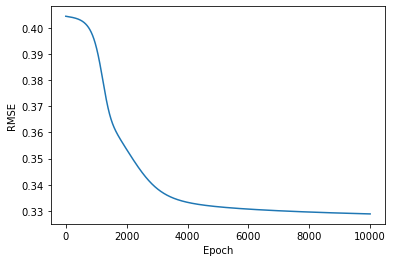

In [104]:
plt.plot(rmses)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

In [105]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

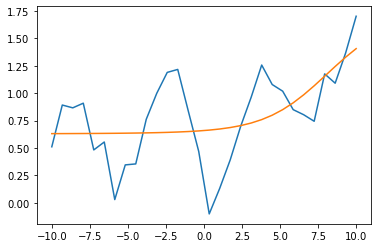

In [106]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

[[0]
 [0]]
[[0]
 [0]
 [0]]
[[2.17656825e-03]
 [4.79650138e-05]]
[[-5.77315973e-17]
 [ 2.17656825e-03]
 [ 4.79650138e-05]]
[[4.34773192e-03]
 [9.57157579e-05]]
[[3.25626122e-05]
 [4.34773192e-03]
 [9.57157579e-05]]
[[0.00651479]
 [0.00014327]]
[[9.43466986e-05]
 [6.51478770e-03]
 [1.43270420e-04]]
[[0.00867898]
 [0.00019065]]
[[0.00018236]
 [0.00867898]
 [0.00019065]]
[[0.0108415 ]
 [0.00023785]]
[[0.00029392]
 [0.0108415 ]
 [0.00023785]]
[[0.01300349]
 [0.00028491]]
[[0.00042662]
 [0.01300349]
 [0.00028491]]
[[0.01516608]
 [0.00033182]]
[[0.00057831]
 [0.01516608]
 [0.00033182]]
[[0.01733033]
 [0.0003786 ]]
[[0.00074708]
 [0.01733033]
 [0.0003786 ]]
[[0.0194973 ]
 [0.00042525]]
[[0.00093119]
 [0.0194973 ]
 [0.00042525]]
[[0.021668  ]
 [0.00047179]]
[[0.0011291 ]
 [0.021668  ]
 [0.00047179]]
[[0.02384343]
 [0.00051821]]
[[0.00133944]
 [0.02384343]
 [0.00051821]]
[[0.02602456]
 [0.00056452]]
[[0.00156097]
 [0.02602456]
 [0.00056452]]
[[0.02821235]
 [0.00061073]]
[[0.00179259]
 [0.0282123

 [0.00410587]]
[[0.97145427]
 [0.00409308]]
[[0.37916493]
 [0.97145427]
 [0.00409308]]
[[0.97247359]
 [0.00408038]]
[[0.38184024]
 [0.97247359]
 [0.00408038]]
[[0.97349074]
 [0.00406777]]
[[0.38450015]
 [0.97349074]
 [0.00406777]]
[[0.97450575]
 [0.00405524]]
[[0.38714462]
 [0.97450575]
 [0.00405524]]
[[0.97551863]
 [0.0040428 ]]
[[0.38977361]
 [0.97551863]
 [0.0040428 ]]
[[0.97652941]
 [0.00403046]]
[[0.39238708]
 [0.97652941]
 [0.00403046]]
[[0.9775381]
 [0.0040182]]
[[0.39498501]
 [0.9775381 ]
 [0.0040182 ]]
[[0.97854471]
 [0.00400603]]
[[0.39756737]
 [0.97854471]
 [0.00400603]]
[[0.97954925]
 [0.00399395]]
[[0.40013415]
 [0.97954925]
 [0.00399395]]
[[0.98055172]
 [0.00398196]]
[[0.40268534]
 [0.98055172]
 [0.00398196]]
[[0.98155213]
 [0.00397007]]
[[0.40522093]
 [0.98155213]
 [0.00397007]]
[[0.98255048]
 [0.00395826]]
[[0.40774091]
 [0.98255048]
 [0.00395826]]
[[0.98354677]
 [0.00394654]]
[[0.4102453 ]
 [0.98354677]
 [0.00394654]]
[[0.984541  ]
 [0.00393492]]
[[0.41273411]
 [0.9845

 [0.00286642]]
[[1.16334492]
 [0.00286501]]
[[0.73009064]
 [1.16334492]
 [0.00286501]]
[[1.16405949]
 [0.00286361]]
[[0.73102529]
 [1.16405949]
 [0.00286361]]
[[1.16477364]
 [0.00286222]]
[[0.73195803]
 [1.16477364]
 [0.00286222]]
[[1.16548737]
 [0.00286084]]
[[0.73288888]
 [1.16548737]
 [0.00286084]]
[[1.16620068]
 [0.00285948]]
[[0.73381785]
 [1.16620068]
 [0.00285948]]
[[1.16691357]
 [0.00285812]]
[[0.73474494]
 [1.16691357]
 [0.00285812]]
[[1.16762604]
 [0.00285677]]
[[0.73567018]
 [1.16762604]
 [0.00285677]]
[[1.16833809]
 [0.00285544]]
[[0.73659358]
 [1.16833809]
 [0.00285544]]
[[1.16904973]
 [0.00285411]]
[[0.73751514]
 [1.16904973]
 [0.00285411]]
[[1.16976094]
 [0.0028528 ]]
[[0.73843488]
 [1.16976094]
 [0.0028528 ]]
[[1.17047173]
 [0.0028515 ]]
[[0.73935281]
 [1.17047173]
 [0.0028515 ]]
[[1.17118211]
 [0.0028502 ]]
[[0.74026894]
 [1.17118211]
 [0.0028502 ]]
[[1.17189206]
 [0.00284892]]
[[0.74118329]
 [1.17189206]
 [0.00284892]]
[[1.17260159]
 [0.00284764]]
[[0.74209587]
 [1.17

 [0.00268916]]
[[1.31359788]
 [0.00268865]]
[[0.90775201]
 [1.31359788]
 [0.00268865]]
[[1.31420248]
 [0.00268814]]
[[0.90841969]
 [1.31420248]
 [0.00268814]]
[[1.31480657]
 [0.00268763]]
[[0.90908657]
 [1.31480657]
 [0.00268763]]
[[1.31541015]
 [0.00268713]]
[[0.90975266]
 [1.31541015]
 [0.00268713]]
[[1.31601322]
 [0.00268662]]
[[0.91041796]
 [1.31601322]
 [0.00268662]]
[[1.31661577]
 [0.00268611]]
[[0.91108247]
 [1.31661577]
 [0.00268611]]
[[1.31721781]
 [0.00268561]]
[[0.9117462 ]
 [1.31721781]
 [0.00268561]]
[[1.31781935]
 [0.0026851 ]]
[[0.91240914]
 [1.31781935]
 [0.0026851 ]]
[[1.31842037]
 [0.0026846 ]]
[[0.91307129]
 [1.31842037]
 [0.0026846 ]]
[[1.31902088]
 [0.0026841 ]]
[[0.91373267]
 [1.31902088]
 [0.0026841 ]]
[[1.31962088]
 [0.00268359]]
[[0.91439326]
 [1.31962088]
 [0.00268359]]
[[1.32022037]
 [0.00268309]]
[[0.91505308]
 [1.32022037]
 [0.00268309]]
[[1.32081935]
 [0.00268259]]
[[0.91571212]
 [1.32081935]
 [0.00268259]]
[[1.32141782]
 [0.00268209]]
[[0.91637039]
 [1.32

 [0.00262227]]
[[0.99252954]
 [1.39179616]
 [0.00262227]]
[[1.39233397]
 [0.00262179]]
[[0.99310349]
 [1.39233397]
 [0.00262179]]
[[1.39287133]
 [0.00262132]]
[[0.99367686]
 [1.39287133]
 [0.00262132]]
[[1.39340824]
 [0.00262084]]
[[0.99424963]
 [1.39340824]
 [0.00262084]]
[[1.39394469]
 [0.00262036]]
[[0.99482182]
 [1.39394469]
 [0.00262036]]
[[1.39448068]
 [0.00261989]]
[[0.99539343]
 [1.39448068]
 [0.00261989]]
[[1.39501623]
 [0.00261941]]
[[0.99596445]
 [1.39501623]
 [0.00261941]]
[[1.39555131]
 [0.00261894]]
[[0.99653488]
 [1.39555131]
 [0.00261894]]
[[1.39608595]
 [0.00261846]]
[[0.99710474]
 [1.39608595]
 [0.00261846]]
[[1.39662014]
 [0.00261798]]
[[0.99767402]
 [1.39662014]
 [0.00261798]]
[[1.39715387]
 [0.00261751]]
[[0.99824272]
 [1.39715387]
 [0.00261751]]
[[1.39768716]
 [0.00261703]]
[[0.99881083]
 [1.39768716]
 [0.00261703]]
[[1.39821999]
 [0.00261655]]
[[0.99937838]
 [1.39821999]
 [0.00261655]]
[[1.39875238]
 [0.00261608]]
[[0.99994535]
 [1.39875238]
 [0.00261608]]
[[1.39

[[1.08882297]
 [1.4831745 ]
 [0.00253343]]
[[1.48363794]
 [0.00253293]]
[[1.08930612]
 [1.48363794]
 [0.00253293]]
[[1.48410102]
 [0.00253243]]
[[1.08978886]
 [1.48410102]
 [0.00253243]]
[[1.48456374]
 [0.00253193]]
[[1.09027118]
 [1.48456374]
 [0.00253193]]
[[1.48502611]
 [0.00253143]]
[[1.09075308]
 [1.48502611]
 [0.00253143]]
[[1.48548812]
 [0.00253094]]
[[1.09123457]
 [1.48548812]
 [0.00253094]]
[[1.48594977]
 [0.00253044]]
[[1.09171565]
 [1.48594977]
 [0.00253044]]
[[1.48641107]
 [0.00252994]]
[[1.09219631]
 [1.48641107]
 [0.00252994]]
[[1.48687202]
 [0.00252944]]
[[1.09267656]
 [1.48687202]
 [0.00252944]]
[[1.4873326 ]
 [0.00252894]]
[[1.0931564 ]
 [1.4873326 ]
 [0.00252894]]
[[1.48779284]
 [0.00252844]]
[[1.09363582]
 [1.48779284]
 [0.00252844]]
[[1.48825272]
 [0.00252794]]
[[1.09411484]
 [1.48825272]
 [0.00252794]]
[[1.48871225]
 [0.00252744]]
[[1.09459345]
 [1.48871225]
 [0.00252744]]
[[1.48917142]
 [0.00252694]]
[[1.09507165]
 [1.48917142]
 [0.00252694]]
[[1.48963025]
 [0.002

 [0.00241199]]
[[1.19347522]
 [1.5843974 ]
 [0.00241199]]
[[1.58478825]
 [0.00241147]]
[[1.19387642]
 [1.58478825]
 [0.00241147]]
[[1.58517884]
 [0.00241095]]
[[1.19427733]
 [1.58517884]
 [0.00241095]]
[[1.58556917]
 [0.00241044]]
[[1.19467796]
 [1.58556917]
 [0.00241044]]
[[1.58595925]
 [0.00240992]]
[[1.19507831]
 [1.58595925]
 [0.00240992]]
[[1.58634907]
 [0.0024094 ]]
[[1.19547837]
 [1.58634907]
 [0.0024094 ]]
[[1.58673863]
 [0.00240888]]
[[1.19587816]
 [1.58673863]
 [0.00240888]]
[[1.58712794]
 [0.00240836]]
[[1.19627766]
 [1.58712794]
 [0.00240836]]
[[1.58751699]
 [0.00240785]]
[[1.19667688]
 [1.58751699]
 [0.00240785]]
[[1.58790579]
 [0.00240733]]
[[1.19707582]
 [1.58790579]
 [0.00240733]]
[[1.58829433]
 [0.00240681]]
[[1.19747448]
 [1.58829433]
 [0.00240681]]
[[1.58868262]
 [0.00240629]]
[[1.19787287]
 [1.58868262]
 [0.00240629]]
[[1.58907065]
 [0.00240578]]
[[1.19827097]
 [1.58907065]
 [0.00240578]]
[[1.58945843]
 [0.00240526]]
[[1.19866879]
 [1.58945843]
 [0.00240526]]
[[1.58

 [0.00231547]]
[[1.26398176]
 [1.65334664]
 [0.00231547]]
[[1.65369471]
 [0.00231496]]
[[1.26433643]
 [1.65369471]
 [0.00231496]]
[[1.65404257]
 [0.00231445]]
[[1.26469088]
 [1.65404257]
 [0.00231445]]
[[1.65439023]
 [0.00231394]]
[[1.26504512]
 [1.65439023]
 [0.00231394]]
[[1.65473769]
 [0.00231343]]
[[1.26539914]
 [1.65473769]
 [0.00231343]]
[[1.65508495]
 [0.00231292]]
[[1.26575294]
 [1.65508495]
 [0.00231292]]
[[1.65543201]
 [0.00231241]]
[[1.26610653]
 [1.65543201]
 [0.00231241]]
[[1.65577886]
 [0.00231189]]
[[1.2664599 ]
 [1.65577886]
 [0.00231189]]
[[1.65612552]
 [0.00231138]]
[[1.26681305]
 [1.65612552]
 [0.00231138]]
[[1.65647197]
 [0.00231087]]
[[1.26716598]
 [1.65647197]
 [0.00231087]]
[[1.65681823]
 [0.00231036]]
[[1.26751871]
 [1.65681823]
 [0.00231036]]
[[1.65716428]
 [0.00230985]]
[[1.26787121]
 [1.65716428]
 [0.00230985]]
[[1.65751013]
 [0.00230934]]
[[1.2682235 ]
 [1.65751013]
 [0.00230934]]
[[1.65785578]
 [0.00230883]]
[[1.26857558]
 [1.65785578]
 [0.00230883]]
[[1.65

 [0.00222758]]
[[1.71169553]
 [0.00222709]]
[[1.32328496]
 [1.71169553]
 [0.00222709]]
[[1.71201145]
 [0.0022266 ]]
[[1.32360525]
 [1.71201145]
 [0.0022266 ]]
[[1.71232721]
 [0.00222611]]
[[1.32392538]
 [1.71232721]
 [0.00222611]]
[[1.7126428 ]
 [0.00222562]]
[[1.32424532]
 [1.7126428 ]
 [0.00222562]]
[[1.71295823]
 [0.00222513]]
[[1.3245651 ]
 [1.71295823]
 [0.00222513]]
[[1.7132735 ]
 [0.00222464]]
[[1.3248847 ]
 [1.7132735 ]
 [0.00222464]]
[[1.7135886 ]
 [0.00222415]]
[[1.32520412]
 [1.7135886 ]
 [0.00222415]]
[[1.71390354]
 [0.00222366]]
[[1.32552338]
 [1.71390354]
 [0.00222366]]
[[1.71421832]
 [0.00222317]]
[[1.32584245]
 [1.71421832]
 [0.00222317]]
[[1.71453293]
 [0.00222268]]
[[1.32616136]
 [1.71453293]
 [0.00222268]]
[[1.71484738]
 [0.00222219]]
[[1.32648009]
 [1.71484738]
 [0.00222219]]
[[1.71516167]
 [0.0022217 ]]
[[1.32679865]
 [1.71516167]
 [0.0022217 ]]
[[1.71547579]
 [0.00222121]]
[[1.32711704]
 [1.71547579]
 [0.00222121]]
[[1.71578976]
 [0.00222072]]
[[1.32743525]
 [1.71

 [0.00216705]]
[[1.75026481]
 [0.00216658]]
[[1.36233027]
 [1.75026481]
 [0.00216658]]
[[1.75056139]
 [0.00216611]]
[[1.36263007]
 [1.75056139]
 [0.00216611]]
[[1.75085783]
 [0.00216564]]
[[1.36292972]
 [1.75085783]
 [0.00216564]]
[[1.75115412]
 [0.00216517]]
[[1.36322922]
 [1.75115412]
 [0.00216517]]
[[1.75145027]
 [0.0021647 ]]
[[1.36352857]
 [1.75145027]
 [0.0021647 ]]
[[1.75174628]
 [0.00216424]]
[[1.36382777]
 [1.75174628]
 [0.00216424]]
[[1.75204215]
 [0.00216377]]
[[1.36412681]
 [1.75204215]
 [0.00216377]]
[[1.75233787]
 [0.0021633 ]]
[[1.36442571]
 [1.75233787]
 [0.0021633 ]]
[[1.75263345]
 [0.00216283]]
[[1.36472446]
 [1.75263345]
 [0.00216283]]
[[1.75292889]
 [0.00216237]]
[[1.36502305]
 [1.75292889]
 [0.00216237]]
[[1.75322419]
 [0.0021619 ]]
[[1.3653215 ]
 [1.75322419]
 [0.0021619 ]]
[[1.75351935]
 [0.00216143]]
[[1.36561979]
 [1.75351935]
 [0.00216143]]
[[1.75381436]
 [0.00216097]]
[[1.36591794]
 [1.75381436]
 [0.00216097]]
[[1.75410924]
 [0.0021605 ]]
[[1.36621594]
 [1.75

[[1.78683369]
 [0.00210868]]
[[1.39924801]
 [1.78683369]
 [0.00210868]]
[[1.78711323]
 [0.00210824]]
[[1.39952986]
 [1.78711323]
 [0.00210824]]
[[1.78739265]
 [0.0021078 ]]
[[1.39981157]
 [1.78739265]
 [0.0021078 ]]
[[1.78767195]
 [0.00210736]]
[[1.40009316]
 [1.78767195]
 [0.00210736]]
[[1.78795112]
 [0.00210692]]
[[1.40037461]
 [1.78795112]
 [0.00210692]]
[[1.78823016]
 [0.00210648]]
[[1.40065593]
 [1.78823016]
 [0.00210648]]
[[1.78850908]
 [0.00210604]]
[[1.40093711]
 [1.78850908]
 [0.00210604]]
[[1.78878787]
 [0.00210559]]
[[1.40121817]
 [1.78878787]
 [0.00210559]]
[[1.78906654]
 [0.00210515]]
[[1.40149909]
 [1.78906654]
 [0.00210515]]
[[1.78934509]
 [0.00210471]]
[[1.40177989]
 [1.78934509]
 [0.00210471]]
[[1.78962351]
 [0.00210427]]
[[1.40206055]
 [1.78962351]
 [0.00210427]]
[[1.7899018 ]
 [0.00210383]]
[[1.40234108]
 [1.7899018 ]
 [0.00210383]]
[[1.79017997]
 [0.00210339]]
[[1.40262149]
 [1.79017997]
 [0.00210339]]
[[1.79045802]
 [0.00210296]]
[[1.40290176]
 [1.79045802]
 [0.002

[[1.82690375]
 [0.00204584]]
[[1.43959349]
 [1.82690375]
 [0.00204584]]
[[1.82716598]
 [0.00204544]]
[[1.43985718]
 [1.82716598]
 [0.00204544]]
[[1.82742811]
 [0.00204503]]
[[1.44012075]
 [1.82742811]
 [0.00204503]]
[[1.82769013]
 [0.00204463]]
[[1.44038421]
 [1.82769013]
 [0.00204463]]
[[1.82795204]
 [0.00204422]]
[[1.44064755]
 [1.82795204]
 [0.00204422]]
[[1.82821385]
 [0.00204382]]
[[1.44091078]
 [1.82821385]
 [0.00204382]]
[[1.82847554]
 [0.00204341]]
[[1.4411739 ]
 [1.82847554]
 [0.00204341]]
[[1.82873713]
 [0.00204301]]
[[1.44143691]
 [1.82873713]
 [0.00204301]]
[[1.82899861]
 [0.0020426 ]]
[[1.4416998 ]
 [1.82899861]
 [0.0020426 ]]
[[1.82925998]
 [0.0020422 ]]
[[1.44196257]
 [1.82925998]
 [0.0020422 ]]
[[1.82952124]
 [0.00204179]]
[[1.44222524]
 [1.82952124]
 [0.00204179]]
[[1.82978239]
 [0.00204139]]
[[1.44248779]
 [1.82978239]
 [0.00204139]]
[[1.83004344]
 [0.00204099]]
[[1.44275023]
 [1.83004344]
 [0.00204099]]
[[1.83030438]
 [0.00204058]]
[[1.44301256]
 [1.83030438]
 [0.002

 [0.00199674]]
[[1.47195467]
 [1.85912045]
 [0.00199674]]
[[1.85936973]
 [0.00199637]]
[[1.47220481]
 [1.85936973]
 [0.00199637]]
[[1.85961892]
 [0.001996  ]]
[[1.47245485]
 [1.85961892]
 [0.001996  ]]
[[1.859868  ]
 [0.00199563]]
[[1.47270479]
 [1.859868  ]
 [0.00199563]]
[[1.860117  ]
 [0.00199526]]
[[1.47295463]
 [1.860117  ]
 [0.00199526]]
[[1.86036589]
 [0.00199488]]
[[1.47320436]
 [1.86036589]
 [0.00199488]]
[[1.86061469]
 [0.00199451]]
[[1.47345399]
 [1.86061469]
 [0.00199451]]
[[1.86086339]
 [0.00199414]]
[[1.47370353]
 [1.86086339]
 [0.00199414]]
[[1.861112  ]
 [0.00199377]]
[[1.47395296]
 [1.861112  ]
 [0.00199377]]
[[1.8613605]
 [0.0019934]]
[[1.47420229]
 [1.8613605 ]
 [0.0019934 ]]
[[1.86160892]
 [0.00199303]]
[[1.47445152]
 [1.86160892]
 [0.00199303]]
[[1.86185723]
 [0.00199266]]
[[1.47470066]
 [1.86185723]
 [0.00199266]]
[[1.86210545]
 [0.00199229]]
[[1.47494969]
 [1.86210545]
 [0.00199229]]
[[1.86235357]
 [0.00199192]]
[[1.47519862]
 [1.86235357]
 [0.00199192]]
[[1.8626

 [0.0019362 ]]
[[1.90133802]
 [0.00193588]]
[[1.51426181]
 [1.90133802]
 [0.00193588]]
[[1.90157152]
 [0.00193556]]
[[1.5144955 ]
 [1.90157152]
 [0.00193556]]
[[1.90180494]
 [0.00193523]]
[[1.5147291 ]
 [1.90180494]
 [0.00193523]]
[[1.90203828]
 [0.00193491]]
[[1.51496262]
 [1.90203828]
 [0.00193491]]
[[1.90227153]
 [0.00193459]]
[[1.51519605]
 [1.90227153]
 [0.00193459]]
[[1.9025047 ]
 [0.00193427]]
[[1.51542939]
 [1.9025047 ]
 [0.00193427]]
[[1.90273779]
 [0.00193395]]
[[1.51566265]
 [1.90273779]
 [0.00193395]]
[[1.90297079]
 [0.00193363]]
[[1.51589582]
 [1.90297079]
 [0.00193363]]
[[1.90320371]
 [0.00193331]]
[[1.5161289 ]
 [1.90320371]
 [0.00193331]]
[[1.90343655]
 [0.00193299]]
[[1.51636189]
 [1.90343655]
 [0.00193299]]
[[1.9036693 ]
 [0.00193267]]
[[1.5165948 ]
 [1.9036693 ]
 [0.00193267]]
[[1.90390197]
 [0.00193235]]
[[1.51682763]
 [1.90390197]
 [0.00193235]]
[[1.90413456]
 [0.00193203]]
[[1.51706036]
 [1.90413456]
 [0.00193203]]
[[1.90436707]
 [0.00193171]]
[[1.51729301]
 [1.90

 [1.88679980e-03]]
[[1.55169280e+00]
 [1.93878171e+00]
 [1.88679980e-03]]
[[1.93900227e+00]
 [1.88652778e-03]]
[[1.55191303e+00]
 [1.93900227e+00]
 [1.88652778e-03]]
[[1.93922276e+00]
 [1.88625607e-03]]
[[1.55213319e+00]
 [1.93922276e+00]
 [1.88625607e-03]]
[[1.93944318e+00]
 [1.88598467e-03]]
[[1.55235327e+00]
 [1.93944318e+00]
 [1.88598467e-03]]
[[1.93966352e+00]
 [1.88571358e-03]]
[[1.55257327e+00]
 [1.93966352e+00]
 [1.88571358e-03]]
[[1.93988378e+00]
 [1.88544280e-03]]
[[1.55279320e+00]
 [1.93988378e+00]
 [1.88544280e-03]]
[[1.94010398e+00]
 [1.88517233e-03]]
[[1.55301305e+00]
 [1.94010398e+00]
 [1.88517233e-03]]
[[1.94032410e+00]
 [1.88490217e-03]]
[[1.55323283e+00]
 [1.94032410e+00]
 [1.88490217e-03]]
[[1.94054415e+00]
 [1.88463232e-03]]
[[1.55345253e+00]
 [1.94054415e+00]
 [1.88463232e-03]]
[[1.94076412e+00]
 [1.88436278e-03]]
[[1.55367215e+00]
 [1.94076412e+00]
 [1.88436278e-03]]
[[1.94098402e+00]
 [1.88409356e-03]]
[[1.55389170e+00]
 [1.94098402e+00]
 [1.88409356e-03]]
[[1.94

 [1.85313713e-03]]
[[1.96791441e+00]
 [1.85290720e-03]]
[[1.58075673e+00]
 [1.96791441e+00]
 [1.85290720e-03]]
[[1.96812554e+00]
 [1.85267759e-03]]
[[1.58096716e+00]
 [1.96812554e+00]
 [1.85267759e-03]]
[[1.96833659e+00]
 [1.85244829e-03]]
[[1.58117753e+00]
 [1.96833659e+00]
 [1.85244829e-03]]
[[1.96854758e+00]
 [1.85221931e-03]]
[[1.58138783e+00]
 [1.96854758e+00]
 [1.85221931e-03]]
[[1.96875850e+00]
 [1.85199065e-03]]
[[1.58159806e+00]
 [1.96875850e+00]
 [1.85199065e-03]]
[[1.96896936e+00]
 [1.85176230e-03]]
[[1.58180822e+00]
 [1.96896936e+00]
 [1.85176230e-03]]
[[1.96918015e+00]
 [1.85153428e-03]]
[[1.58201831e+00]
 [1.96918015e+00]
 [1.85153428e-03]]
[[1.96939087e+00]
 [1.85130657e-03]]
[[1.58222834e+00]
 [1.96939087e+00]
 [1.85130657e-03]]
[[1.96960153e+00]
 [1.85107918e-03]]
[[1.58243829e+00]
 [1.96960153e+00]
 [1.85107918e-03]]
[[1.96981212e+00]
 [1.85085210e-03]]
[[1.58264818e+00]
 [1.96981212e+00]
 [1.85085210e-03]]
[[1.97002265e+00]
 [1.85062535e-03]]
[[1.58285800e+00]
 [1.97

 [1.82629959e-03]]
[[1.60694677e+00]
 [1.99421043e+00]
 [1.82629959e-03]]
[[1.99441348e+00]
 [1.82611060e-03]]
[[1.60714883e+00]
 [1.99441348e+00]
 [1.82611060e-03]]
[[1.99461646e+00]
 [1.82592193e-03]]
[[1.60735084e+00]
 [1.99461646e+00]
 [1.82592193e-03]]
[[1.99481939e+00]
 [1.82573359e-03]]
[[1.60755278e+00]
 [1.99481939e+00]
 [1.82573359e-03]]
[[1.99502225e+00]
 [1.82554556e-03]]
[[1.60775465e+00]
 [1.99502225e+00]
 [1.82554556e-03]]
[[1.99522505e+00]
 [1.82535786e-03]]
[[1.60795647e+00]
 [1.99522505e+00]
 [1.82535786e-03]]
[[1.99542780e+00]
 [1.82517048e-03]]
[[1.60815822e+00]
 [1.99542780e+00]
 [1.82517048e-03]]
[[1.99563048e+00]
 [1.82498342e-03]]
[[1.60835990e+00]
 [1.99563048e+00]
 [1.82498342e-03]]
[[1.99583310e+00]
 [1.82479669e-03]]
[[1.60856153e+00]
 [1.99583310e+00]
 [1.82479669e-03]]
[[1.99603566e+00]
 [1.82461027e-03]]
[[1.60876309e+00]
 [1.99603566e+00]
 [1.82461027e-03]]
[[1.99623816e+00]
 [1.82442418e-03]]
[[1.60896459e+00]
 [1.99623816e+00]
 [1.82442418e-03]]
[[1.99

[[2.04732725e+00]
 [1.78682362e-03]]
[[1.65972261e+00]
 [2.04732725e+00]
 [1.78682362e-03]]
[[2.04751516e+00]
 [1.78672282e-03]]
[[1.65990901e+00]
 [2.04751516e+00]
 [1.78672282e-03]]
[[2.04770302e+00]
 [1.78662235e-03]]
[[1.66009536e+00]
 [2.04770302e+00]
 [1.78662235e-03]]
[[2.04789083e+00]
 [1.78652221e-03]]
[[1.66028166e+00]
 [2.04789083e+00]
 [1.78652221e-03]]
[[2.04807859e+00]
 [1.78642239e-03]]
[[1.66046791e+00]
 [2.04807859e+00]
 [1.78642239e-03]]
[[2.0482663e+00]
 [1.7863229e-03]]
[[1.6606541e+00]
 [2.0482663e+00]
 [1.7863229e-03]]
[[2.04845396e+00]
 [1.78622373e-03]]
[[1.66084024e+00]
 [2.04845396e+00]
 [1.78622373e-03]]
[[2.04864156e+00]
 [1.78612489e-03]]
[[1.66102633e+00]
 [2.04864156e+00]
 [1.78612489e-03]]
[[2.04882912e+00]
 [1.78602637e-03]]
[[1.66121237e+00]
 [2.04882912e+00]
 [1.78602637e-03]]
[[2.04901663e+00]
 [1.78592818e-03]]
[[1.66139835e+00]
 [2.04901663e+00]
 [1.78592818e-03]]
[[2.04920408e+00]
 [1.78583032e-03]]
[[1.66158428e+00]
 [2.04920408e+00]
 [1.78583032

[[2.08232968e+00]
 [1.77347326e-03]]
[[1.69440695e+00]
 [2.08232968e+00]
 [1.77347326e-03]]
[[2.08250841e+00]
 [1.77343455e-03]]
[[1.69458386e+00]
 [2.08250841e+00]
 [1.77343455e-03]]
[[2.08268710e+00]
 [1.77339617e-03]]
[[1.69476073e+00]
 [2.08268710e+00]
 [1.77339617e-03]]
[[2.08286574e+00]
 [1.77335810e-03]]
[[1.69493756e+00]
 [2.08286574e+00]
 [1.77335810e-03]]
[[2.08304434e+00]
 [1.77332037e-03]]
[[1.69511433e+00]
 [2.08304434e+00]
 [1.77332037e-03]]
[[2.08322289e+00]
 [1.77328295e-03]]
[[1.69529106e+00]
 [2.08322289e+00]
 [1.77328295e-03]]
[[2.08340140e+00]
 [1.77324586e-03]]
[[1.69546774e+00]
 [2.08340140e+00]
 [1.77324586e-03]]
[[2.08357986e+00]
 [1.77320910e-03]]
[[1.69564438e+00]
 [2.08357986e+00]
 [1.77320910e-03]]
[[2.08375827e+00]
 [1.77317266e-03]]
[[1.69582097e+00]
 [2.08375827e+00]
 [1.77317266e-03]]
[[2.08393664e+00]
 [1.77313654e-03]]
[[1.69599751e+00]
 [2.08393664e+00]
 [1.77313654e-03]]
[[2.08411497e+00]
 [1.77310075e-03]]
[[1.69617401e+00]
 [2.08411497e+00]
 [1.773

 [1.77147816e-03]]
[[1.72315314e+00]
 [2.11139726e+00]
 [1.77147816e-03]]
[[2.11156881e+00]
 [1.77149309e-03]]
[[1.72332263e+00]
 [2.11156881e+00]
 [1.77149309e-03]]
[[2.11174032e+00]
 [1.77150833e-03]]
[[1.72349208e+00]
 [2.11174032e+00]
 [1.77150833e-03]]
[[2.11191179e+00]
 [1.77152390e-03]]
[[1.72366149e+00]
 [2.11191179e+00]
 [1.77152390e-03]]
[[2.11208321e+00]
 [1.77153979e-03]]
[[1.72383086e+00]
 [2.11208321e+00]
 [1.77153979e-03]]
[[2.11225459e+00]
 [1.77155600e-03]]
[[1.72400019e+00]
 [2.11225459e+00]
 [1.77155600e-03]]
[[2.11242594e+00]
 [1.77157253e-03]]
[[1.72416947e+00]
 [2.11242594e+00]
 [1.77157253e-03]]
[[2.11259724e+00]
 [1.77158939e-03]]
[[1.72433871e+00]
 [2.11259724e+00]
 [1.77158939e-03]]
[[2.11276850e+00]
 [1.77160656e-03]]
[[1.72450791e+00]
 [2.11276850e+00]
 [1.77160656e-03]]
[[2.11293971e+00]
 [1.77162406e-03]]
[[1.72467706e+00]
 [2.11293971e+00]
 [1.77162406e-03]]
[[2.11311089e+00]
 [1.77164188e-03]]
[[1.72484617e+00]
 [2.11311089e+00]
 [1.77164188e-03]]
[[2.11

 [1.78180325e-03]]
[[1.75816814e+00]
 [2.14687640e+00]
 [1.78180325e-03]]
[[2.14703967e+00]
 [1.78188588e-03]]
[[1.75832910e+00]
 [2.14703967e+00]
 [1.78188588e-03]]
[[2.14720291e+00]
 [1.78196882e-03]]
[[1.75849002e+00]
 [2.14720291e+00]
 [1.78196882e-03]]
[[2.14736612e+00]
 [1.78205209e-03]]
[[1.75865090e+00]
 [2.14736612e+00]
 [1.78205209e-03]]
[[2.14752929e+00]
 [1.78213567e-03]]
[[1.75881174e+00]
 [2.14752929e+00]
 [1.78213567e-03]]
[[2.14769242e+00]
 [1.78221956e-03]]
[[1.75897255e+00]
 [2.14769242e+00]
 [1.78221956e-03]]
[[2.14785551e+00]
 [1.78230378e-03]]
[[1.75913331e+00]
 [2.14785551e+00]
 [1.78230378e-03]]
[[2.14801857e+00]
 [1.78238831e-03]]
[[1.75929404e+00]
 [2.14801857e+00]
 [1.78238831e-03]]
[[2.14818159e+00]
 [1.78247315e-03]]
[[1.75945473e+00]
 [2.14818159e+00]
 [1.78247315e-03]]
[[2.14834457e+00]
 [1.78255832e-03]]
[[1.75961538e+00]
 [2.14834457e+00]
 [1.78255832e-03]]
[[2.14850752e+00]
 [1.78264379e-03]]
[[1.75977600e+00]
 [2.14850752e+00]
 [1.78264379e-03]]
[[2.14

 [1.80037931e-03]]
[[2.17427635e+00]
 [1.80051540e-03]]
[[1.78515426e+00]
 [2.17427635e+00]
 [1.80051540e-03]]
[[2.17443359e+00]
 [1.80065181e-03]]
[[1.78530899e+00]
 [2.17443359e+00]
 [1.80065181e-03]]
[[2.17459080e+00]
 [1.80078852e-03]]
[[1.78546367e+00]
 [2.17459080e+00]
 [1.80078852e-03]]
[[2.17474797e+00]
 [1.80092555e-03]]
[[1.78561833e+00]
 [2.17474797e+00]
 [1.80092555e-03]]
[[2.17490511e+00]
 [1.80106289e-03]]
[[1.78577295e+00]
 [2.17490511e+00]
 [1.80106289e-03]]
[[2.17506221e+00]
 [1.80120054e-03]]
[[1.78592753e+00]
 [2.17506221e+00]
 [1.80120054e-03]]
[[2.17521929e+00]
 [1.80133851e-03]]
[[1.78608208e+00]
 [2.17521929e+00]
 [1.80133851e-03]]
[[2.17537632e+00]
 [1.80147678e-03]]
[[1.78623660e+00]
 [2.17537632e+00]
 [1.80147678e-03]]
[[2.17553333e+00]
 [1.80161537e-03]]
[[1.78639108e+00]
 [2.17553333e+00]
 [1.80161537e-03]]
[[2.17569030e+00]
 [1.80175427e-03]]
[[1.78654552e+00]
 [2.17569030e+00]
 [1.80175427e-03]]
[[2.17584724e+00]
 [1.80189348e-03]]
[[1.78669993e+00]
 [2.17

[[2.20053470e+00]
 [1.82816231e-03]]
[[1.81096934e+00]
 [2.20053470e+00]
 [1.82816231e-03]]
[[2.20068642e+00]
 [1.82835132e-03]]
[[1.81111837e+00]
 [2.20068642e+00]
 [1.82835132e-03]]
[[2.20083811e+00]
 [1.82854065e-03]]
[[1.81126737e+00]
 [2.20083811e+00]
 [1.82854065e-03]]
[[2.20098978e+00]
 [1.82873028e-03]]
[[1.81141633e+00]
 [2.20098978e+00]
 [1.82873028e-03]]
[[2.20114141e+00]
 [1.82892021e-03]]
[[1.81156526e+00]
 [2.20114141e+00]
 [1.82892021e-03]]
[[2.20129300e+00]
 [1.82911045e-03]]
[[1.81171416e+00]
 [2.20129300e+00]
 [1.82911045e-03]]
[[2.20144457e+00]
 [1.82930100e-03]]
[[1.81186302e+00]
 [2.20144457e+00]
 [1.82930100e-03]]
[[2.20159611e+00]
 [1.82949186e-03]]
[[1.81201186e+00]
 [2.20159611e+00]
 [1.82949186e-03]]
[[2.20174762e+00]
 [1.82968302e-03]]
[[1.81216066e+00]
 [2.20174762e+00]
 [1.82968302e-03]]
[[2.20189909e+00]
 [1.82987449e-03]]
[[1.81230943e+00]
 [2.20189909e+00]
 [1.82987449e-03]]
[[2.20205053e+00]
 [1.83006627e-03]]
[[1.81245817e+00]
 [2.20205053e+00]
 [1.830

 [1.86856471e-03]]
[[1.83815017e+00]
 [2.22823426e+00]
 [1.86856471e-03]]
[[2.22838043e+00]
 [1.86881025e-03]]
[[1.83829346e+00]
 [2.22838043e+00]
 [1.86881025e-03]]
[[2.22852657e+00]
 [1.86905609e-03]]
[[1.83843672e+00]
 [2.22852657e+00]
 [1.86905609e-03]]
[[2.22867269e+00]
 [1.86930223e-03]]
[[1.83857995e+00]
 [2.22867269e+00]
 [1.86930223e-03]]
[[2.22881877e+00]
 [1.86954867e-03]]
[[1.83872315e+00]
 [2.22881877e+00]
 [1.86954867e-03]]
[[2.22896483e+00]
 [1.86979541e-03]]
[[1.83886632e+00]
 [2.22896483e+00]
 [1.86979541e-03]]
[[2.22911085e+00]
 [1.87004245e-03]]
[[1.83900946e+00]
 [2.22911085e+00]
 [1.87004245e-03]]
[[2.22925685e+00]
 [1.87028980e-03]]
[[1.83915258e+00]
 [2.22925685e+00]
 [1.87028980e-03]]
[[2.22940282e+00]
 [1.87053744e-03]]
[[1.83929566e+00]
 [2.22940282e+00]
 [1.87053744e-03]]
[[2.22954876e+00]
 [1.87078538e-03]]
[[1.83943871e+00]
 [2.22954876e+00]
 [1.87078538e-03]]
[[2.22969468e+00]
 [1.87103363e-03]]
[[1.83958174e+00]
 [2.22969468e+00]
 [1.87103363e-03]]
[[2.22

 [1.91757742e-03]]
[[1.86347832e+00]
 [2.25409589e+00]
 [1.91757742e-03]]
[[2.25423711e+00]
 [1.91787659e-03]]
[[1.86361649e+00]
 [2.25423711e+00]
 [1.91787659e-03]]
[[2.25437830e+00]
 [1.91817605e-03]]
[[1.86375463e+00]
 [2.25437830e+00]
 [1.91817605e-03]]
[[2.25451947e+00]
 [1.91847581e-03]]
[[1.86389275e+00]
 [2.25451947e+00]
 [1.91847581e-03]]
[[2.25466061e+00]
 [1.91877586e-03]]
[[1.86403084e+00]
 [2.25466061e+00]
 [1.91877586e-03]]
[[2.25480172e+00]
 [1.91907621e-03]]
[[1.86416890e+00]
 [2.25480172e+00]
 [1.91907621e-03]]
[[2.25494281e+00]
 [1.91937686e-03]]
[[1.86430694e+00]
 [2.25494281e+00]
 [1.91937686e-03]]
[[2.25508387e+00]
 [1.91967779e-03]]
[[1.86444494e+00]
 [2.25508387e+00]
 [1.91967779e-03]]
[[2.25522490e+00]
 [1.91997903e-03]]
[[1.86458292e+00]
 [2.25522490e+00]
 [1.91997903e-03]]
[[2.25536591e+00]
 [1.92028056e-03]]
[[1.86472088e+00]
 [2.25536591e+00]
 [1.92028056e-03]]
[[2.25550689e+00]
 [1.92058238e-03]]
[[1.86485880e+00]
 [2.25550689e+00]
 [1.92058238e-03]]
[[2.25

 [1.98145544e-03]]
[[1.88991803e+00]
 [2.28114656e+00]
 [1.98145544e-03]]
[[2.28128283e+00]
 [1.98181152e-03]]
[[1.89005108e+00]
 [2.28128283e+00]
 [1.98181152e-03]]
[[2.28141907e+00]
 [1.98216788e-03]]
[[1.89018410e+00]
 [2.28141907e+00]
 [1.98216788e-03]]
[[2.28155529e+00]
 [1.98252453e-03]]
[[1.89031709e+00]
 [2.28155529e+00]
 [1.98252453e-03]]
[[2.28169148e+00]
 [1.98288147e-03]]
[[1.89045007e+00]
 [2.28169148e+00]
 [1.98288147e-03]]
[[2.28182765e+00]
 [1.98323870e-03]]
[[1.89058301e+00]
 [2.28182765e+00]
 [1.98323870e-03]]
[[2.28196379e+00]
 [1.98359622e-03]]
[[1.89071593e+00]
 [2.28196379e+00]
 [1.98359622e-03]]
[[2.28209991e+00]
 [1.98395403e-03]]
[[1.89084883e+00]
 [2.28209991e+00]
 [1.98395403e-03]]
[[2.28223601e+00]
 [1.98431213e-03]]
[[1.89098170e+00]
 [2.28223601e+00]
 [1.98431213e-03]]
[[2.28237208e+00]
 [1.98467051e-03]]
[[1.89111454e+00]
 [2.28237208e+00]
 [1.98467051e-03]]
[[2.28250813e+00]
 [1.98502918e-03]]
[[1.89124736e+00]
 [2.28250813e+00]
 [1.98502918e-03]]
[[2.28

[[2.30251286e+00]
 [2.04167595e-03]]
[[1.91076185e+00]
 [2.30251286e+00]
 [2.04167595e-03]]
[[2.30264537e+00]
 [2.04207752e-03]]
[[1.91089100e+00]
 [2.30264537e+00]
 [2.04207752e-03]]
[[2.30277785e+00]
 [2.04247937e-03]]
[[1.91102013e+00]
 [2.30277785e+00]
 [2.04247937e-03]]
[[2.30291032e+00]
 [2.04288150e-03]]
[[1.91114924e+00]
 [2.30291032e+00]
 [2.04288150e-03]]
[[2.30304276e+00]
 [2.04328392e-03]]
[[1.91127832e+00]
 [2.30304276e+00]
 [2.04328392e-03]]
[[2.30317517e+00]
 [2.04368662e-03]]
[[1.91140738e+00]
 [2.30317517e+00]
 [2.04368662e-03]]
[[2.30330757e+00]
 [2.04408960e-03]]
[[1.91153642e+00]
 [2.30330757e+00]
 [2.04408960e-03]]
[[2.30343994e+00]
 [2.04449287e-03]]
[[1.91166543e+00]
 [2.30343994e+00]
 [2.04449287e-03]]
[[2.30357229e+00]
 [2.04489642e-03]]
[[1.91179442e+00]
 [2.30357229e+00]
 [2.04489642e-03]]
[[2.30370461e+00]
 [2.04530025e-03]]
[[1.91192339e+00]
 [2.30370461e+00]
 [2.04530025e-03]]
[[2.30383692e+00]
 [2.04570437e-03]]
[[1.91205233e+00]
 [2.30383692e+00]
 [2.045

 [2.14517591e-03]]
[[1.94085114e+00]
 [2.33342347e+00]
 [2.14517591e-03]]
[[2.33355077e+00]
 [2.14564408e-03]]
[[1.94097489e+00]
 [2.33355077e+00]
 [2.14564408e-03]]
[[2.33367805e+00]
 [2.14611253e-03]]
[[1.94109862e+00]
 [2.33367805e+00]
 [2.14611253e-03]]
[[2.33380531e+00]
 [2.14658124e-03]]
[[1.94122233e+00]
 [2.33380531e+00]
 [2.14658124e-03]]
[[2.33393255e+00]
 [2.14705024e-03]]
[[1.94134602e+00]
 [2.33393255e+00]
 [2.14705024e-03]]
[[2.33405976e+00]
 [2.14751951e-03]]
[[1.94146969e+00]
 [2.33405976e+00]
 [2.14751951e-03]]
[[2.33418696e+00]
 [2.14798906e-03]]
[[1.94159333e+00]
 [2.33418696e+00]
 [2.14798906e-03]]
[[2.33431414e+00]
 [2.14845888e-03]]
[[1.94171695e+00]
 [2.33431414e+00]
 [2.14845888e-03]]
[[2.33444129e+00]
 [2.14892898e-03]]
[[1.94184055e+00]
 [2.33444129e+00]
 [2.14892898e-03]]
[[2.33456842e+00]
 [2.14939936e-03]]
[[1.94196413e+00]
 [2.33456842e+00]
 [2.14939936e-03]]
[[2.33469554e+00]
 [2.14987001e-03]]
[[1.94208769e+00]
 [2.33469554e+00]
 [2.14987001e-03]]
[[2.33

 [2.24269779e-03]]
[[1.96482077e+00]
 [2.35810744e+00]
 [2.24269779e-03]]
[[2.35823076e+00]
 [2.24321977e-03]]
[[1.96494039e+00]
 [2.35823076e+00]
 [2.24321977e-03]]
[[2.35835407e+00]
 [2.24374203e-03]]
[[1.96505999e+00]
 [2.35835407e+00]
 [2.24374203e-03]]
[[2.35847735e+00]
 [2.24426455e-03]]
[[1.96517957e+00]
 [2.35847735e+00]
 [2.24426455e-03]]
[[2.35860062e+00]
 [2.24478734e-03]]
[[1.96529913e+00]
 [2.35860062e+00]
 [2.24478734e-03]]
[[2.35872387e+00]
 [2.24531040e-03]]
[[1.96541867e+00]
 [2.35872387e+00]
 [2.24531040e-03]]
[[2.35884709e+00]
 [2.24583373e-03]]
[[1.96553819e+00]
 [2.35884709e+00]
 [2.24583373e-03]]
[[2.35897030e+00]
 [2.24635734e-03]]
[[1.96565768e+00]
 [2.35897030e+00]
 [2.24635734e-03]]
[[2.35909349e+00]
 [2.24688121e-03]]
[[1.96577716e+00]
 [2.35909349e+00]
 [2.24688121e-03]]
[[2.35921666e+00]
 [2.24740535e-03]]
[[1.96589662e+00]
 [2.35921666e+00]
 [2.24740535e-03]]
[[2.35933981e+00]
 [2.24792976e-03]]
[[1.96601606e+00]
 [2.35933981e+00]
 [2.24792976e-03]]
[[2.35

 [2.35877707e-03]]
[[1.98962219e+00]
 [2.38370774e+00]
 [2.35877707e-03]]
[[2.38382710e+00]
 [2.35935541e-03]]
[[1.98973769e+00]
 [2.38382710e+00]
 [2.35935541e-03]]
[[2.38394645e+00]
 [2.35993402e-03]]
[[1.98985316e+00]
 [2.38394645e+00]
 [2.35993402e-03]]
[[2.38406577e+00]
 [2.36051290e-03]]
[[1.98996862e+00]
 [2.38406577e+00]
 [2.36051290e-03]]
[[2.38418508e+00]
 [2.36109204e-03]]
[[1.99008405e+00]
 [2.38418508e+00]
 [2.36109204e-03]]
[[2.38430437e+00]
 [2.36167144e-03]]
[[1.99019947e+00]
 [2.38430437e+00]
 [2.36167144e-03]]
[[2.38442364e+00]
 [2.36225111e-03]]
[[1.99031487e+00]
 [2.38442364e+00]
 [2.36225111e-03]]
[[2.38454289e+00]
 [2.36283104e-03]]
[[1.99043025e+00]
 [2.38454289e+00]
 [2.36283104e-03]]
[[2.38466213e+00]
 [2.36341124e-03]]
[[1.99054561e+00]
 [2.38466213e+00]
 [2.36341124e-03]]
[[2.38478135e+00]
 [2.36399169e-03]]
[[1.99066095e+00]
 [2.38478135e+00]
 [2.36399169e-03]]
[[2.38490054e+00]
 [2.36457242e-03]]
[[1.99077628e+00]
 [2.38490054e+00]
 [2.36457242e-03]]
[[2.38

[[2.42362538]
 [0.00257245]]
[[2.02816826]
 [2.42362538]
 [0.00257245]]
[[2.42373887]
 [0.00257312]]
[[2.02827762]
 [2.42373887]
 [0.00257312]]
[[2.42385234]
 [0.00257378]]
[[2.02838696]
 [2.42385234]
 [0.00257378]]
[[2.42396579]
 [0.00257445]]
[[2.02849628]
 [2.42396579]
 [0.00257445]]
[[2.42407923]
 [0.00257512]]
[[2.02860559]
 [2.42407923]
 [0.00257512]]
[[2.42419265]
 [0.00257579]]
[[2.02871488]
 [2.42419265]
 [0.00257579]]
[[2.42430605]
 [0.00257646]]
[[2.02882415]
 [2.42430605]
 [0.00257646]]
[[2.42441944]
 [0.00257713]]
[[2.02893341]
 [2.42441944]
 [0.00257713]]
[[2.42453282]
 [0.0025778 ]]
[[2.02904265]
 [2.42453282]
 [0.0025778 ]]
[[2.42464617]
 [0.00257846]]
[[2.02915187]
 [2.42464617]
 [0.00257846]]
[[2.42475951]
 [0.00257913]]
[[2.02926107]
 [2.42475951]
 [0.00257913]]
[[2.42487284]
 [0.0025798 ]]
[[2.02937026]
 [2.42487284]
 [0.0025798 ]]
[[2.42498615]
 [0.00258047]]
[[2.02947943]
 [2.42498615]
 [0.00258047]]
[[2.42509944]
 [0.00258114]]
[[2.02958859]
 [2.42509944]
 [0.002

[[2.45544098]
 [0.00277355]]
[[2.05877247]
 [2.45544098]
 [0.00277355]]
[[2.45555003]
 [0.00277429]]
[[2.05887718]
 [2.45555003]
 [0.00277429]]
[[2.45565906]
 [0.00277503]]
[[2.05898187]
 [2.45565906]
 [0.00277503]]
[[2.45576808]
 [0.00277577]]
[[2.05908654]
 [2.45576808]
 [0.00277577]]
[[2.45587709]
 [0.00277651]]
[[2.0591912 ]
 [2.45587709]
 [0.00277651]]
[[2.45598608]
 [0.00277725]]
[[2.05929585]
 [2.45598608]
 [0.00277725]]
[[2.45609505]
 [0.00277799]]
[[2.05940048]
 [2.45609505]
 [0.00277799]]
[[2.45620401]
 [0.00277873]]
[[2.05950509]
 [2.45620401]
 [0.00277873]]
[[2.45631296]
 [0.00277947]]
[[2.05960969]
 [2.45631296]
 [0.00277947]]
[[2.45642189]
 [0.00278021]]
[[2.05971427]
 [2.45642189]
 [0.00278021]]
[[2.4565308 ]
 [0.00278095]]
[[2.05981884]
 [2.4565308 ]
 [0.00278095]]
[[2.45663971]
 [0.0027817 ]]
[[2.05992339]
 [2.45663971]
 [0.0027817 ]]
[[2.45674859]
 [0.00278244]]
[[2.06002792]
 [2.45674859]
 [0.00278244]]
[[2.45685746]
 [0.00278318]]
[[2.06013244]
 [2.45685746]
 [0.002

[[2.47483459]
 [0.00291051]]
[[2.07737254]
 [2.47483459]
 [0.00291051]]
[[2.47494104]
 [0.00291129]]
[[2.07747451]
 [2.47494104]
 [0.00291129]]
[[2.47504746]
 [0.00291208]]
[[2.07757646]
 [2.47504746]
 [0.00291208]]
[[2.47515388]
 [0.00291286]]
[[2.0776784 ]
 [2.47515388]
 [0.00291286]]
[[2.47526028]
 [0.00291364]]
[[2.07778032]
 [2.47526028]
 [0.00291364]]
[[2.47536667]
 [0.00291443]]
[[2.07788223]
 [2.47536667]
 [0.00291443]]
[[2.47547304]
 [0.00291521]]
[[2.07798412]
 [2.47547304]
 [0.00291521]]
[[2.4755794 ]
 [0.00291599]]
[[2.078086  ]
 [2.4755794 ]
 [0.00291599]]
[[2.47568575]
 [0.00291678]]
[[2.07818787]
 [2.47568575]
 [0.00291678]]
[[2.47579208]
 [0.00291756]]
[[2.07828972]
 [2.47579208]
 [0.00291756]]
[[2.47589839]
 [0.00291835]]
[[2.07839155]
 [2.47589839]
 [0.00291835]]
[[2.4760047 ]
 [0.00291913]]
[[2.07849337]
 [2.4760047 ]
 [0.00291913]]
[[2.47611098]
 [0.00291992]]
[[2.07859518]
 [2.47611098]
 [0.00291992]]
[[2.47621726]
 [0.00292071]]
[[2.07869697]
 [2.47621726]
 [0.002

 [0.00306605]]
[[2.09678217]
 [2.4951215 ]
 [0.00306605]]
[[2.49522529]
 [0.00306688]]
[[2.09688135]
 [2.49522529]
 [0.00306688]]
[[2.49532907]
 [0.00306771]]
[[2.09698052]
 [2.49532907]
 [0.00306771]]
[[2.49543284]
 [0.00306854]]
[[2.09707966]
 [2.49543284]
 [0.00306854]]
[[2.49553659]
 [0.00306937]]
[[2.0971788 ]
 [2.49553659]
 [0.00306937]]
[[2.49564033]
 [0.0030702 ]]
[[2.09727792]
 [2.49564033]
 [0.0030702 ]]
[[2.49574406]
 [0.00307103]]
[[2.09737703]
 [2.49574406]
 [0.00307103]]
[[2.49584777]
 [0.00307186]]
[[2.09747612]
 [2.49584777]
 [0.00307186]]
[[2.49595147]
 [0.00307269]]
[[2.0975752 ]
 [2.49595147]
 [0.00307269]]
[[2.49605516]
 [0.00307352]]
[[2.09767426]
 [2.49605516]
 [0.00307352]]
[[2.49615883]
 [0.00307436]]
[[2.09777331]
 [2.49615883]
 [0.00307436]]
[[2.49626249]
 [0.00307519]]
[[2.09787235]
 [2.49626249]
 [0.00307519]]
[[2.49636614]
 [0.00307602]]
[[2.09797137]
 [2.49636614]
 [0.00307602]]
[[2.49646977]
 [0.00307685]]
[[2.09807038]
 [2.49646977]
 [0.00307685]]
[[2.49

 [0.00321645]]
[[2.11412031]
 [2.51328797]
 [0.00321645]]
[[2.51338945]
 [0.00321732]]
[[2.11421705]
 [2.51338945]
 [0.00321732]]
[[2.51349092]
 [0.0032182 ]]
[[2.11431378]
 [2.51349092]
 [0.0032182 ]]
[[2.51359238]
 [0.00321907]]
[[2.11441049]
 [2.51359238]
 [0.00321907]]
[[2.51369382]
 [0.00321994]]
[[2.11450719]
 [2.51369382]
 [0.00321994]]
[[2.51379526]
 [0.00322081]]
[[2.11460387]
 [2.51379526]
 [0.00322081]]
[[2.51389668]
 [0.00322168]]
[[2.11470054]
 [2.51389668]
 [0.00322168]]
[[2.51399808]
 [0.00322255]]
[[2.1147972 ]
 [2.51399808]
 [0.00322255]]
[[2.51409947]
 [0.00322342]]
[[2.11489385]
 [2.51409947]
 [0.00322342]]
[[2.51420086]
 [0.0032243 ]]
[[2.11499048]
 [2.51420086]
 [0.0032243 ]]
[[2.51430222]
 [0.00322517]]
[[2.11508709]
 [2.51430222]
 [0.00322517]]
[[2.51440358]
 [0.00322604]]
[[2.1151837 ]
 [2.51440358]
 [0.00322604]]
[[2.51450492]
 [0.00322692]]
[[2.11528029]
 [2.51450492]
 [0.00322692]]
[[2.51460625]
 [0.00322779]]
[[2.11537687]
 [2.51460625]
 [0.00322779]]
[[2.51

 [0.00338963]]
[[2.13263944]
 [2.53274081]
 [0.00338963]]
[[2.53283988]
 [0.00339054]]
[[2.13273363]
 [2.53283988]
 [0.00339054]]
[[2.53293894]
 [0.00339146]]
[[2.1328278 ]
 [2.53293894]
 [0.00339146]]
[[2.53303799]
 [0.00339237]]
[[2.13292196]
 [2.53303799]
 [0.00339237]]
[[2.53313702]
 [0.00339329]]
[[2.13301611]
 [2.53313702]
 [0.00339329]]
[[2.53323604]
 [0.0033942 ]]
[[2.13311025]
 [2.53323604]
 [0.0033942 ]]
[[2.53333505]
 [0.00339512]]
[[2.13320437]
 [2.53333505]
 [0.00339512]]
[[2.53343405]
 [0.00339604]]
[[2.13329848]
 [2.53343405]
 [0.00339604]]
[[2.53353303]
 [0.00339695]]
[[2.13339258]
 [2.53353303]
 [0.00339695]]
[[2.53363201]
 [0.00339787]]
[[2.13348667]
 [2.53363201]
 [0.00339787]]
[[2.53373097]
 [0.00339879]]
[[2.13358074]
 [2.53373097]
 [0.00339879]]
[[2.53382992]
 [0.0033997 ]]
[[2.1336748 ]
 [2.53382992]
 [0.0033997 ]]
[[2.53392885]
 [0.00340062]]
[[2.13376884]
 [2.53392885]
 [0.00340062]]
[[2.53402778]
 [0.00340154]]
[[2.13386288]
 [2.53402778]
 [0.00340154]]
[[2.53

[[2.55482783]
 [0.00360207]]
[[2.15360517]
 [2.55482783]
 [0.00360207]]
[[2.55492423]
 [0.00360304]]
[[2.15369653]
 [2.55492423]
 [0.00360304]]
[[2.55502062]
 [0.00360401]]
[[2.15378788]
 [2.55502062]
 [0.00360401]]
[[2.555117  ]
 [0.00360497]]
[[2.15387922]
 [2.555117  ]
 [0.00360497]]
[[2.55521337]
 [0.00360594]]
[[2.15397055]
 [2.55521337]
 [0.00360594]]
[[2.55530973]
 [0.0036069 ]]
[[2.15406186]
 [2.55530973]
 [0.0036069 ]]
[[2.55540607]
 [0.00360787]]
[[2.15415317]
 [2.55540607]
 [0.00360787]]
[[2.55550241]
 [0.00360884]]
[[2.15424445]
 [2.55550241]
 [0.00360884]]
[[2.55559873]
 [0.0036098 ]]
[[2.15433573]
 [2.55559873]
 [0.0036098 ]]
[[2.55569504]
 [0.00361077]]
[[2.154427  ]
 [2.55569504]
 [0.00361077]]
[[2.55579134]
 [0.00361174]]
[[2.15451825]
 [2.55579134]
 [0.00361174]]
[[2.55588763]
 [0.0036127 ]]
[[2.15460949]
 [2.55588763]
 [0.0036127 ]]
[[2.55598391]
 [0.00361367]]
[[2.15470072]
 [2.55598391]
 [0.00361367]]
[[2.55608018]
 [0.00361464]]
[[2.15479194]
 [2.55608018]
 [0.003

 [0.00388078]]
[[2.17872137]
 [2.58138217]
 [0.00388078]]
[[2.58147547]
 [0.0038818 ]]
[[2.17880943]
 [2.58147547]
 [0.0038818 ]]
[[2.58156875]
 [0.00388283]]
[[2.17889748]
 [2.58156875]
 [0.00388283]]
[[2.58166202]
 [0.00388385]]
[[2.17898552]
 [2.58166202]
 [0.00388385]]
[[2.58175528]
 [0.00388488]]
[[2.17907355]
 [2.58175528]
 [0.00388488]]
[[2.58184853]
 [0.00388591]]
[[2.17916157]
 [2.58184853]
 [0.00388591]]
[[2.58194177]
 [0.00388693]]
[[2.17924957]
 [2.58194177]
 [0.00388693]]
[[2.582035  ]
 [0.00388796]]
[[2.17933757]
 [2.582035  ]
 [0.00388796]]
[[2.58212822]
 [0.00388899]]
[[2.17942555]
 [2.58212822]
 [0.00388899]]
[[2.58222142]
 [0.00389001]]
[[2.17951352]
 [2.58222142]
 [0.00389001]]
[[2.58231462]
 [0.00389104]]
[[2.17960148]
 [2.58231462]
 [0.00389104]]
[[2.58240781]
 [0.00389207]]
[[2.17968942]
 [2.58240781]
 [0.00389207]]
[[2.58250098]
 [0.0038931 ]]
[[2.17977736]
 [2.58250098]
 [0.0038931 ]]
[[2.58259415]
 [0.00389412]]
[[2.17986529]
 [2.58259415]
 [0.00389412]]
[[2.58

[[2.59818677]
 [0.00407082]]
[[2.19456295]
 [2.59818677]
 [0.00407082]]
[[2.59827814]
 [0.00407189]]
[[2.19464897]
 [2.59827814]
 [0.00407189]]
[[2.59836951]
 [0.00407295]]
[[2.19473498]
 [2.59836951]
 [0.00407295]]
[[2.59846086]
 [0.00407401]]
[[2.19482098]
 [2.59846086]
 [0.00407401]]
[[2.59855221]
 [0.00407508]]
[[2.19490697]
 [2.59855221]
 [0.00407508]]
[[2.59864354]
 [0.00407614]]
[[2.19499295]
 [2.59864354]
 [0.00407614]]
[[2.59873486]
 [0.00407721]]
[[2.19507892]
 [2.59873486]
 [0.00407721]]
[[2.59882618]
 [0.00407827]]
[[2.19516488]
 [2.59882618]
 [0.00407827]]
[[2.59891748]
 [0.00407933]]
[[2.19525083]
 [2.59891748]
 [0.00407933]]
[[2.59900877]
 [0.0040804 ]]
[[2.19533676]
 [2.59900877]
 [0.0040804 ]]
[[2.59910006]
 [0.00408146]]
[[2.19542269]
 [2.59910006]
 [0.00408146]]
[[2.59919133]
 [0.00408253]]
[[2.1955086 ]
 [2.59919133]
 [0.00408253]]
[[2.59928259]
 [0.00408359]]
[[2.19559451]
 [2.59928259]
 [0.00408359]]
[[2.59937384]
 [0.00408466]]
[[2.1956804 ]
 [2.59937384]
 [0.004

[[2.61902441]
 [0.00432175]]
[[2.21414742]
 [2.61902441]
 [0.00432175]]
[[2.61911346]
 [0.00432286]]
[[2.21423097]
 [2.61911346]
 [0.00432286]]
[[2.61920249]
 [0.00432397]]
[[2.21431451]
 [2.61920249]
 [0.00432397]]
[[2.61929152]
 [0.00432508]]
[[2.21439803]
 [2.61929152]
 [0.00432508]]
[[2.61938053]
 [0.00432619]]
[[2.21448155]
 [2.61938053]
 [0.00432619]]
[[2.61946954]
 [0.0043273 ]]
[[2.21456506]
 [2.61946954]
 [0.0043273 ]]
[[2.61955854]
 [0.00432841]]
[[2.21464855]
 [2.61955854]
 [0.00432841]]
[[2.61964753]
 [0.00432952]]
[[2.21473204]
 [2.61964753]
 [0.00432952]]
[[2.6197365 ]
 [0.00433063]]
[[2.21481551]
 [2.6197365 ]
 [0.00433063]]
[[2.61982547]
 [0.00433175]]
[[2.21489898]
 [2.61982547]
 [0.00433175]]
[[2.61991443]
 [0.00433286]]
[[2.21498243]
 [2.61991443]
 [0.00433286]]
[[2.62000338]
 [0.00433397]]
[[2.21506588]
 [2.62000338]
 [0.00433397]]
[[2.62009231]
 [0.00433508]]
[[2.21514931]
 [2.62009231]
 [0.00433508]]
[[2.62018124]
 [0.00433619]]
[[2.21523273]
 [2.62018124]
 [0.004

 [0.00453945]]
[[2.23008093]
 [2.63603034]
 [0.00453945]]
[[2.63611753]
 [0.00454059]]
[[2.2301625 ]
 [2.63611753]
 [0.00454059]]
[[2.6362047 ]
 [0.00454174]]
[[2.23024406]
 [2.6362047 ]
 [0.00454174]]
[[2.63629187]
 [0.00454289]]
[[2.23032561]
 [2.63629187]
 [0.00454289]]
[[2.63637902]
 [0.00454403]]
[[2.23040715]
 [2.63637902]
 [0.00454403]]
[[2.63646617]
 [0.00454518]]
[[2.23048868]
 [2.63646617]
 [0.00454518]]
[[2.6365533 ]
 [0.00454633]]
[[2.23057019]
 [2.6365533 ]
 [0.00454633]]
[[2.63664043]
 [0.00454747]]
[[2.2306517 ]
 [2.63664043]
 [0.00454747]]
[[2.63672755]
 [0.00454862]]
[[2.2307332 ]
 [2.63672755]
 [0.00454862]]
[[2.63681465]
 [0.00454977]]
[[2.23081469]
 [2.63681465]
 [0.00454977]]
[[2.63690175]
 [0.00455092]]
[[2.23089617]
 [2.63690175]
 [0.00455092]]
[[2.63698884]
 [0.00455207]]
[[2.23097763]
 [2.63698884]
 [0.00455207]]
[[2.63707592]
 [0.00455322]]
[[2.23105909]
 [2.63707592]
 [0.00455322]]
[[2.63716299]
 [0.00455436]]
[[2.23114054]
 [2.63716299]
 [0.00455436]]
[[2.63

[[2.65037449]
 [0.00473231]]
[[2.24348508]
 [2.65037449]
 [0.00473231]]
[[2.65046013]
 [0.00473349]]
[[2.243565  ]
 [2.65046013]
 [0.00473349]]
[[2.65054576]
 [0.00473467]]
[[2.24364492]
 [2.65054576]
 [0.00473467]]
[[2.65063137]
 [0.00473585]]
[[2.24372483]
 [2.65063137]
 [0.00473585]]
[[2.65071698]
 [0.00473702]]
[[2.24380472]
 [2.65071698]
 [0.00473702]]
[[2.65080258]
 [0.0047382 ]]
[[2.24388461]
 [2.65080258]
 [0.0047382 ]]
[[2.65088817]
 [0.00473938]]
[[2.24396449]
 [2.65088817]
 [0.00473938]]
[[2.65097375]
 [0.00474056]]
[[2.24404436]
 [2.65097375]
 [0.00474056]]
[[2.65105933]
 [0.00474174]]
[[2.24412421]
 [2.65105933]
 [0.00474174]]
[[2.65114489]
 [0.00474292]]
[[2.24420406]
 [2.65114489]
 [0.00474292]]
[[2.65123044]
 [0.00474409]]
[[2.2442839 ]
 [2.65123044]
 [0.00474409]]
[[2.65131599]
 [0.00474527]]
[[2.24436373]
 [2.65131599]
 [0.00474527]]
[[2.65140152]
 [0.00474645]]
[[2.24444355]
 [2.65140152]
 [0.00474645]]
[[2.65148705]
 [0.00474763]]
[[2.24452336]
 [2.65148705]
 [0.004

 [0.0050689 ]]
[[2.26549102]
 [2.67400048]
 [0.0050689 ]]
[[2.67408361]
 [0.00507012]]
[[2.26556829]
 [2.67408361]
 [0.00507012]]
[[2.67416674]
 [0.00507135]]
[[2.26564556]
 [2.67416674]
 [0.00507135]]
[[2.67424985]
 [0.00507258]]
[[2.26572281]
 [2.67424985]
 [0.00507258]]
[[2.67433296]
 [0.0050738 ]]
[[2.26580006]
 [2.67433296]
 [0.0050738 ]]
[[2.67441606]
 [0.00507503]]
[[2.26587729]
 [2.67441606]
 [0.00507503]]
[[2.67449915]
 [0.00507626]]
[[2.26595452]
 [2.67449915]
 [0.00507626]]
[[2.67458223]
 [0.00507749]]
[[2.26603174]
 [2.67458223]
 [0.00507749]]
[[2.6746653 ]
 [0.00507871]]
[[2.26610895]
 [2.6746653 ]
 [0.00507871]]
[[2.67474836]
 [0.00507994]]
[[2.26618615]
 [2.67474836]
 [0.00507994]]
[[2.67483141]
 [0.00508117]]
[[2.26626334]
 [2.67483141]
 [0.00508117]]
[[2.67491446]
 [0.0050824 ]]
[[2.26634052]
 [2.67491446]
 [0.0050824 ]]
[[2.6749975 ]
 [0.00508363]]
[[2.26641769]
 [2.6749975 ]
 [0.00508363]]
[[2.67508052]
 [0.00508486]]
[[2.26649486]
 [2.67508052]
 [0.00508486]]
[[2.67

 [0.00532508]]
[[2.28121709]
 [2.6909438 ]
 [0.00532508]]
[[2.69102516]
 [0.00532634]]
[[2.2812925 ]
 [2.69102516]
 [0.00532634]]
[[2.69110652]
 [0.0053276 ]]
[[2.2813679 ]
 [2.69110652]
 [0.0053276 ]]
[[2.69118787]
 [0.00532886]]
[[2.2814433 ]
 [2.69118787]
 [0.00532886]]
[[2.69126921]
 [0.00533013]]
[[2.28151868]
 [2.69126921]
 [0.00533013]]
[[2.69135055]
 [0.00533139]]
[[2.28159405]
 [2.69135055]
 [0.00533139]]
[[2.69143187]
 [0.00533265]]
[[2.28166942]
 [2.69143187]
 [0.00533265]]
[[2.69151319]
 [0.00533391]]
[[2.28174478]
 [2.69151319]
 [0.00533391]]
[[2.6915945 ]
 [0.00533517]]
[[2.28182012]
 [2.6915945 ]
 [0.00533517]]
[[2.6916758 ]
 [0.00533643]]
[[2.28189546]
 [2.6916758 ]
 [0.00533643]]
[[2.69175709]
 [0.0053377 ]]
[[2.28197079]
 [2.69175709]
 [0.0053377 ]]
[[2.69183837]
 [0.00533896]]
[[2.28204611]
 [2.69183837]
 [0.00533896]]
[[2.69191965]
 [0.00534022]]
[[2.28212143]
 [2.69191965]
 [0.00534022]]
[[2.69200091]
 [0.00534148]]
[[2.28219673]
 [2.69200091]
 [0.00534148]]
[[2.69

 [0.00555452]]
[[2.29464946]
 [2.70545548]
 [0.00555452]]
[[2.70553535]
 [0.0055558 ]]
[[2.2947233 ]
 [2.70553535]
 [0.0055558 ]]
[[2.70561522]
 [0.00555709]]
[[2.29479713]
 [2.70561522]
 [0.00555709]]
[[2.70569507]
 [0.00555838]]
[[2.29487095]
 [2.70569507]
 [0.00555838]]
[[2.70577492]
 [0.00555967]]
[[2.29494476]
 [2.70577492]
 [0.00555967]]
[[2.70585476]
 [0.00556096]]
[[2.29501856]
 [2.70585476]
 [0.00556096]]
[[2.70593459]
 [0.00556225]]
[[2.29509236]
 [2.70593459]
 [0.00556225]]
[[2.70601442]
 [0.00556354]]
[[2.29516615]
 [2.70601442]
 [0.00556354]]
[[2.70609423]
 [0.00556483]]
[[2.29523993]
 [2.70609423]
 [0.00556483]]
[[2.70617404]
 [0.00556612]]
[[2.2953137 ]
 [2.70617404]
 [0.00556612]]
[[2.70625384]
 [0.00556741]]
[[2.29538746]
 [2.70625384]
 [0.00556741]]
[[2.70633363]
 [0.0055687 ]]
[[2.29546121]
 [2.70633363]
 [0.0055687 ]]
[[2.70641341]
 [0.00556999]]
[[2.29553495]
 [2.70641341]
 [0.00556999]]
[[2.70649319]
 [0.00557128]]
[[2.29560869]
 [2.70649319]
 [0.00557128]]
[[2.70

[[2.71868169]
 [0.00577177]]
[[2.30686268]
 [2.71868169]
 [0.00577177]]
[[2.71876021]
 [0.00577308]]
[[2.30693511]
 [2.71876021]
 [0.00577308]]
[[2.71883872]
 [0.0057744 ]]
[[2.30700753]
 [2.71883872]
 [0.0057744 ]]
[[2.71891723]
 [0.00577571]]
[[2.30707994]
 [2.71891723]
 [0.00577571]]
[[2.71899573]
 [0.00577702]]
[[2.30715234]
 [2.71899573]
 [0.00577702]]
[[2.71907422]
 [0.00577834]]
[[2.30722473]
 [2.71907422]
 [0.00577834]]
[[2.7191527 ]
 [0.00577965]]
[[2.30729711]
 [2.7191527 ]
 [0.00577965]]
[[2.71923118]
 [0.00578097]]
[[2.30736949]
 [2.71923118]
 [0.00578097]]
[[2.71930964]
 [0.00578228]]
[[2.30744186]
 [2.71930964]
 [0.00578228]]
[[2.7193881 ]
 [0.00578359]]
[[2.30751422]
 [2.7193881 ]
 [0.00578359]]
[[2.71946655]
 [0.00578491]]
[[2.30758657]
 [2.71946655]
 [0.00578491]]
[[2.719545  ]
 [0.00578622]]
[[2.30765891]
 [2.719545  ]
 [0.00578622]]
[[2.71962343]
 [0.00578754]]
[[2.30773125]
 [2.71962343]
 [0.00578754]]
[[2.71970186]
 [0.00578885]]
[[2.30780357]
 [2.71970186]
 [0.005

[[2.73106729]
 [0.00598232]]
[[2.3182748 ]
 [2.73106729]
 [0.00598232]]
[[2.73114455]
 [0.00598366]]
[[2.31834592]
 [2.73114455]
 [0.00598366]]
[[2.73122181]
 [0.00598499]]
[[2.31841703]
 [2.73122181]
 [0.00598499]]
[[2.73129907]
 [0.00598633]]
[[2.31848813]
 [2.73129907]
 [0.00598633]]
[[2.73137631]
 [0.00598766]]
[[2.31855923]
 [2.73137631]
 [0.00598766]]
[[2.73145355]
 [0.005989  ]]
[[2.31863032]
 [2.73145355]
 [0.005989  ]]
[[2.73153078]
 [0.00599033]]
[[2.3187014 ]
 [2.73153078]
 [0.00599033]]
[[2.731608  ]
 [0.00599167]]
[[2.31877247]
 [2.731608  ]
 [0.00599167]]
[[2.73168521]
 [0.00599301]]
[[2.31884353]
 [2.73168521]
 [0.00599301]]
[[2.73176242]
 [0.00599434]]
[[2.31891459]
 [2.73176242]
 [0.00599434]]
[[2.73183961]
 [0.00599568]]
[[2.31898564]
 [2.73183961]
 [0.00599568]]
[[2.7319168 ]
 [0.00599701]]
[[2.31905667]
 [2.7319168 ]
 [0.00599701]]
[[2.73199399]
 [0.00599835]]
[[2.31912771]
 [2.73199399]
 [0.00599835]]
[[2.73207116]
 [0.00599969]]
[[2.31919873]
 [2.73207116]
 [0.005

 [0.00622747]]
[[2.33108676]
 [2.74500256]
 [0.00622747]]
[[2.74507843]
 [0.00622883]]
[[2.33115643]
 [2.74507843]
 [0.00622883]]
[[2.74515428]
 [0.00623019]]
[[2.33122609]
 [2.74515428]
 [0.00623019]]
[[2.74523013]
 [0.00623155]]
[[2.33129574]
 [2.74523013]
 [0.00623155]]
[[2.74530598]
 [0.00623291]]
[[2.33136539]
 [2.74530598]
 [0.00623291]]
[[2.74538181]
 [0.00623427]]
[[2.33143503]
 [2.74538181]
 [0.00623427]]
[[2.74545764]
 [0.00623563]]
[[2.33150466]
 [2.74545764]
 [0.00623563]]
[[2.74553346]
 [0.00623699]]
[[2.33157428]
 [2.74553346]
 [0.00623699]]
[[2.74560927]
 [0.00623835]]
[[2.3316439 ]
 [2.74560927]
 [0.00623835]]
[[2.74568507]
 [0.00623971]]
[[2.33171351]
 [2.74568507]
 [0.00623971]]
[[2.74576087]
 [0.00624107]]
[[2.33178311]
 [2.74576087]
 [0.00624107]]
[[2.74583666]
 [0.00624243]]
[[2.3318527 ]
 [2.74583666]
 [0.00624243]]
[[2.74591244]
 [0.00624379]]
[[2.33192228]
 [2.74591244]
 [0.00624379]]
[[2.74598821]
 [0.00624515]]
[[2.33199186]
 [2.74598821]
 [0.00624515]]
[[2.74

 [0.00646017]]
[[2.34281919]
 [2.75779102]
 [0.00646017]]
[[2.75786561]
 [0.00646155]]
[[2.34288754]
 [2.75786561]
 [0.00646155]]
[[2.75794018]
 [0.00646293]]
[[2.34295589]
 [2.75794018]
 [0.00646293]]
[[2.75801475]
 [0.00646431]]
[[2.34302424]
 [2.75801475]
 [0.00646431]]
[[2.75808931]
 [0.00646569]]
[[2.34309257]
 [2.75808931]
 [0.00646569]]
[[2.75816387]
 [0.00646707]]
[[2.3431609 ]
 [2.75816387]
 [0.00646707]]
[[2.75823842]
 [0.00646845]]
[[2.34322922]
 [2.75823842]
 [0.00646845]]
[[2.75831296]
 [0.00646983]]
[[2.34329753]
 [2.75831296]
 [0.00646983]]
[[2.75838749]
 [0.00647121]]
[[2.34336583]
 [2.75838749]
 [0.00647121]]
[[2.75846201]
 [0.00647259]]
[[2.34343413]
 [2.75846201]
 [0.00647259]]
[[2.75853653]
 [0.00647397]]
[[2.34350242]
 [2.75853653]
 [0.00647397]]
[[2.75861104]
 [0.00647535]]
[[2.3435707 ]
 [2.75861104]
 [0.00647535]]
[[2.75868554]
 [0.00647673]]
[[2.34363897]
 [2.75868554]
 [0.00647673]]
[[2.75876004]
 [0.00647811]]
[[2.34370724]
 [2.75876004]
 [0.00647811]]
[[2.75

 [0.00675633]]
[[2.35720959]
 [2.77351065]
 [0.00675633]]
[[2.77358367]
 [0.00675773]]
[[2.35727635]
 [2.77358367]
 [0.00675773]]
[[2.77365668]
 [0.00675913]]
[[2.35734311]
 [2.77365668]
 [0.00675913]]
[[2.77372968]
 [0.00676053]]
[[2.35740986]
 [2.77372968]
 [0.00676053]]
[[2.77380268]
 [0.00676193]]
[[2.35747661]
 [2.77380268]
 [0.00676193]]
[[2.77387566]
 [0.00676334]]
[[2.35754335]
 [2.77387566]
 [0.00676334]]
[[2.77394864]
 [0.00676474]]
[[2.35761008]
 [2.77394864]
 [0.00676474]]
[[2.77402162]
 [0.00676614]]
[[2.3576768 ]
 [2.77402162]
 [0.00676614]]
[[2.77409458]
 [0.00676754]]
[[2.35774351]
 [2.77409458]
 [0.00676754]]
[[2.77416754]
 [0.00676894]]
[[2.35781022]
 [2.77416754]
 [0.00676894]]
[[2.77424049]
 [0.00677035]]
[[2.35787692]
 [2.77424049]
 [0.00677035]]
[[2.77431344]
 [0.00677175]]
[[2.35794361]
 [2.77431344]
 [0.00677175]]
[[2.77438637]
 [0.00677315]]
[[2.3580103 ]
 [2.77438637]
 [0.00677315]]
[[2.7744593 ]
 [0.00677456]]
[[2.35807698]
 [2.7744593 ]
 [0.00677456]]
[[2.77

[[2.78718257]
 [0.00702294]]
[[2.36969962]
 [2.78718257]
 [0.00702294]]
[[2.78725423]
 [0.00702436]]
[[2.36976503]
 [2.78725423]
 [0.00702436]]
[[2.78732588]
 [0.00702578]]
[[2.36983042]
 [2.78732588]
 [0.00702578]]
[[2.78739752]
 [0.0070272 ]]
[[2.36989581]
 [2.78739752]
 [0.0070272 ]]
[[2.78746915]
 [0.00702862]]
[[2.36996119]
 [2.78746915]
 [0.00702862]]
[[2.78754078]
 [0.00703004]]
[[2.37002657]
 [2.78754078]
 [0.00703004]]
[[2.7876124 ]
 [0.00703146]]
[[2.37009194]
 [2.7876124 ]
 [0.00703146]]
[[2.78768402]
 [0.00703288]]
[[2.3701573 ]
 [2.78768402]
 [0.00703288]]
[[2.78775563]
 [0.0070343 ]]
[[2.37022265]
 [2.78775563]
 [0.0070343 ]]
[[2.78782723]
 [0.00703572]]
[[2.370288  ]
 [2.78782723]
 [0.00703572]]
[[2.78789882]
 [0.00703714]]
[[2.37035334]
 [2.78789882]
 [0.00703714]]
[[2.7879704 ]
 [0.00703856]]
[[2.37041867]
 [2.7879704 ]
 [0.00703856]]
[[2.78804198]
 [0.00703998]]
[[2.370484  ]
 [2.78804198]
 [0.00703998]]
[[2.78811355]
 [0.0070414 ]]
[[2.37054932]
 [2.78811355]
 [0.007

 [0.0073559]]
[[2.38474957]
 [2.8036876 ]
 [0.0073559 ]]
[[2.80375762]
 [0.00735734]]
[[2.38481336]
 [2.80375762]
 [0.00735734]]
[[2.80382763]
 [0.00735878]]
[[2.38487714]
 [2.80382763]
 [0.00735878]]
[[2.80389763]
 [0.00736022]]
[[2.38494091]
 [2.80389763]
 [0.00736022]]
[[2.80396762]
 [0.00736166]]
[[2.38500467]
 [2.80396762]
 [0.00736166]]
[[2.80403761]
 [0.0073631 ]]
[[2.38506843]
 [2.80403761]
 [0.0073631 ]]
[[2.80410759]
 [0.00736453]]
[[2.38513218]
 [2.80410759]
 [0.00736453]]
[[2.80417757]
 [0.00736597]]
[[2.38519592]
 [2.80417757]
 [0.00736597]]
[[2.80424754]
 [0.00736741]]
[[2.38525966]
 [2.80424754]
 [0.00736741]]
[[2.8043175 ]
 [0.00736885]]
[[2.38532339]
 [2.8043175 ]
 [0.00736885]]
[[2.80438745]
 [0.00737029]]
[[2.38538711]
 [2.80438745]
 [0.00737029]]
[[2.8044574 ]
 [0.00737173]]
[[2.38545083]
 [2.8044574 ]
 [0.00737173]]
[[2.80452734]
 [0.00737317]]
[[2.38551454]
 [2.80452734]
 [0.00737317]]
[[2.80459727]
 [0.00737461]]
[[2.38557824]
 [2.80459727]
 [0.00737461]]
[[2.804

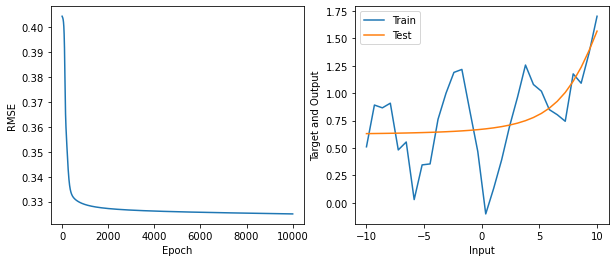

In [107]:
rmses, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 10, 5, 10000, 0.1)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rmses)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.xlabel('Input')
plt.ylabel('Target and Output')
plt.legend();

Your plots will probably differ from these results, because you start with different random weight values.

## Discussion

In this markdown cell, describe what difficulties you encountered in completing this assignment. What parts were easy for you and what parts were hard?

Given that it was a continuation of Lecture Notes 04, the assignment was rather simple. While defining each of the four necessary functions, I had to be extremely careful to determine which function accepts standardized or non-standardized inputs and if the outputs it delivers are standardized or non-standardized. This was not a problem when adding a second hidden layer. Additionally, after defining my gradient function with the revised version, I had a problem and later realized that I had inadvertently reshaped my input matrix because the prior gradient function had not taken the input matrix with ones added into account. So defining the weights in the train function gives some errors because the matrix size is mismatched. And one more problem I faced during appending root mean square error in a list.
For a new data set, initialy I missed the regression type in the question and predicted with my model. But now the problem is solved. I tried many other data sets but included only one as an example.  

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) <font color="red">(updated August 28th)</font> and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 10 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  A perfect execution score from this grading script does not guarantee that you will receive a perfect execution score from the final grading script.

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [83]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Podder-A1.ipynb' and storing in notebookcode.py


[NbConvertApp] Converting notebook Podder-A1.ipynb to script


Removing all statements that are not function or class defs or import statements.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    a = forward_layer1(X, U)
    b = forward_layer2(a, V)
    c = forward_layer3(b, W)

    Zu, Zv, Y = forward(X, U, V, W)


--- 20/20 points. a, b, c, Zu, Zv and Y are correct.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu = np.array([[0.        , 0.09966799],
                   [0.19737532, 0.37994896],
                   [0.37994896, 0.60436778],
                   [0.53704957, 0.76159416]])


<Figure size 432x288 with 0 Axes>

# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/151263).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.

1. Database Description:
    (a) Title
        Bar Crawl: Detecting Heavy Drinking
    (b) Abstract
        Accelerometer and transdermal alcohol content data from a college bar crawl. Used to predict heavy drinking episodes. The datsset contains unix timestamp and TAC Reading of participants.

Data that have been used here: clean_tac/DK3500_clean_TAC.csv 

        clean_tac/*.csv:
        timestamp: integer, unix timestamp, seconds
        TAC_Reading: continuous, time-series

In [49]:
import pandas as pd
from IPython.display import display, clear_output

In [85]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00515/data.zip
!unzip -o data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  152M  100  152M    0     0  1850k      0  0:01:24  0:01:24 --:--:-- 1833k0     0  1768k      0  0:01:28  0:00:11  0:01:17 1808k  0  0:01:26  0:00:23  0:01:03 1877k:01:25  0:00:29  0:00:56 1882k  0:01:24  0:00:38  0:00:46 1878k0:01:24  0:01:22  0:00:02 1819k
Archive:  data.zip
  inflating: all_accelerometer_data_pids_13.csv  
  inflating: clean_tac/DK3500_clean_TAC.csv  
  inflating: clean_tac/JR8022_clean_TAC.csv  
  inflating: clean_tac/SA0297_clean_TAC.csv  
  inflating: clean_tac/BU4707_clean_TAC.csv  
  inflating: clean_tac/HV0618_clean_TAC.csv  
  inflating: clean_tac/SF3079_clean_TAC.csv  
  inflating: clean_tac/MJ8002_clean_TAC.csv  
  inflating: clean_tac/CC6740_clean_TAC.csv  
  inflating: clean_tac/PC6771_clean_TAC.csv  
  inflating: clean_tac/MC7070_clean_TAC.csv  
  inflating: clean_tac/DC6359_clean_TAC.csv  
  in

In [86]:
!head clean_tac/DK3500_clean_TAC.csv

In [50]:
data = pandas.read_csv('clean_tac/DK3500_clean_TAC.csv', delimiter=',', decimal='.', usecols=range(2), na_values=-200)
data = data.dropna(axis=0)
data

timestamp  TAC_Reading
0   1493727820     0.000215
1   1493728019     0.001716
2   1493729841     0.001921
3   1493731667     0.000569
4   1493731994    -0.001321
5   1493732320    -0.002222
6   1493732647    -0.001299
7   1493732974     0.000842
8   1493733301     0.002512
9   1493733627     0.002204
10  1493733952    -0.000132
11  1493734278    -0.002794
12  1493734604    -0.003397
13  1493736427    -0.000643
14  1493738250     0.004453
15  1493740074     0.008935
16  1493741897     0.009885
17  1493743721     0.006846
18  1493745545     0.003018
19  1493747369     0.004181
20  1493749193     0.015652
21  1493751017     0.038931
22  1493752857     0.070049
23  1493754697     0.100725
24  1493756537     0.121860
25  1493758377     0.127514
26  1493760216     0.117294
27  1493762057     0.096029
28  1493763898     0.071151
29  1493765738     0.049382
30  1493767576     0.034431
31  1493769399     0.026588
32  1493771222     0.023904
33  1493773060     0.023889
34  1493774897     0.024700
35  1493776735     0.025407
36  1493778573     0.025636
37  1493780412     0.025152
38  1493782250     0.023774
39  1493784088     0.021548
40  1493785927     0.018886
41  1493787750     0.016433
42  1493789574     0.014697
43  1493791397     0.013744
44  1493793221     0.013212
45  1493795045     0.012633
46  1493796868     0.011820
47  1493798692     0.011012
48  1493800516     0.010660
49  1493802338     0.011030
50  1493804161     0.011943

In [47]:
Time = data['timestamp']
Tac = data['TAC_Reading']

In [60]:
data.sort_values(by=['TAC_Reading'], inplace=True)
data

timestamp  TAC_Reading
12  1493734604    -0.003397
11  1493734278    -0.002794
5   1493732320    -0.002222
4   1493731994    -0.001321
6   1493732647    -0.001299
13  1493736427    -0.000643
10  1493733952    -0.000132
0   1493727820     0.000215
3   1493731667     0.000569
7   1493732974     0.000842
1   1493728019     0.001716
2   1493729841     0.001921
9   1493733627     0.002204
8   1493733301     0.002512
18  1493745545     0.003018
19  1493747369     0.004181
14  1493738250     0.004453
17  1493743721     0.006846
15  1493740074     0.008935
16  1493741897     0.009885
48  1493800516     0.010660
47  1493798692     0.011012
49  1493802338     0.011030
46  1493796868     0.011820
50  1493804161     0.011943
45  1493795045     0.012633
44  1493793221     0.013212
43  1493791397     0.013744
42  1493789574     0.014697
20  1493749193     0.015652
41  1493787750     0.016433
40  1493785927     0.018886
39  1493784088     0.021548
38  1493782250     0.023774
33  1493773060     0.023889
32  1493771222     0.023904
34  1493774897     0.024700
37  1493780412     0.025152
35  1493776735     0.025407
36  1493778573     0.025636
31  1493769399     0.026588
30  1493767576     0.034431
21  1493751017     0.038931
29  1493765738     0.049382
22  1493752857     0.070049
28  1493763898     0.071151
27  1493762057     0.096029
23  1493754697     0.100725
26  1493760216     0.117294
24  1493756537     0.121860
25  1493758377     0.127514

In [59]:
data.iloc[-1:]

timestamp  TAC_Reading
25  1493758377     0.127514

In [89]:
T = Tac[:30]
T = np.array(T).reshape((-1, 1))
Tnames = ['Tac_Reading']
X = np.array(Time[:30]).reshape((-1, 1))
Xnames = ['Unix Timestamp']
print('X.shape =', X.shape, 'Xnames =', Xnames, 'T.shape =', T.shape, 'Tnames =', Tnames)
print(f'{X.shape=} {Xnames=} {T.shape=} {Tnames=}')

Ttest = Tac
Ttest = np.array(T).reshape((-1, 1))
Xtest = np.array(Time).reshape((-1, 1))

X.shape = (30, 1) Xnames = ['Unix Timestamp'] T.shape = (30, 1) Tnames = ['Tac_Reading']
X.shape=(30, 1) Xnames=['Unix Timestamp'] T.shape=(30, 1) Tnames=['Tac_Reading']


In [90]:
rmses, U, V, W, X_means, X_stds, T_means, T_stds = train(X, T, 5, 5, 10000, 0.01)

Text(0, 0.5, 'RMSE')

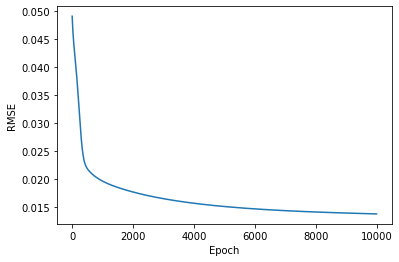

In [91]:
plt.plot(rmses)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

In [92]:
Y = use(X, X_means, X_stds, T_means, T_stds, U, V, W)

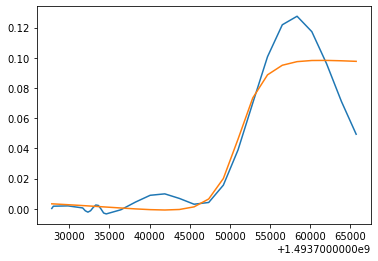

In [93]:
plt.plot(X, T)
plt.plot(X, Y);

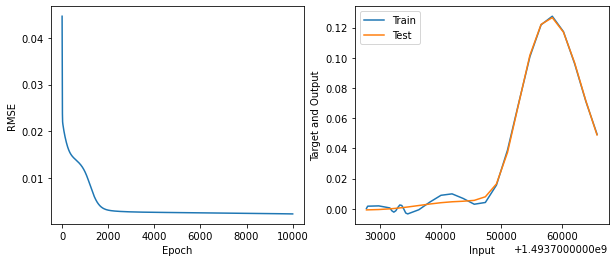

In [94]:
rmses, U, V, W, X_means, X_stds, T_means, T_stds = train(X, T, 10, 5, 10000, 0.1)
Y = use(X, X_means, X_stds, T_means, T_stds, U, V, W)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rmses)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(X, T, label='Train')
plt.plot(X, Y, label='Test')
plt.xlabel('Input')
plt.ylabel('Target and Output')
plt.legend();